## Experiments



In [72]:
import ecco

# Initialize the model and tokenizer
lm = ecco.from_pretrained('meta-llama/Llama-2-7b-hf', activations=True, gpu=False)
lm.tokenizer.add_special_tokens({'pad_token': '[PAD]'})
lm.model.resize_token_embeddings(len(lm.tokenizer))


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Embedding(32001, 4096)

In [95]:
import pandas as pd

data_sample = pd.read_csv('data/tokens_levels.csv')

In [74]:
data_sample

,token_correct,token_ocr,level,pos,lev_similarity
0,CHAMBRE,CHAMERE,Low,NOUN,0.857143
1,DÉPUTÉS,OÉPUTÉS,Low,NOUN,0.857143
2,législature,1égislature,Low,NOUN,0.909091
3,Session,8ession,Low,NOUN,0.857143
4,COMPTE,COMPTB,Low,NOUN,0.833333
...,...,...,...,...,...
130,assurance,a88okance,High,NOUN,0.555556
131,prévoyance,pkév0yance,High,NOUN,0.800000
132,Adoption,Ad0pti0n,High,NOUN,0.750000
133,Chapitres,Ghapitke8,High,NOUN,0.666667


In [75]:
len(data_sample)

135

In [77]:
import torch
torch.cuda.empty_cache()


In [78]:
!export PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create bins for the 'lev_similarity' column
bins = [0, 0.6, 0.8, 1]  # This creates three bins
labels = ['Low', 'Medium', 'High']
data_sample['lev_similarity_bins'] = pd.cut(data_sample['lev_similarity'], bins=bins, labels=labels, include_lowest=True)

# Verify the binning by checking the head of the DataFrame
print(data_sample[['lev_similarity', 'lev_similarity_bins']].head())


   lev_similarity lev_similarity_bins
0        0.857143                High
1        0.857143                High
2        0.909091                High
3        0.857143                High
4        0.833333                High


In [99]:
data_sample.lev_similarity_bins.value_counts()

High      253
Medium    102
Low        56
Name: lev_similarity_bins, dtype: int64

In [100]:
data_sample

,token_correct,token_ocr,level,pos,lev_similarity,lev_similarity_bins
0,CHAMBRE,CHAMERE,Low,NOUN,0.857143,High
1,DÉPUTÉS,DÉPOTÉS,Low,NOUN,0.857143,High
2,législature,légi8lature,Low,NOUN,0.909091,High
3,Session,Ses8ion,Low,NOUN,0.857143,High
4,COMPTE,COMPTB,Low,NOUN,0.833333,High
...,...,...,...,...,...,...
406,partie,paktie,High,NOUN,0.833333,High
407,chapitre,chapitke,High,NOUN,0.875000,High
408,Adoption,Ad0ptiun,High,NOUN,0.750000,Medium
409,partie,paktie,High,NOUN,0.833333,High


In [101]:
data_sample = data_sample.loc[:, ~data_sample.columns.str.contains('^Unnamed')]

data_sample.to_csv('data/tokens_levels.csv', index=False)
data_sample = pd.read_csv('data/tokens_levels.csv')
data_sample

,token_correct,token_ocr,level,pos,lev_similarity,lev_similarity_bins
0,CHAMBRE,CHAMERE,Low,NOUN,0.857143,High
1,DÉPUTÉS,DÉPOTÉS,Low,NOUN,0.857143,High
2,législature,légi8lature,Low,NOUN,0.909091,High
3,Session,Ses8ion,Low,NOUN,0.857143,High
4,COMPTE,COMPTB,Low,NOUN,0.833333,High
...,...,...,...,...,...,...
406,partie,paktie,High,NOUN,0.833333,High
407,chapitre,chapitke,High,NOUN,0.875000,High
408,Adoption,Ad0ptiun,High,NOUN,0.750000,Medium
409,partie,paktie,High,NOUN,0.833333,High


In [102]:
data_sample[data_sample.lev_similarity_bins == 'Low']

,token_correct,token_ocr,level,pos,lev_similarity,lev_similarity_bins
137,CHAMBRE,GHAMERB,Medium,NOUN,0.571429,Low
138,DÉPUTÉS,0ÉPOTÉ8,Medium,NOUN,0.571429,Low
139,législature,1é9i8latoke,Medium,NOUN,0.545455,Low
140,Session,8e88iun,Medium,NOUN,0.428571,Low
141,COMPTE,G0MPTB,Medium,NOUN,0.500000,Low
144,lundi,1ondi,Medium,NOUN,0.600000,Low
146,SOMMAIRE,8DMMA1RB,Medium,NOUN,0.500000,Low
149,congés,c0n9é8,Medium,NOUN,0.500000,Low
150,Suite,8oite,Medium,NOUN,0.600000,Low
151,discussion,di8co88i0n,Medium,NOUN,0.500000,Low


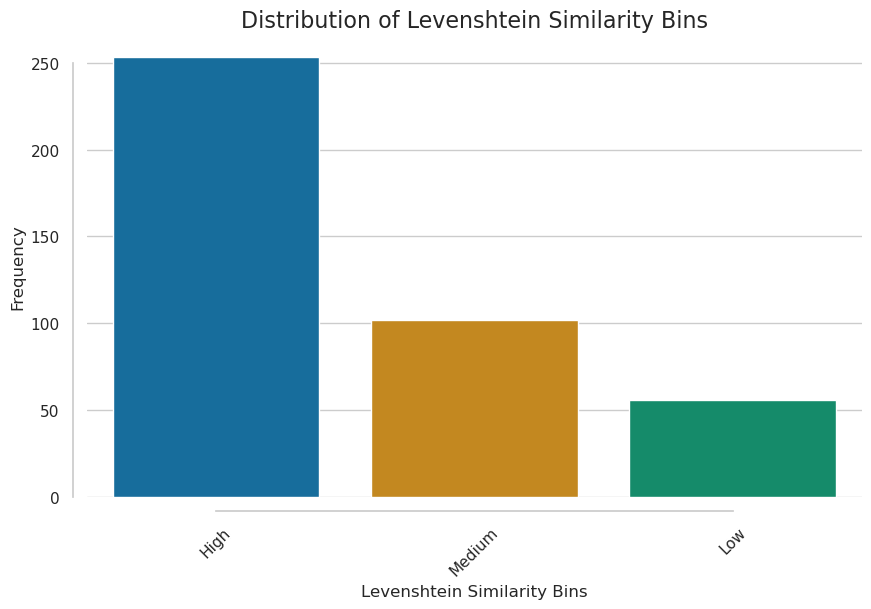

In [103]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='lev_similarity_bins', data=data_sample, palette='colorblind')

# Add titles and labels
plt.title('Distribution of Levenshtein Similarity Bins', fontsize=16)
plt.xlabel('Levenshtein Similarity Bins', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Enhance legibility
sns.despine(offset=10, trim=True)  # Clean up plot edges
plt.xticks(rotation=45)  # Rotate labels if needed

# Show the plot
plt.show()


CKA is a statistical measure used to assess how similar two sets of high-dimensional data are. In the context of neural network activations, CKA helps you understand how similarly two different inputs (in your case, correct text versus OCR text) are processed across various layers of a model.

By comparing activations from correct and OCR texts across all layers, you're essentially exploring which layers of the neural network process the texts more similarly or differently. This can reveal which layers are more sensitive to OCR errors and at what point in the network the representations diverge significantly.


You might expect that initial layers (closer to the input) might show higher similarity because these layers generally capture basic features of the input text that are less affected by minor errors or distortions typical in OCR processes. Deeper layers, which capture more abstract and composite representations, might exhibit more significant differences if OCR errors alter the semantic interpretation of the text.


In [104]:
import numpy as np
from ecco import analysis
from tqdm.auto import tqdm
import pandas as pd

tqdm.pandas()

MAX_LENGTH = 64

def get_neuron_activations(text, lm, max_length=512):
    # Tokenize the input text and ensure it is truncated or padded to max_length
    input_tokenized_info = lm.tokenizer(text, return_tensors="pt", 
                                        max_length=max_length, padding='max_length', truncation=True)
    
    output = lm(input_tokenized_info)
    
    # Return the output which includes the activations
    return output.activations['decoder'][0]

def calculate_cka(correct_token, ocr_token, model, max_length):
    # Fetch activations for the correct token
    corrected_activations = get_neuron_activations(correct_token, model, max_length)
    
    # Fetch activations for the OCR token
    ocr_activations = get_neuron_activations(ocr_token, model, max_length)

    # Compute CKA similarity
    cka_value = analysis.cka(corrected_activations[0,:,:].T, ocr_activations[0,:,:].T)
    
    # Return the similarity value, CKA returns a matrix where [0, 1] is the similarity
    return cka_value

data_sample['cka_value'] = data_sample.progress_apply(
    lambda row: calculate_cka(row['token_correct'], row['token_ocr'], lm, MAX_LENGTH),
    axis=1
)

print(data_sample)


  0%|          | 0/411 [00:00<?, ?it/s]

    token_correct    token_ocr level   pos  lev_similarity  \
0         CHAMBRE      CHAMERE   Low  NOUN        0.857143   
1         DÉPUTÉS      DÉPOTÉS   Low  NOUN        0.857143   
2     législature  légi8lature   Low  NOUN        0.909091   
3         Session      Ses8ion   Low  NOUN        0.857143   
4          COMPTE       COMPTB   Low  NOUN        0.833333   
..            ...          ...   ...   ...             ...   
406        partie       paktie  High  NOUN        0.833333   
407      chapitre     chapitke  High  NOUN        0.875000   
408      Adoption     Ad0ptiun  High  NOUN        0.750000   
409        partie       paktie  High  NOUN        0.833333   
410      chapitre     chapitke  High  NOUN        0.875000   

    lev_similarity_bins  cka_value  
0                  High   0.955963  
1                  High   0.983767  
2                  High   0.891444  
3                  High   0.723723  
4                  High   0.983500  
..                  ...        ..

/tmp/ipykernel_804683/2660227926.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter_plot = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


  token_correct    token_ocr level   pos  lev_similarity lev_similarity_bins  \
0       CHAMBRE      CHAMERE   Low  NOUN        0.857143                High   
1       DÉPUTÉS      DÉPOTÉS   Low  NOUN        0.857143                High   
2   législature  légi8lature   Low  NOUN        0.909091                High   
3       Session      Ses8ion   Low  NOUN        0.857143                High   
4        COMPTE       COMPTB   Low  NOUN        0.833333                High   

   cka_value  
0   0.955963  
1   0.983767  
2   0.891444  
3   0.723723  
4   0.983500  


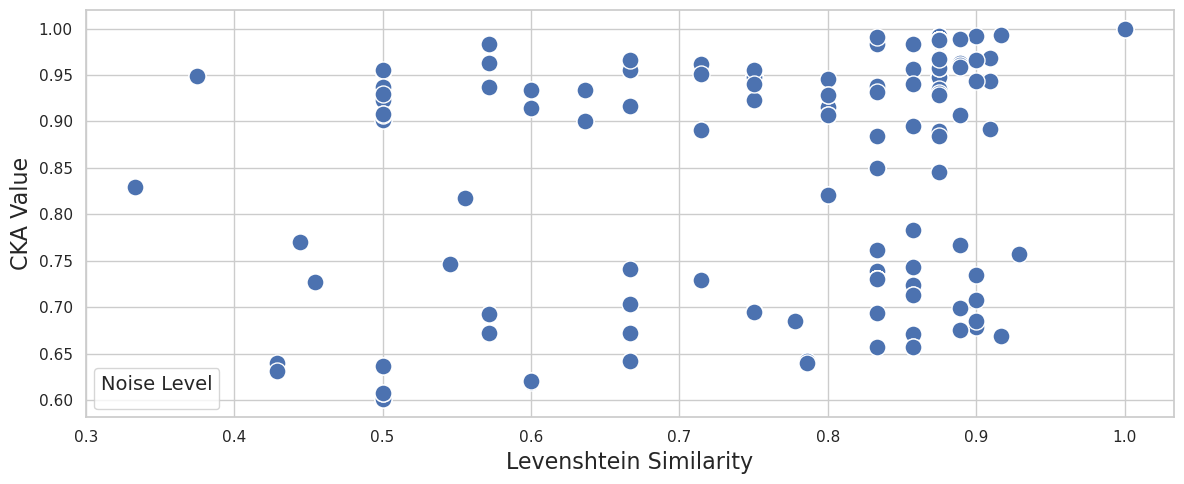

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

print(data_sample.head())

palette = sns.color_palette("colorblind")

plt.figure(figsize=(12, 5))  # Adjusting figure size for better readability
scatter_plot = sns.scatterplot(
    data=data_sample,
    x='lev_similarity',
    y='cka_value',
#     hue='level',
    s=150,  # Increase marker size for better visibility
    palette=palette  # Use the colorblind-friendly palette
)

# plt.title('Comparison of CKA and Levenshtein Similarity', fontsize=18)
plt.xlabel('Levenshtein Similarity', fontsize=16)
plt.ylabel('CKA Value', fontsize=16)

handles, labels = scatter_plot.get_legend_handles_labels()
plt.legend(handles=handles[1:], labels=labels[1:], title='Noise Level', title_fontsize='14', fontsize='12', 
           loc='lower left')

plt.tight_layout()
plt.show()


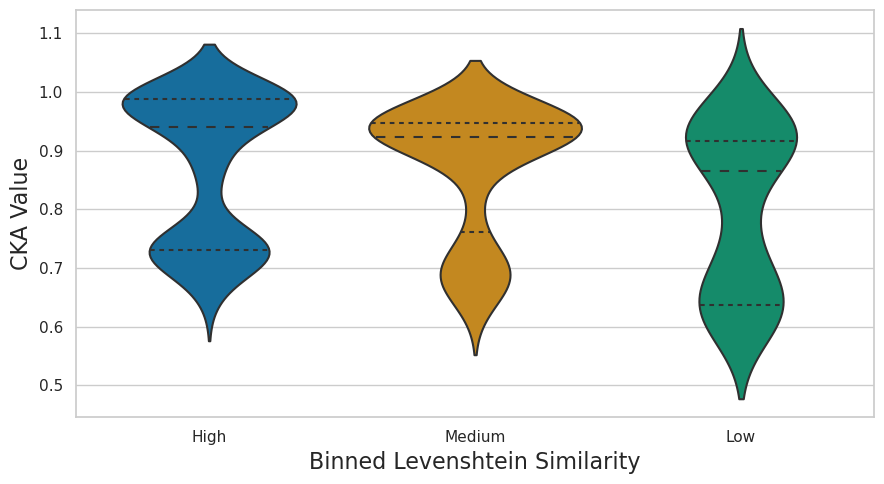

In [106]:
plt.figure(figsize=(9, 5))
sns.violinplot(
    data=data_sample,
    x='lev_similarity_bins',
    y='cka_value',
#     hue='level',
    inner='quartile',
    palette=sns.color_palette("colorblind")
)

# plt.title('CKA Value Distribution by Binned Levenshtein Similarity and Noise Level', fontsize=18)
plt.xlabel('Binned Levenshtein Similarity', fontsize=16)
plt.ylabel('CKA Value', fontsize=16)

plt.tight_layout()
plt.show()


Grouped Statistics: We calculate the mean and median CKA values for each group defined by noise level and Levenshtein similarity bins. This gives us an overview of central tendencies in the data.
Hypothesis Testing:
* ANOVA: Assumes that the data within each group is normally distributed and variances are equal. Suitable for comparing means across multiple groups.
* Kruskal-Wallis: A non-parametric test that does not assume normal distribution and is used to compare medians across multiple groups. It's more robust against data that do not meet the assumptions required by ANOVA.


In [107]:
import pandas as pd

grouped_stats = data_sample.groupby(['level', 'lev_similarity_bins'])['cka_value'].agg(['mean', 'median'])

print(grouped_stats)


                                mean    median
level  lev_similarity_bins                    
High   High                 0.868606  0.928781
       Low                  0.801654  0.868090
       Medium               0.868067  0.922694
Low    High                 0.875411  0.948098
       Medium               0.909200  0.922153
Medium High                 0.868810  0.930612
       Low                  0.797426  0.859172
       Medium               0.868463  0.922694


In [108]:
from scipy.stats import f_oneway, kruskal

for bin_label in data_sample['lev_similarity_bins'].unique():
    data_bin = data_sample[data_sample['lev_similarity_bins'] == bin_label]
    
    # Collect data for each noise level within the bin
    low_noise = data_bin[data_bin['level'] == 'low']['cka_value']
    medium_noise = data_bin[data_bin['level'] == 'medium']['cka_value']
    high_noise = data_bin[data_bin['level'] == 'high']['cka_value']
    
    # For simplicity, we'll go straight to non-parametric Kruskal-Wallis which does not assume normal distribution or equal variances
    stat, p_value = kruskal(low_noise, medium_noise, high_noise)
    
    print(f"Kruskal-Wallis test for {bin_label} bin: Stat={stat}, P-value={p_value}")


Kruskal-Wallis test for High bin: Stat=nan, P-value=nan
Kruskal-Wallis test for Medium bin: Stat=nan, P-value=nan
Kruskal-Wallis test for Low bin: Stat=nan, P-value=nan


In [110]:
data_sample.head()

,token_correct,token_ocr,level,pos,lev_similarity,lev_similarity_bins,cka_value
0,CHAMBRE,CHAMERE,Low,NOUN,0.857143,High,0.955963
1,DÉPUTÉS,DÉPOTÉS,Low,NOUN,0.857143,High,0.983767
2,législature,légi8lature,Low,NOUN,0.909091,High,0.891444
3,Session,Ses8ion,Low,NOUN,0.857143,High,0.723723
4,COMPTE,COMPTB,Low,NOUN,0.833333,High,0.983500


The Pearson correlation coefficient to assess the linear relationship between Levenshtein similarity and CKA values

In [111]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data_sample['lev_similarity'], data_sample['cka_value'])
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")


Pearson correlation coefficient: 0.2519959638871232
P-value: 2.2551959480173112e-07


How changes in Levenshtein similarity predict changes in CKA values, we fit a linear regression model.

In [113]:
import statsmodels.api as sm

X = sm.add_constant(data_sample['lev_similarity'])  # independent variable
y = data_sample['cka_value']  # dependent variable

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              cka_value   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     27.73
Date:                Thu, 02 May 2024   Prob (F-statistic):           2.26e-07
Time:                        11:14:26   Log-Likelihood:                 286.94
No. Observations:                 411   AIC:                            -569.9
Df Residuals:                     409   BIC:                            -561.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6582      0.039     16.

Coefficient: 0.2588632199098649
Intercept: 0.6582103055135191


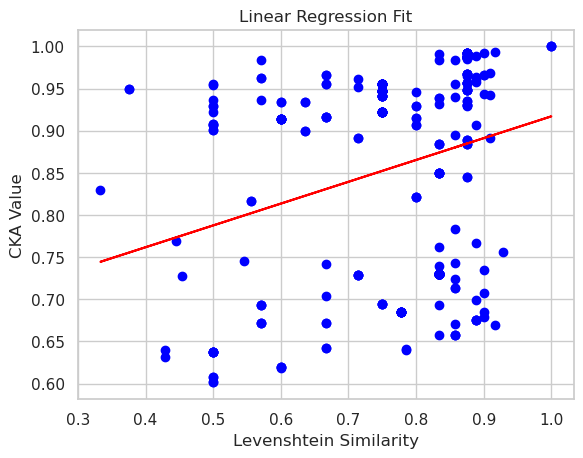

In [114]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = data_sample['lev_similarity'].values.reshape(-1, 1)
y = data_sample['cka_value'].values

model = LinearRegression()

model.fit(X, y)

coefficient = model.coef_[0]
intercept = model.intercept_

print(f"Coefficient: {coefficient}")
print(f"Intercept: {intercept}")

predicted_CKA = model.predict(X)

plt.scatter(X, y, color='blue')  # actual values
plt.plot(X, predicted_CKA, color='red')  # regression line
plt.xlabel('Levenshtein Similarity')
plt.ylabel('CKA Value')
plt.title('Linear Regression Fit')
plt.show()


The regression line shows a positive slope, indicating that as Levenshtein similarity increases, CKA values also tend to increase. This suggests that pairs of texts that are more similar to each other (higher Levenshtein similarity) tend to have more similar neural activations (higher CKA values). There is noticeable scatter around the regression line, particularly at higher levels of Levenshtein similarity, where the range of CKA values varies more widely. This variability indicates that while there is a general trend of increasing CKA values with increasing textual similarity, individual comparisons may deviate from this trend.

Most of the data points are concentrated towards higher Levenshtein similarity scores, particularly around the 0.8 to 1.0 range. The density of points in this area suggests that the dataset contains many text pairs with high similarity, and it is in this region that the model’s performance can be most robustly assessed.

The slope of the regression line quantitatively describes the strength of the relationship between Levenshtein similarity and CKA values. If the slope is significantly different from zero (which statistical testing in regression output would confirm), it supports the conclusion that the relationship is statistically significant.
The spread of points around the regression line also affects the R-squared value of the regression, which measures how well the observed outcomes are replicated by the model. A higher R-squared value would indicate that a greater proportion of the variance in CKA values is predictable from the Levenshtein similarity.

In [115]:
import numpy as np
from ecco import analysis
from tqdm.auto import tqdm
import pandas as pd

tqdm.pandas()

MAX_LENGTH = 64

def get_neuron_activations(text, lm, max_length=512):
    input_tokenized_info = lm.tokenizer(text, return_tensors="pt", 
                                        max_length=max_length, padding='max_length', truncation=True)
    
    output = lm(input_tokenized_info)
    
    return output.activations['decoder'][0]

def calculate_cka_per_layer(correct_token, ocr_token, model, max_length):
    corrected_activations = get_neuron_activations(correct_token, model, max_length)
    ocr_activations = get_neuron_activations(ocr_token, model, max_length)

    cka_values_per_layer = {}

    for i in range(len(corrected_activations)):
#         print(corrected_activations[i].shape, ocr_activations[i].shape)
        
        layer_correct = corrected_activations[i].T
        layer_ocr = ocr_activations[i].T

        cka_value = analysis.cka(layer_correct, layer_ocr)
        
        cka_values_per_layer[i] = cka_value

    return cka_values_per_layer

data_sample['cka_values_per_layer'] = data_sample.progress_apply(
    lambda row: calculate_cka_per_layer(row['token_correct'], row['token_ocr'], lm, MAX_LENGTH),
    axis=1
)

print(data_sample)


  0%|          | 0/411 [00:00<?, ?it/s]

    token_correct    token_ocr level   pos  lev_similarity  \
0         CHAMBRE      CHAMERE   Low  NOUN        0.857143   
1         DÉPUTÉS      DÉPOTÉS   Low  NOUN        0.857143   
2     législature  légi8lature   Low  NOUN        0.909091   
3         Session      Ses8ion   Low  NOUN        0.857143   
4          COMPTE       COMPTB   Low  NOUN        0.833333   
..            ...          ...   ...   ...             ...   
406        partie       paktie  High  NOUN        0.833333   
407      chapitre     chapitke  High  NOUN        0.875000   
408      Adoption     Ad0ptiun  High  NOUN        0.750000   
409        partie       paktie  High  NOUN        0.833333   
410      chapitre     chapitke  High  NOUN        0.875000   

    lev_similarity_bins  cka_value  \
0                  High   0.955963   
1                  High   0.983767   
2                  High   0.891444   
3                  High   0.723723   
4                  High   0.983500   
..                  ...    

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

expanded_data = []

for _, row in data_sample.iterrows():
    for layer, cka in row['cka_values_per_layer'].items():
        expanded_data.append({
            'Layer': layer,
            'CKA Value': cka,
            'Levenshtein Bin': row['lev_similarity_bins']
        })

layered_data = pd.DataFrame(expanded_data)

layered_data.head()


   Layer  CKA Value Levenshtein Bin
0      0   0.955963            High
1      1   0.999954            High
2      2   0.672275            High
3      3   0.559299            High
4      4   0.557942            High


In [118]:
layered_data['Layer']

0         0
1         1
2         2
3         3
4         4
         ..
13147    27
13148    28
13149    29
13150    30
13151    31
Name: Layer, Length: 13152, dtype: int64

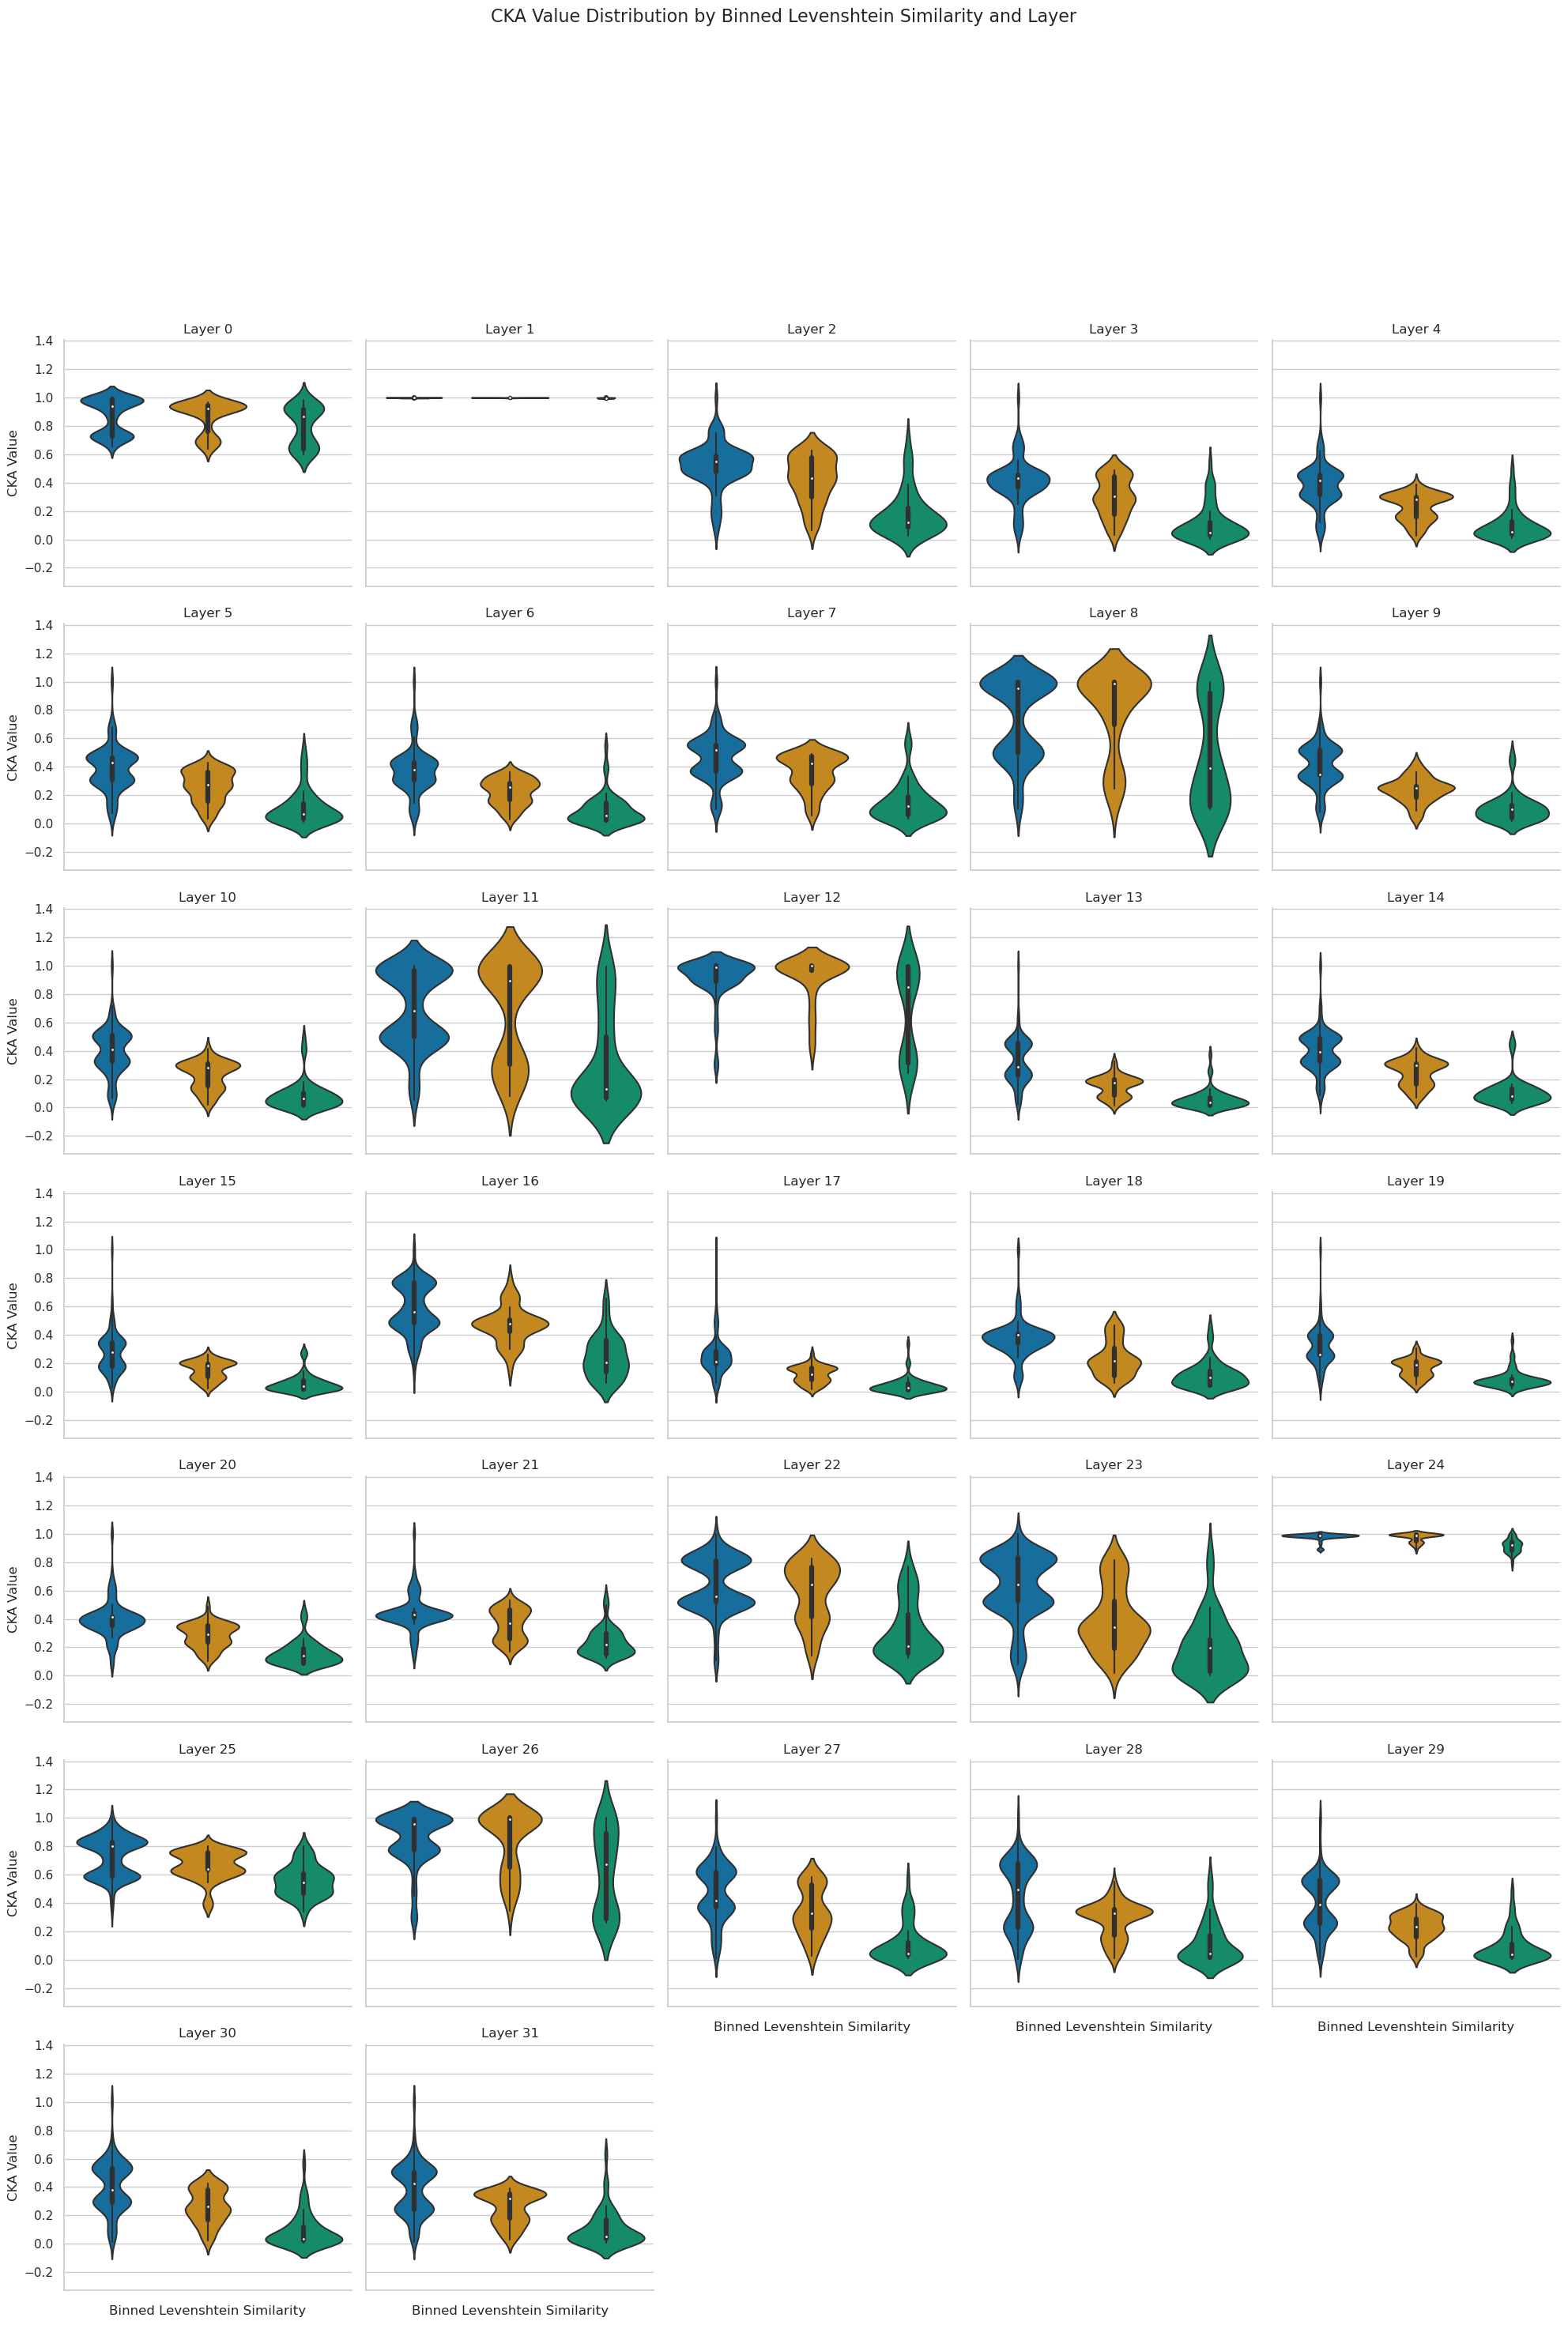

In [146]:
sns.set(style="whitegrid")

g = sns.catplot(
    data=layered_data,
    x='Levenshtein Bin', 
    y='CKA Value',
    col='Layer', 
    kind='violin',  
    col_wrap=5, 
    height=4, aspect=1,
    sharey=True,
    palette=sns.color_palette("colorblind")
)

g.fig.suptitle('CKA Value Distribution by Binned Levenshtein Similarity and Layer', size=16, y=1.05)
g.set_titles('Layer {col_name}')
g.set_axis_labels('Binned Levenshtein Similarity', 'CKA Value')
g.set_xticklabels(rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()


* First (Lower) Layers
These are the layers closest to the input data. In a typical neural network architecture, these are the layers that first receive the raw data.
__Characteristics:__ The first layers often perform more general functions by detecting basic features in the input data such as edges in images (in the case of CNNs) or basic syntactic structures in text (in NLP applications). These features are usually not very specific to the particularities of the data's higher-level context.
The aim of these layers is to transform raw data into a format that deeper layers can use to abstract higher-level features.

* Middle Layers
These layers are situated between the early and last layers, forming the core of the network.
__Characteristics:__ Middle layers typically extract more complex features from the simple patterns recognized by the first layers. For example, in CNNs, these layers might detect parts of objects like eyes or wheels, combining the edges and textures identified by earlier layers.
They begin to integrate and contextualize the basic features into more complex representations that are more abstract than those detected by the first layers.

* Last (Upper) Layers
These are the final layers before the output layer in a neural network. In models like CNNs, these are often fully connected layers that precede the classification layer.
__Characteristics:__ Last layers synthesize the high-level, abstract features extracted by middle layers into even more integrated representations that are directly useful for making predictions or decisions.
These layers typically perform high-level reasoning based on the comprehensive feature set developed by previous layers. For instance, in a CNN used for image classification, these layers would identify complex objects or scenes as a whole from the components recognized by middle layers.

In [124]:
def categorize_layer(layer):
    if layer <= 10:
        return 'First Layers'
    elif layer <= 20:
        return 'Middle Layers'
    else:
        return 'Last Layers'

layered_data['Layer Category'] = layered_data['Layer'].apply(categorize_layer)


In [125]:
layered_data

,Layer,CKA Value,Levenshtein Bin,Layer Category
0,0,0.955963,High,First Layers
1,1,0.999954,High,First Layers
2,2,0.672275,High,First Layers
3,3,0.559299,High,First Layers
4,4,0.557942,High,First Layers
...,...,...,...,...
13147,27,0.615682,High,Last Layers
13148,28,0.678547,High,Last Layers
13149,29,0.559218,High,Last Layers
13150,30,0.528929,High,Last Layers


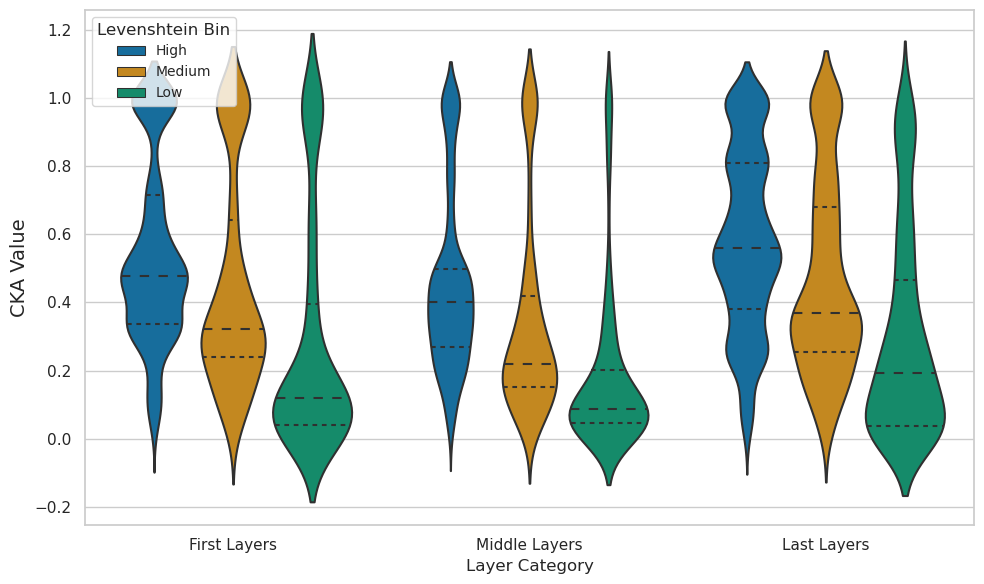

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.violinplot(
    data=layered_data,
    x='Layer Category', 
    y='CKA Value',
    hue='Levenshtein Bin',
    inner='quartile',
    palette='colorblind',
#     split=True
)

# plt.title('CKA Value Distribution by Layer Category and Binned Levenshtein Similarity', fontsize=16)
# plt.xlabel('Layer Category', fontsize=14)
plt.ylabel('CKA Value', fontsize=14)

plt.legend(title='Levenshtein Bin', title_fontsize='12', fontsize='10', loc='upper left')

plt.tight_layout()
plt.show()


In [164]:
data_sample

,token_correct,token_ocr,level,pos,lev_similarity,lev_similarity_bins,cka_value,cka_values_per_layer,sensitive_neurons,sensitivity_score
0,CHAMBRE,CHAMERE,Low,NOUN,0.857143,High,0.955963,"{0: 0.9559633931397115, 1: 0.9999542623102899,...","{0: [4, 6, 25, 192, 202, 214, 265, 270, 417, 4...","{0: 0.01248814, 1: 5.3077307, 2: 0.013596817, ..."
1,DÉPUTÉS,DÉPOTÉS,Low,NOUN,0.857143,High,0.983767,"{0: 0.9837666441280232, 1: 0.9999936799916032,...","{0: [7, 17, 71, 134, 185, 231, 305, 379, 443, ...","{0: 0.0068198335, 1: 2.6547928, 2: 0.027278455..."
2,législature,légi8lature,Low,NOUN,0.909091,High,0.891444,"{0: 0.8914442887605566, 1: 0.9990333979817139,...","{0: [6, 25, 71, 152, 175, 187, 214, 323, 417, ...","{0: 0.018599778, 1: 6.4373116, 2: 0.10335098, ..."
3,Session,Ses8ion,Low,NOUN,0.857143,High,0.723723,"{0: 0.7237229592677634, 1: 0.9998592891469518,...","{0: [6, 25, 27, 62, 134, 157, 175, 192, 251, 3...","{0: 0.027906772, 1: 2.376451, 2: 0.10903617, 3..."
4,COMPTE,COMPTB,Low,NOUN,0.833333,High,0.983500,"{0: 0.983499600065184, 1: 0.9999937300943256, ...","{0: [25, 31, 32, 53, 59, 129, 209, 357, 376, 3...","{0: 0.0049504167, 1: 0.14717866, 2: 0.05282228..."
...,...,...,...,...,...,...,...,...,...,...
406,partie,paktie,High,NOUN,0.833333,High,0.729834,"{0: 0.7298336055730545, 1: 0.9971391530488017,...","{0: [4, 6, 25, 65, 71, 81, 95, 214, 417, 427, ...","{0: 0.030602291, 1: 2.4456365, 2: 0.02297256, ..."
407,chapitre,chapitke,High,NOUN,0.875000,High,0.987524,"{0: 0.9875239009215855, 1: 1.0000003706490714,...","{0: [6, 25, 33, 41, 64, 68, 71, 86, 113, 152, ...","{0: 0.0040710373, 1: 0.017364359, 2: 0.0692277..."
408,Adoption,Ad0ptiun,High,NOUN,0.750000,Medium,0.940770,"{0: 0.9407695647366494, 1: 0.9992079864350097,...","{0: [4, 25, 32, 68, 119, 134, 175, 186, 187, 1...","{0: 0.011407521, 1: 13.556317, 2: 0.029833859,..."
409,partie,paktie,High,NOUN,0.833333,High,0.729834,"{0: 0.7298336055730545, 1: 0.9971391530488017,...","{0: [4, 6, 25, 65, 71, 81, 95, 214, 417, 427, ...","{0: 0.030602291, 1: 2.4456365, 2: 0.02297256, ..."


In [132]:
data_sample.to_csv('data/tokens_levels.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import defaultdict

MAX_LENGTH = 64

def get_neuron_activations(text, lm, max_length=512):
    input_tokenized_info = lm.tokenizer(text, return_tensors="pt", 
                                        max_length=max_length, padding='max_length', truncation=True)
    output = lm(input_tokenized_info)
    return output.activations['decoder'][0]

def compare_activations(activations_correct, activations_ocr):
    sensitive_neurons_dict = {}
    sensitivity_values_dict = {}
    for layer in range(activations_correct.shape[0]):
        diff = np.mean(np.abs(activations_correct[layer] - activations_ocr[layer]), axis=1)
        mean_diff = diff.mean()
        std_diff = diff.std()
        sensitive_neurons = np.where(diff > mean_diff + std_diff)[0]
        sensitivity_values = diff[sensitive_neurons]
        sensitive_neurons_dict[layer] = sensitive_neurons
        sensitivity_values_dict[layer] = sensitivity_values
    return sensitive_neurons_dict, sensitivity_values_dict


data_sample['sensitive_neurons'] = np.empty((len(data_sample), 0)).tolist()
data_sample['sensitivity_score_neuron'] = np.empty((len(data_sample), 0)).tolist()
data_sample['sensitivity_score_layer'] = np.empty((len(data_sample), 0)).tolist()

neuron_sensitivity_count = defaultdict(lambda: defaultdict(int))

max_activation_value = float('-inf')
for index, row in tqdm(data_sample.iterrows(), total=len(data_sample)):
    corrected_activations = get_neuron_activations(row['token_correct'], lm, MAX_LENGTH)
    ocr_activations = get_neuron_activations(row['token_ocr'], lm, MAX_LENGTH)

    # Normalize activations
    corrected_activations /= np.max(corrected_activations)
    ocr_activations /= np.max(ocr_activations)

    # Find sensitive neurons for this instance
    sensitive_neurons_dict, sensitivity_values_dict = compare_activations(corrected_activations, ocr_activations)

    data_sample.at[index, 'sensitive_neurons'] = {layer: list(neurons) for layer, neurons in sensitive_neurons_dict.items()}
    data_sample.at[index, 'sensitivity_score_neuron'] = {layer: list(neurons) for layer, neurons in sensitivity_values_dict.items()}

    sensitivity_score_layer = {layer: np.mean(np.abs(corrected_activations[layer][neurons] - ocr_activations[layer][neurons])) 
                                for layer, neurons in sensitive_neurons_dict.items()}
    data_sample.at[index, 'sensitivity_score_layer'] = sensitivity_score_layer

    max_activation_value = max(max_activation_value, np.max(corrected_activations), np.max(ocr_activations))

    for layer, sensitive_neurons in sensitive_neurons_dict.items():
        for neuron in sensitive_neurons:
            neuron_sensitivity_count[layer][neuron] += 1

In [222]:
data_sample.head()

,token_correct,token_ocr,level,pos,lev_similarity,lev_similarity_bins,cka_value,cka_values_per_layer,sensitive_neurons,sensitivity_score,sensitivity_score_neuron,sensitivity_score_layer
0,CHAMBRE,CHAMERE,Low,NOUN,0.857143,High,0.955963,"{0: 0.9559633931397115, 1: 0.9999542623102899,...","{0: [4, 6, 25, 192, 202, 214, 265, 270, 417, 4...",[],"{0: [1.2477376e-05, 1.2646777e-05, 4.576591e-0...","{0: 2.949413e-05, 1: 0.012535647, 2: 3.211257e..."
1,DÉPUTÉS,DÉPOTÉS,Low,NOUN,0.857143,High,0.983767,"{0: 0.9837666441280232, 1: 0.9999936799916032,...","{0: [7, 17, 71, 134, 185, 231, 305, 379, 443, ...",[],"{0: [7.1043273e-06, 1.0219176e-05, 9.803804e-0...","{0: 1.6106887e-05, 1: 0.006270013, 2: 6.442547..."
2,législature,légi8lature,Low,NOUN,0.909091,High,0.891444,"{0: 0.8914442887605566, 1: 0.9990333979817139,...","{0: [6, 25, 71, 152, 175, 187, 214, 323, 417, ...",[],"{0: [2.1961663e-05, 4.8334074e-05, 2.5506995e-...","{0: 4.3928423e-05, 1: 0.015203458, 2: 0.000244..."
3,Session,Ses8ion,Low,NOUN,0.857143,High,0.723723,"{0: 0.7237229592677634, 1: 0.9998592891469518,...","{0: [6, 25, 27, 62, 134, 157, 175, 192, 251, 3...",[],"{0: [6.784654e-05, 0.00024895748, 3.1666106e-0...","{0: 6.5909415e-05, 1: 0.0056126337, 2: 0.00025..."
4,COMPTE,COMPTB,Low,NOUN,0.833333,High,0.983500,"{0: 0.983499600065184, 1: 0.9999937300943256, ...","{0: [25, 31, 32, 53, 59, 129, 209, 357, 376, 3...",[],"{0: [6.821236e-06, 9.958994e-06, 7.3533583e-06...","{0: 1.1691751e-05, 1: 0.00034760238, 2: 0.0001..."


In [ ]:
# Normalize activations by the maximum activation value observed across all instances
for index, row in data_sample.iterrows():
    for layer in range(len(row['sensitive_neurons'])):
        corrected_activations_normalized = row['corrected_activations'][layer] / max_activation_value
        ocr_activations_normalized = row['ocr_activations'][layer] / max_activation_value
        data_sample.at[index, 'corrected_activations'][layer] = corrected_activations_normalized
        data_sample.at[index, 'ocr_activations'][layer] = ocr_activations_normalized

In [223]:
# Define a threshold to identify universal neurons
threshold = len(data_sample) * 0.5
universal_neurons_scores = {layer: [neuron for neuron, count in neuron_counts.items() if count > threshold]
                     for layer, neuron_counts in neuron_sensitivity_count.items()}

print(universal_neurons[0][:4])


[6, 25, 214, 417]


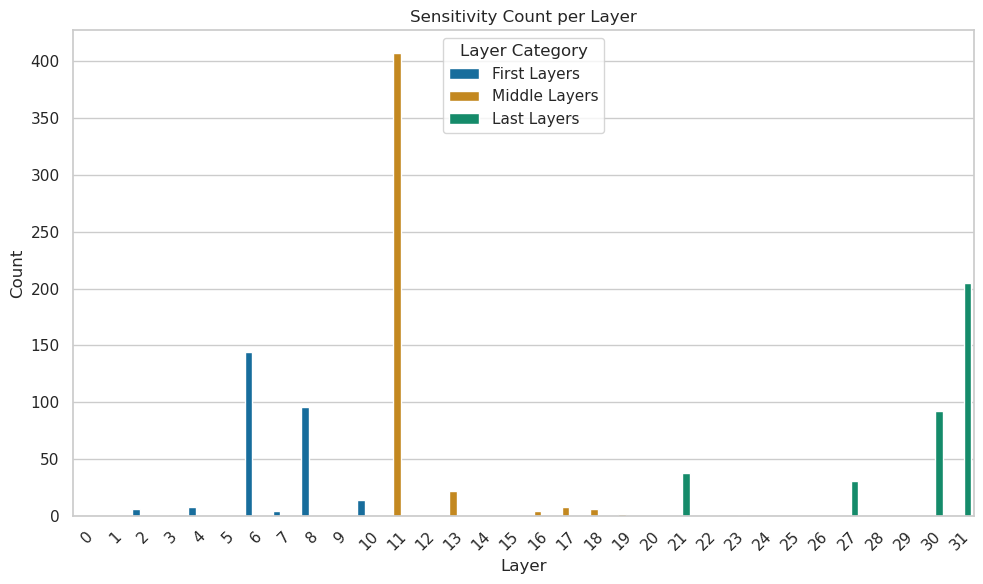

In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

threshold = len(data_sample) * 0.5
universal_neurons_scores = {layer: [neuron for neuron, count in neuron_counts.items() if count > threshold]
                             for layer, neuron_counts in neuron_sensitivity_count.items()}

neuron_sensitivity_df = pd.DataFrame(neuron_sensitivity_count).transpose().reset_index()
neuron_sensitivity_df.rename(columns={'index': 'Layer'}, inplace=True)
neuron_sensitivity_df['Layer Category'] = neuron_sensitivity_df['Layer'].apply(categorize_layer)

sns.set_style("whitegrid")
sns.barplot(data=neuron_sensitivity_df, x='Layer', y=0, hue='Layer Category', palette='colorblind')
plt.title('Sensitivity Count per Layer')
plt.xlabel('Layer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [177]:
data_sample

,token_correct,token_ocr,level,pos,lev_similarity,lev_similarity_bins,cka_value,cka_values_per_layer,sensitive_neurons,sensitivity_score,sensitivity_score_neuron,sensitivity_score_layer
0,CHAMBRE,CHAMERE,Low,NOUN,0.857143,High,0.955963,"{0: 0.9559633931397115, 1: 0.9999542623102899,...","{0: [4, 6, 25, 192, 202, 214, 265, 270, 417, 4...",[],"{0: [0.0052830577, 0.005354784, 0.019377792, 0...","{0: 0.01248814, 1: 5.3077307, 2: 0.013596817, ..."
1,DÉPUTÉS,DÉPOTÉS,Low,NOUN,0.857143,High,0.983767,"{0: 0.9837666441280232, 1: 0.9999936799916032,...","{0: [7, 17, 71, 134, 185, 231, 305, 379, 443, ...",[],"{0: [0.0030080504, 0.004326911, 0.0041510374, ...","{0: 0.0068198335, 1: 2.6547928, 2: 0.027278455..."
2,législature,légi8lature,Low,NOUN,0.909091,High,0.891444,"{0: 0.8914442887605566, 1: 0.9990333979817139,...","{0: [6, 25, 71, 152, 175, 187, 214, 323, 417, ...",[],"{0: [0.009298809, 0.02046518, 0.010799942, 0.0...","{0: 0.018599778, 1: 6.4373116, 2: 0.10335098, ..."
3,Session,Ses8ion,Low,NOUN,0.857143,High,0.723723,"{0: 0.7237229592677634, 1: 0.9998592891469518,...","{0: [6, 25, 27, 62, 134, 157, 175, 192, 251, 3...",[],"{0: [0.028726973, 0.10541135, 0.013407779, 0.0...","{0: 0.027906772, 1: 2.376451, 2: 0.10903617, 3..."
4,COMPTE,COMPTB,Low,NOUN,0.833333,High,0.983500,"{0: 0.983499600065184, 1: 0.9999937300943256, ...","{0: [25, 31, 32, 53, 59, 129, 209, 357, 376, 3...",[],"{0: [0.0028881868, 0.0042167483, 0.0031134933,...","{0: 0.0049504167, 1: 0.14717866, 2: 0.05282228..."
...,...,...,...,...,...,...,...,...,...,...,...,...
406,partie,paktie,High,NOUN,0.833333,High,0.729834,"{0: 0.7298336055730545, 1: 0.9971391530488017,...","{0: [4, 6, 25, 65, 71, 81, 95, 214, 417, 427, ...",[],"{0: [0.012319207, 0.017424976, 0.094346985, 0....","{0: 0.030602291, 1: 2.4456365, 2: 0.02297256, ..."
407,chapitre,chapitke,High,NOUN,0.875000,High,0.987524,"{0: 0.9875239009215855, 1: 1.0000003706490714,...","{0: [6, 25, 33, 41, 64, 68, 71, 86, 113, 152, ...",[],"{0: [0.003542502, 0.00508377, 0.0021450708, 0....","{0: 0.0040710373, 1: 0.017364359, 2: 0.0692277..."
408,Adoption,Ad0ptiun,High,NOUN,0.750000,Medium,0.940770,"{0: 0.9407695647366494, 1: 0.9992079864350097,...","{0: [4, 25, 32, 68, 119, 134, 175, 186, 187, 1...",[],"{0: [0.006137272, 0.014680002, 0.0062258374, 0...","{0: 0.011407521, 1: 13.556317, 2: 0.029833859,..."
409,partie,paktie,High,NOUN,0.833333,High,0.729834,"{0: 0.7298336055730545, 1: 0.9971391530488017,...","{0: [4, 6, 25, 65, 71, 81, 95, 214, 417, 427, ...",[],"{0: [0.012319207, 0.017424976, 0.094346985, 0....","{0: 0.030602291, 1: 2.4456365, 2: 0.02297256, ..."


In [225]:
data_sample['sensitivity_score_neuron'].iloc[0].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [226]:
data_sample['sensitivity_score_neuron']

0      {0: [1.2477376e-05, 1.2646777e-05, 4.576591e-0...
1      {0: [7.1043273e-06, 1.0219176e-05, 9.803804e-0...
2      {0: [2.1961663e-05, 4.8334074e-05, 2.5506995e-...
3      {0: [6.784654e-05, 0.00024895748, 3.1666106e-0...
4      {0: [6.821236e-06, 9.958994e-06, 7.3533583e-06...
                             ...                        
406    {0: [2.9095154e-05, 4.115382e-05, 0.0002228259...
407    {0: [8.366581e-06, 1.2006702e-05, 5.0661674e-0...
408    {0: [1.4494833e-05, 3.4670797e-05, 1.4704001e-...
409    {0: [2.9095154e-05, 4.115382e-05, 0.0002228259...
410    {0: [8.366581e-06, 1.2006702e-05, 5.0661674e-0...
Name: sensitivity_score_neuron, Length: 411, dtype: object

In [227]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sensitivity_df = pd.DataFrame([(neuron, layer, score) 
                                for layer, scores_dict in data_sample['sensitivity_score_neuron'].items() 
                                for neuron, scores in scores_dict.items() 
                                for score in scores], columns=['Layer', 'Neuron', 'Sensitivity Score'])

In [228]:
sensitivity_df.tail()

,Layer,Neuron,Sensitivity Score
10087088,31,410,0.000129
10087089,31,410,0.000252
10087090,31,410,0.000173
10087091,31,410,0.000134
10087092,31,410,0.000099


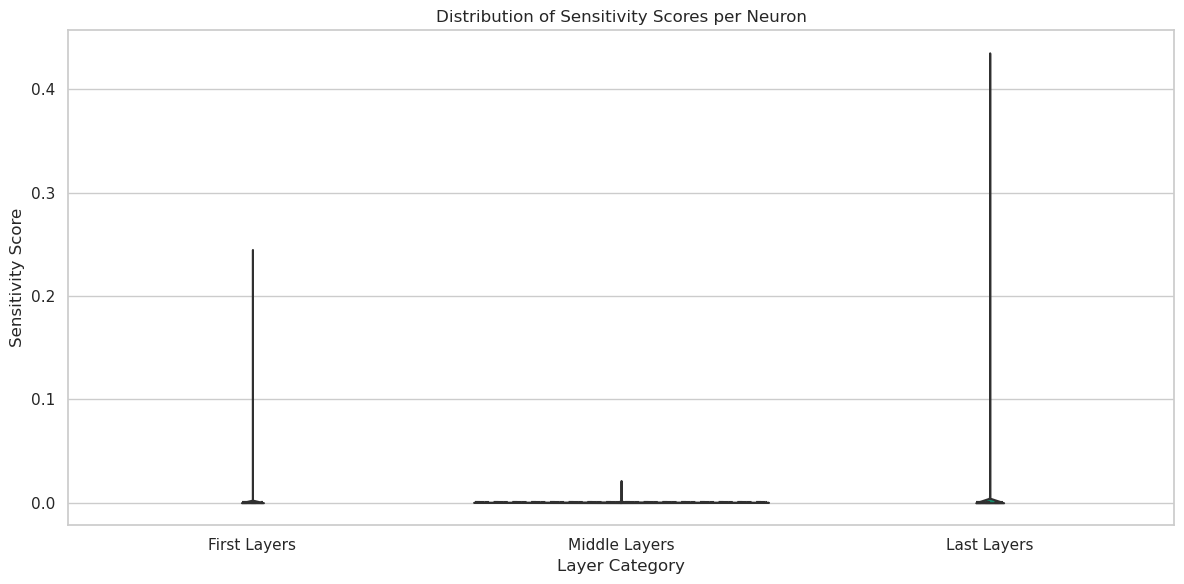

In [229]:
sensitivity_df['Layer Category'] = sensitivity_df['Layer'].apply(categorize_layer)

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.violinplot(data=sensitivity_df, x='Layer Category', y='Sensitivity Score', palette='colorblind', inner='quartile')
plt.title('Distribution of Sensitivity Scores per Neuron')
plt.xlabel('Layer Category')
plt.ylabel('Sensitivity Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


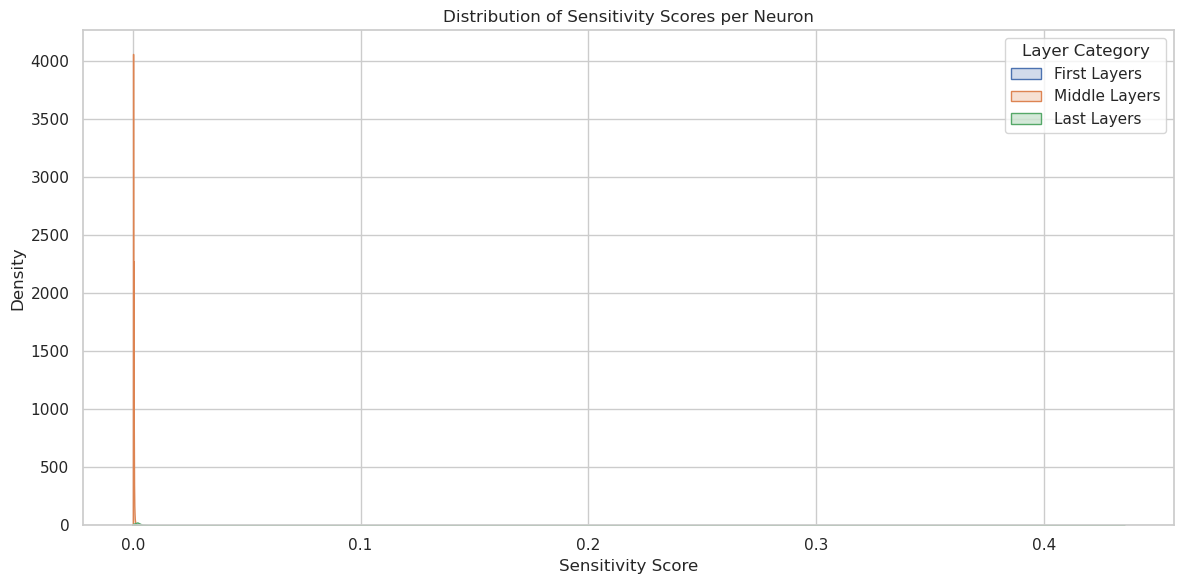

In [230]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sensitivity_df = pd.DataFrame([(neuron, layer, score) 
                                for layer, scores_dict in data_sample['sensitivity_score_neuron'].items() 
                                for neuron, scores in scores_dict.items() 
                                for score in scores], columns=['Layer', 'Neuron', 'Sensitivity Score'])
sensitivity_df['Layer Category'] = sensitivity_df['Layer'].apply(categorize_layer)

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
for layer_category in sensitivity_df['Layer Category'].unique():
    sns.kdeplot(sensitivity_df[sensitivity_df['Layer Category'] == layer_category]['Sensitivity Score'], 
                label=layer_category, fill=True)
plt.title('Distribution of Sensitivity Scores per Neuron')
plt.xlabel('Sensitivity Score')
plt.ylabel('Density')
plt.legend(title='Layer Category')
plt.tight_layout()
plt.show()


In [235]:
sensitivity_df['Sensitivity Score'].max(), sensitivity_df['Sensitivity Score'].min()

(0.43507519364356995, 3.4828303796530236e-06)

In [236]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sensitivity_df = pd.DataFrame([(neuron, layer, score) 
                                for layer, scores_dict in data_sample['sensitivity_score_neuron'].items() 
                                for neuron, scores in scores_dict.items() 
                                for score in scores], columns=['Layer', 'Neuron', 'Sensitivity Score'])
sensitivity_df['Layer Category'] = sensitivity_df['Layer'].apply(categorize_layer)



In [263]:

filtered_df = sensitivity_df[sensitivity_df['Sensitivity Score'] > 0.1]

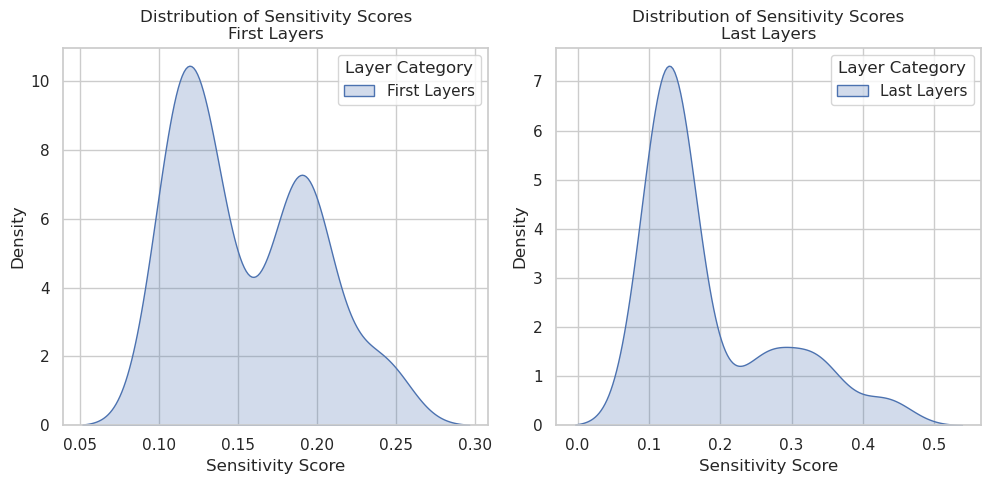

In [264]:
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")

for i, layer_category in enumerate(filtered_df['Layer Category'].unique(), start=1):
    plt.subplot(1, 3, i)
    sns.kdeplot(filtered_df[filtered_df['Layer Category'] == layer_category]['Sensitivity Score'], 
                label=layer_category, fill=True)
    plt.title(f'Distribution of Sensitivity Scores\n{layer_category}')
    plt.xlabel('Sensitivity Score')
    plt.ylabel('Density')
    plt.legend(title='Layer Category')

plt.tight_layout()
plt.show()


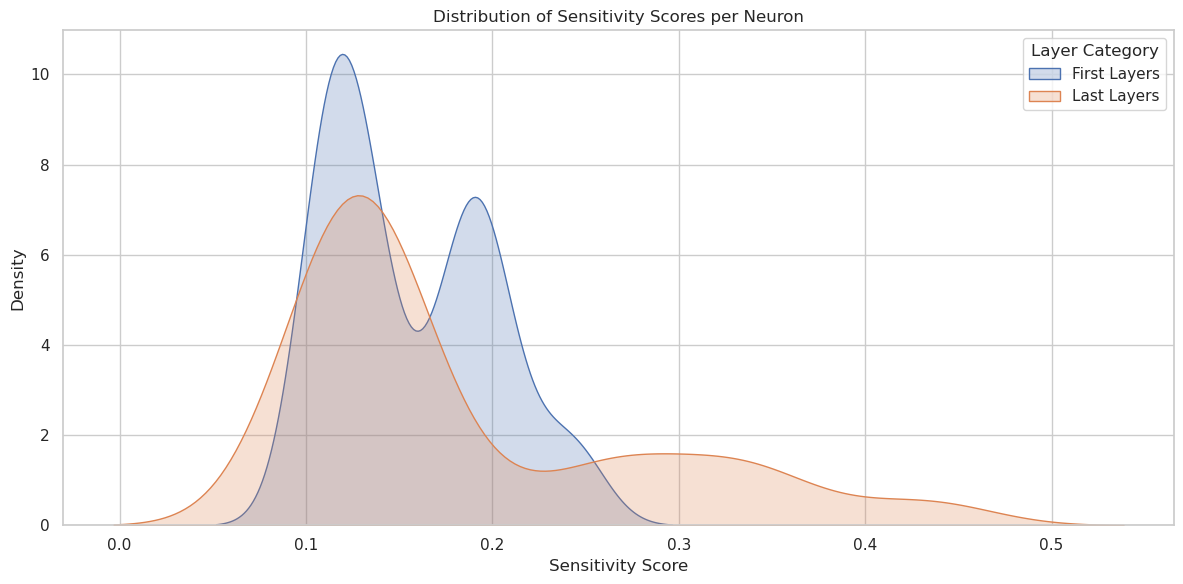

In [265]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
for layer_category in filtered_df['Layer Category'].unique():
    sns.kdeplot(filtered_df[filtered_df['Layer Category'] == layer_category]['Sensitivity Score'], 
                label=layer_category, fill=True)
plt.title('Distribution of Sensitivity Scores per Neuron')
plt.xlabel('Sensitivity Score')
plt.ylabel('Density')
plt.legend(title='Layer Category')
plt.tight_layout()
plt.show()


In [206]:
data_sample.to_csv('data/tokens_levels.csv', index=False)

In [207]:
data_sample.head()

,token_correct,token_ocr,level,pos,lev_similarity,lev_similarity_bins,cka_value,cka_values_per_layer,sensitive_neurons,sensitivity_score,sensitivity_score_neuron,sensitivity_score_layer
0,CHAMBRE,CHAMERE,Low,NOUN,0.857143,High,0.955963,"{0: 0.9559633931397115, 1: 0.9999542623102899,...","{0: [4, 6, 25, 192, 202, 214, 265, 270, 417, 4...",[],"{0: [0.0052830577, 0.005354784, 0.019377792, 0...","{0: 0.01248814, 1: 5.3077307, 2: 0.013596817, ..."
1,DÉPUTÉS,DÉPOTÉS,Low,NOUN,0.857143,High,0.983767,"{0: 0.9837666441280232, 1: 0.9999936799916032,...","{0: [7, 17, 71, 134, 185, 231, 305, 379, 443, ...",[],"{0: [0.0030080504, 0.004326911, 0.0041510374, ...","{0: 0.0068198335, 1: 2.6547928, 2: 0.027278455..."
2,législature,légi8lature,Low,NOUN,0.909091,High,0.891444,"{0: 0.8914442887605566, 1: 0.9990333979817139,...","{0: [6, 25, 71, 152, 175, 187, 214, 323, 417, ...",[],"{0: [0.009298809, 0.02046518, 0.010799942, 0.0...","{0: 0.018599778, 1: 6.4373116, 2: 0.10335098, ..."
3,Session,Ses8ion,Low,NOUN,0.857143,High,0.723723,"{0: 0.7237229592677634, 1: 0.9998592891469518,...","{0: [6, 25, 27, 62, 134, 157, 175, 192, 251, 3...",[],"{0: [0.028726973, 0.10541135, 0.013407779, 0.0...","{0: 0.027906772, 1: 2.376451, 2: 0.10903617, 3..."
4,COMPTE,COMPTB,Low,NOUN,0.833333,High,0.983500,"{0: 0.983499600065184, 1: 0.9999937300943256, ...","{0: [25, 31, 32, 53, 59, 129, 209, 357, 376, 3...",[],"{0: [0.0028881868, 0.0042167483, 0.0031134933,...","{0: 0.0049504167, 1: 0.14717866, 2: 0.05282228..."


In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

all_sensitivity_scores = []

for index, row in data_sample.iterrows():
    sensitivity_scores = row['sensitivity_score_layer']
    for layer, score in sensitivity_scores.items():
        if np.isnan(score):
            continue
        all_sensitivity_scores.append(score)

sensitivity_df = pd.DataFrame(all_sensitivity_scores, columns=['Sensitivity Score'])


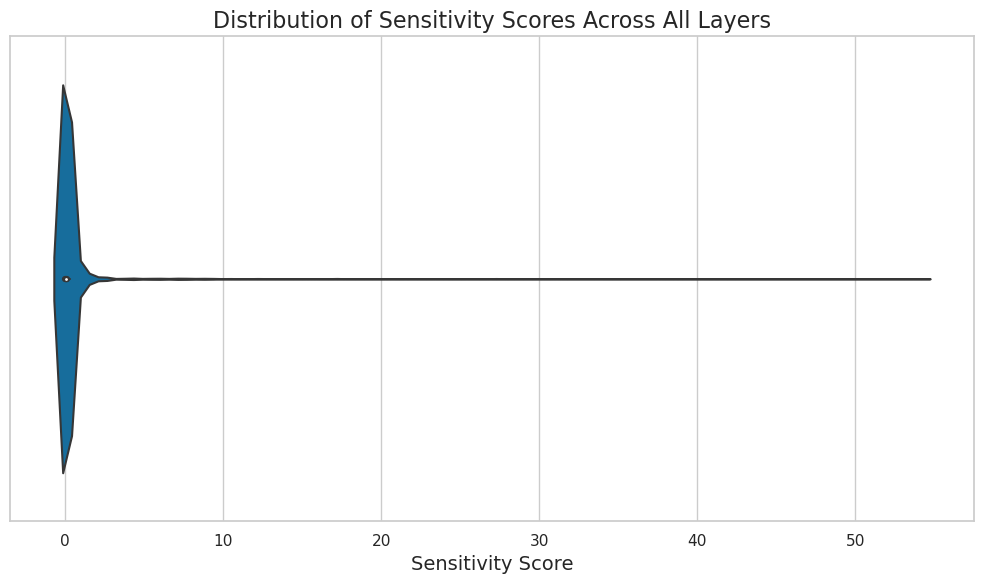

In [176]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=sensitivity_df, x='Sensitivity Score', palette='colorblind')

plt.title('Distribution of Sensitivity Scores Across All Layers', fontsize=16)
plt.xlabel('Sensitivity Score', fontsize=14)

plt.tight_layout()
plt.show()


In [210]:
import pandas as pd
import numpy as np
from tqdm import tqdm

def categorize_layer(layer):
    if layer <= 10:
        return 'First Layers'
    elif layer <= 20:
        return 'Middle Layers'
    else:
        return 'Last Layers'

layered_sensitivity_scores = []

for index, row in tqdm(data_sample.iterrows(), total=len(data_sample)):
    sensitivity_scores = row['sensitivity_score_layer']
    for layer, score in sensitivity_scores.items():
        layered_sensitivity_scores.append({
            'Layer Category': categorize_layer(layer),
            'Sensitivity Score': score
        })

layered_sensitivity_df = pd.DataFrame(layered_sensitivity_scores)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 411/411 [00:00<00:00, 9508.74it/s]


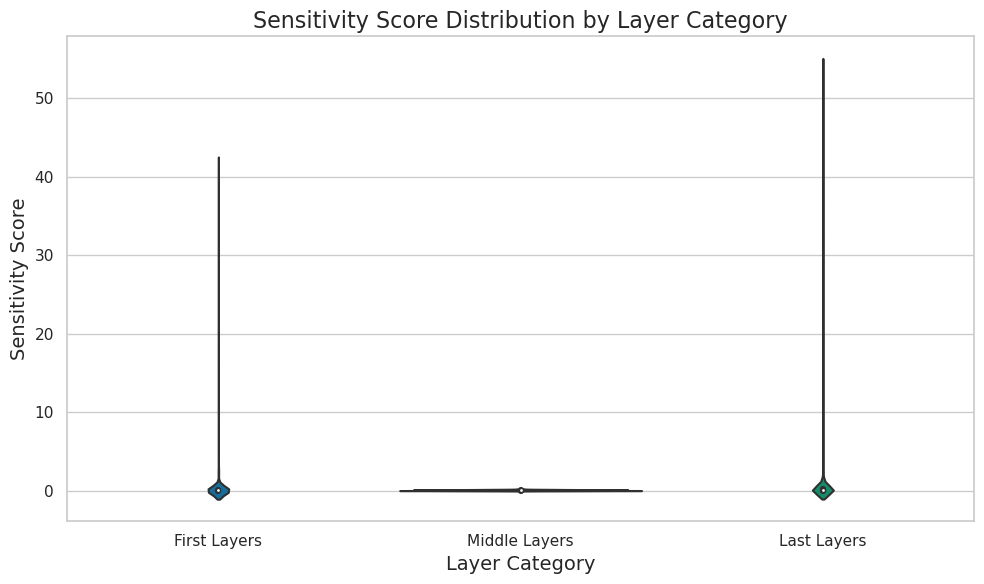

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.violinplot(
    data=layered_sensitivity_df,
    x='Layer Category', 
    y='Sensitivity Score',
    palette='colorblind'
)

plt.title('Sensitivity Score Distribution by Layer Category', fontsize=16)
plt.xlabel('Layer Category', fontsize=14)
plt.ylabel('Sensitivity Score', fontsize=14)

plt.tight_layout()
plt.show()


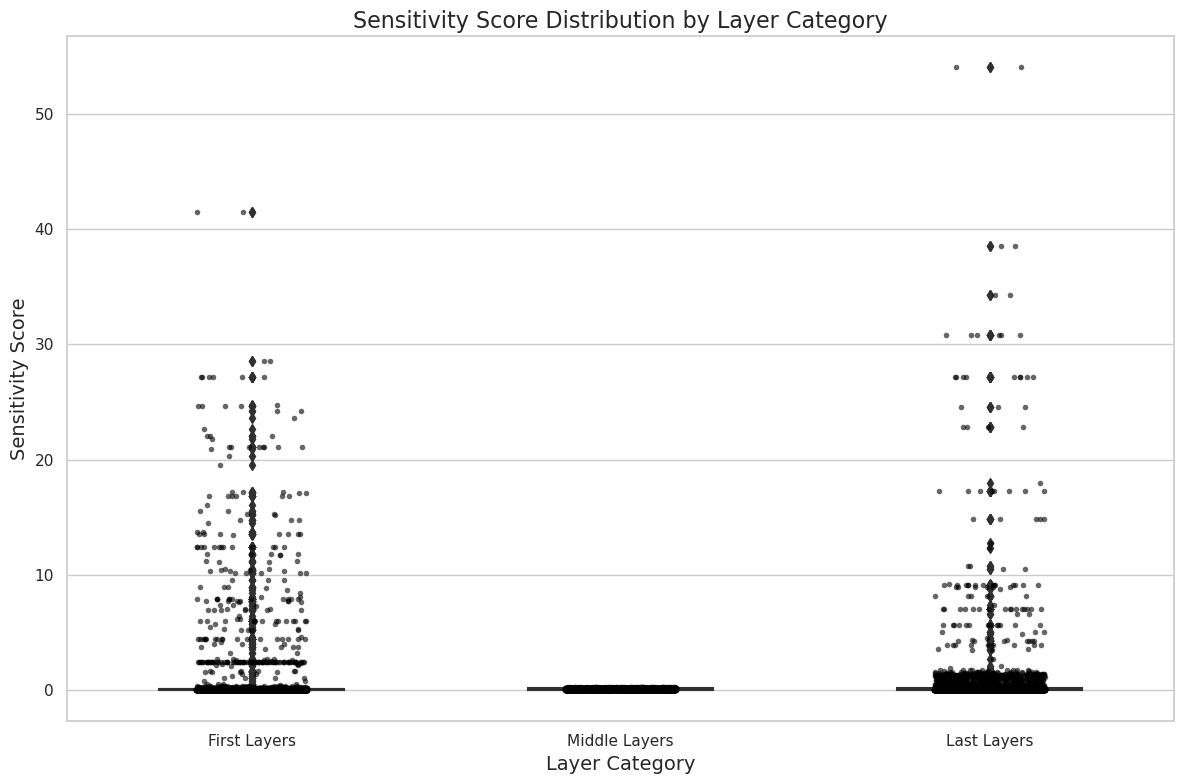

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

ax = sns.boxplot(
    data=layered_sensitivity_df,
    x='Layer Category', 
    y='Sensitivity Score',
    palette='colorblind', 
    width=0.5 
)

sns.stripplot(
    data=layered_sensitivity_df,
    x='Layer Category', 
    y='Sensitivity Score',
    color='black', 
    size=4, 
    jitter=0.15,  
    alpha=0.6  
)

plt.title('Sensitivity Score Distribution by Layer Category', fontsize=16)
plt.xlabel('Layer Category', fontsize=14)
plt.ylabel('Sensitivity Score', fontsize=14)

plt.tight_layout()
plt.show()


In [213]:
layered_sensitivity_df

,Layer Category,Sensitivity Score
0,First Layers,0.012488
1,First Layers,5.307731
2,First Layers,0.013597
3,First Layers,0.012040
4,First Layers,0.012854
...,...,...
13147,Last Layers,0.031047
13148,Last Layers,0.036595
13149,Last Layers,0.043550
13150,Last Layers,0.053178


In [214]:
pd.Categorical(layered_sensitivity_df['Layer Category'])

['First Layers', 'First Layers', 'First Layers', 'First Layers', 'First Layers', ..., 'Last Layers', 'Last Layers', 'Last Layers', 'Last Layers', 'Last Layers']
Length: 13152
Categories (3, object): ['First Layers', 'Last Layers', 'Middle Layers']

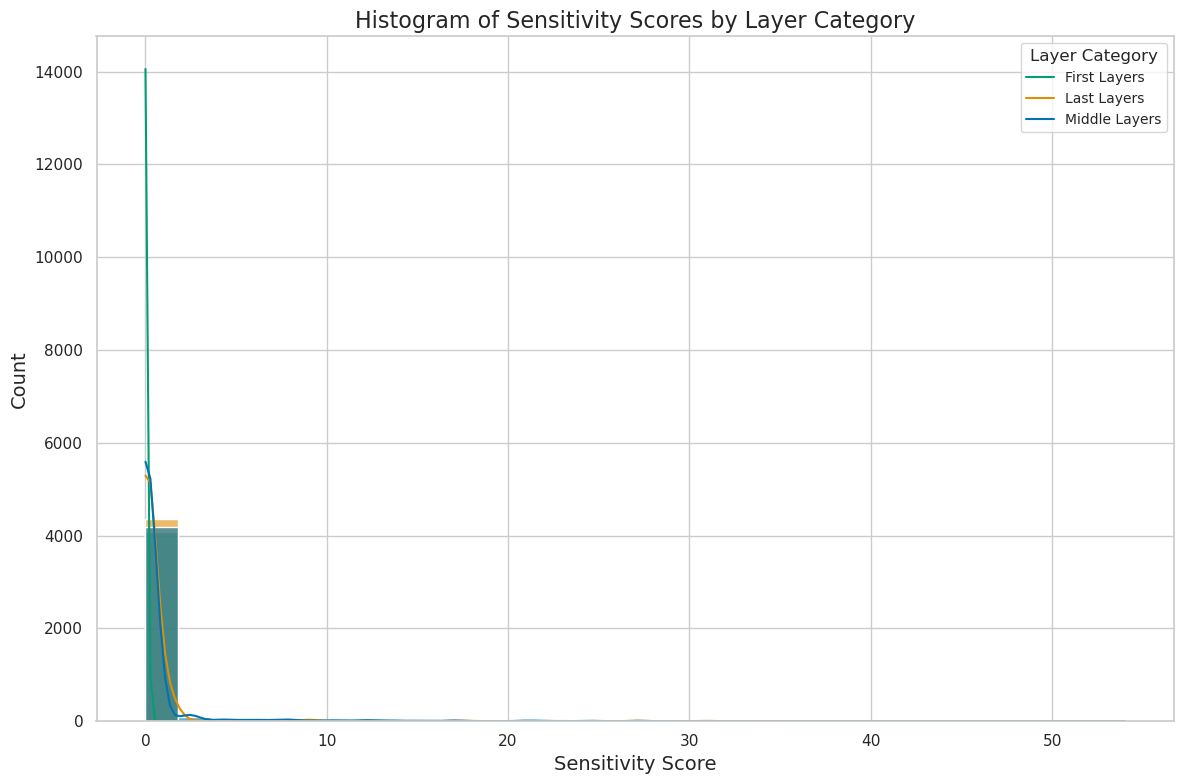

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

layered_sensitivity_df['Layer Category'] = pd.Categorical(layered_sensitivity_df['Layer Category'])

plt.figure(figsize=(12, 8))

ax = sns.histplot(
    data=layered_sensitivity_df,
    x='Sensitivity Score',
    hue='Layer Category',
    element='bars',  
    fill=True,  
    palette='colorblind',  
    bins=30,  
    kde=True,  
    common_norm=False,
    alpha=0.6  
)

plt.title('Histogram of Sensitivity Scores by Layer Category', fontsize=16)
plt.xlabel('Sensitivity Score', fontsize=14)
plt.ylabel('Count', fontsize=14)

layer_categories = layered_sensitivity_df['Layer Category'].cat.categories
ax.legend(title='Layer Category', labels=layer_categories, title_fontsize='12', fontsize='10')

plt.tight_layout()
plt.show()


In [216]:
layered_sensitivity_df

,Layer Category,Sensitivity Score
0,First Layers,0.012488
1,First Layers,5.307731
2,First Layers,0.013597
3,First Layers,0.012040
4,First Layers,0.012854
...,...,...
13147,Last Layers,0.031047
13148,Last Layers,0.036595
13149,Last Layers,0.043550
13150,Last Layers,0.053178


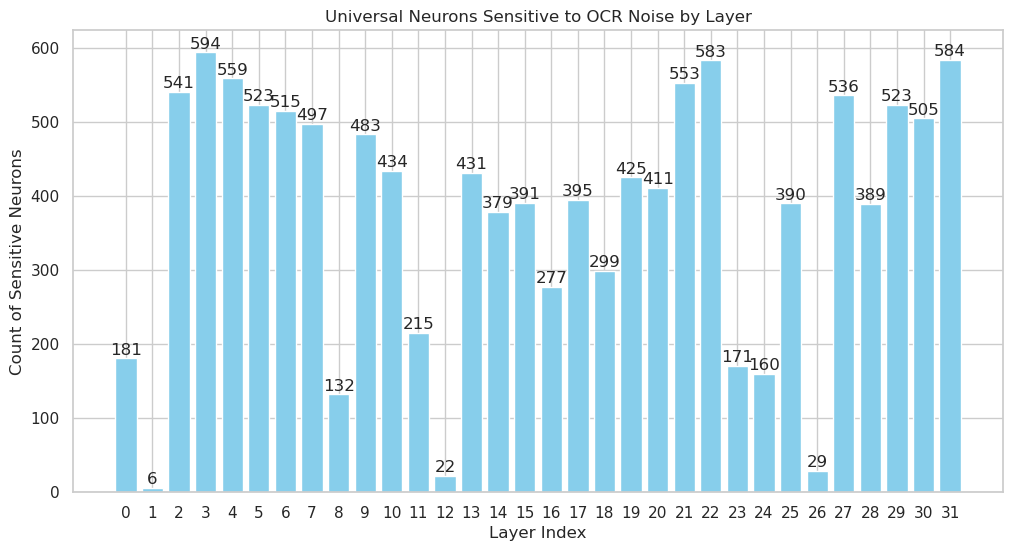

In [219]:
# Output the universal sensitive neurons
# print("Universal neurons sensitive to OCR noise:")
# for layer, neurons in universal_neurons.items():
#     print(f"Layer {layer}: {neurons}")
    
    
import matplotlib.pyplot as plt

def plot_universal_neurons(universal_neurons):
    layers = list(universal_neurons.keys())
    counts = [len(neurons) for neurons in universal_neurons.values()]

    plt.figure(figsize=(12, 6))
    plt.bar(layers, counts, color='skyblue')

    for i, count in enumerate(counts):
        plt.text(i, count + 1, str(count), ha='center', va='bottom')

    plt.xlabel('Layer Index')
    plt.ylabel('Count of Sensitive Neurons')
    plt.title('Universal Neurons Sensitive to OCR Noise by Layer')
    plt.xticks(layers)  # Ensure only layers with data are ticked
    plt.show()

plot_universal_neurons(universal_neurons)

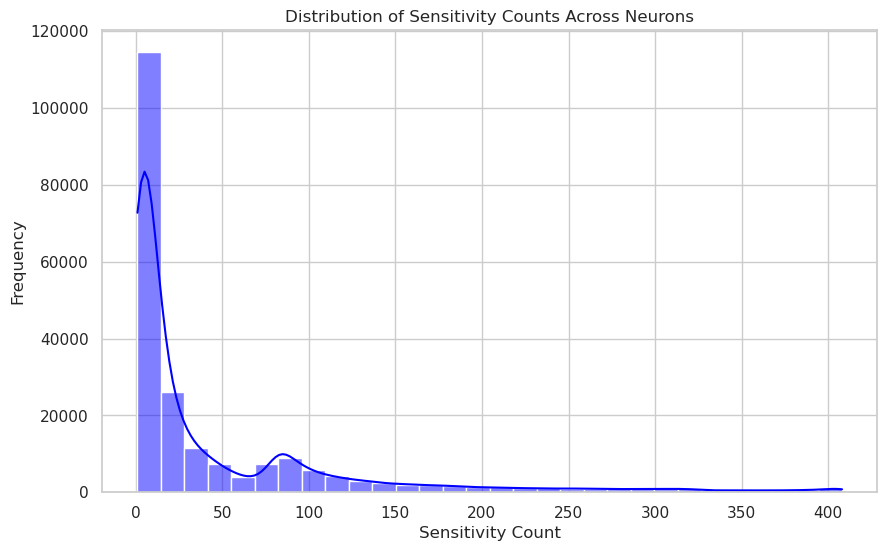

In [220]:
all_counts = [count for counts in neuron_sensitivity_count.values() for count in counts.values()]

plt.figure(figsize=(10, 6))
sns.histplot(all_counts, bins=30, color='blue', kde=True)
plt.title('Distribution of Sensitivity Counts Across Neurons')
plt.xlabel('Sensitivity Count')
plt.ylabel('Frequency')
plt.show()


   Layer  Sensitivity Count
0      0                159
1      0                238
2      0                395
3      0                 52
4      0                122


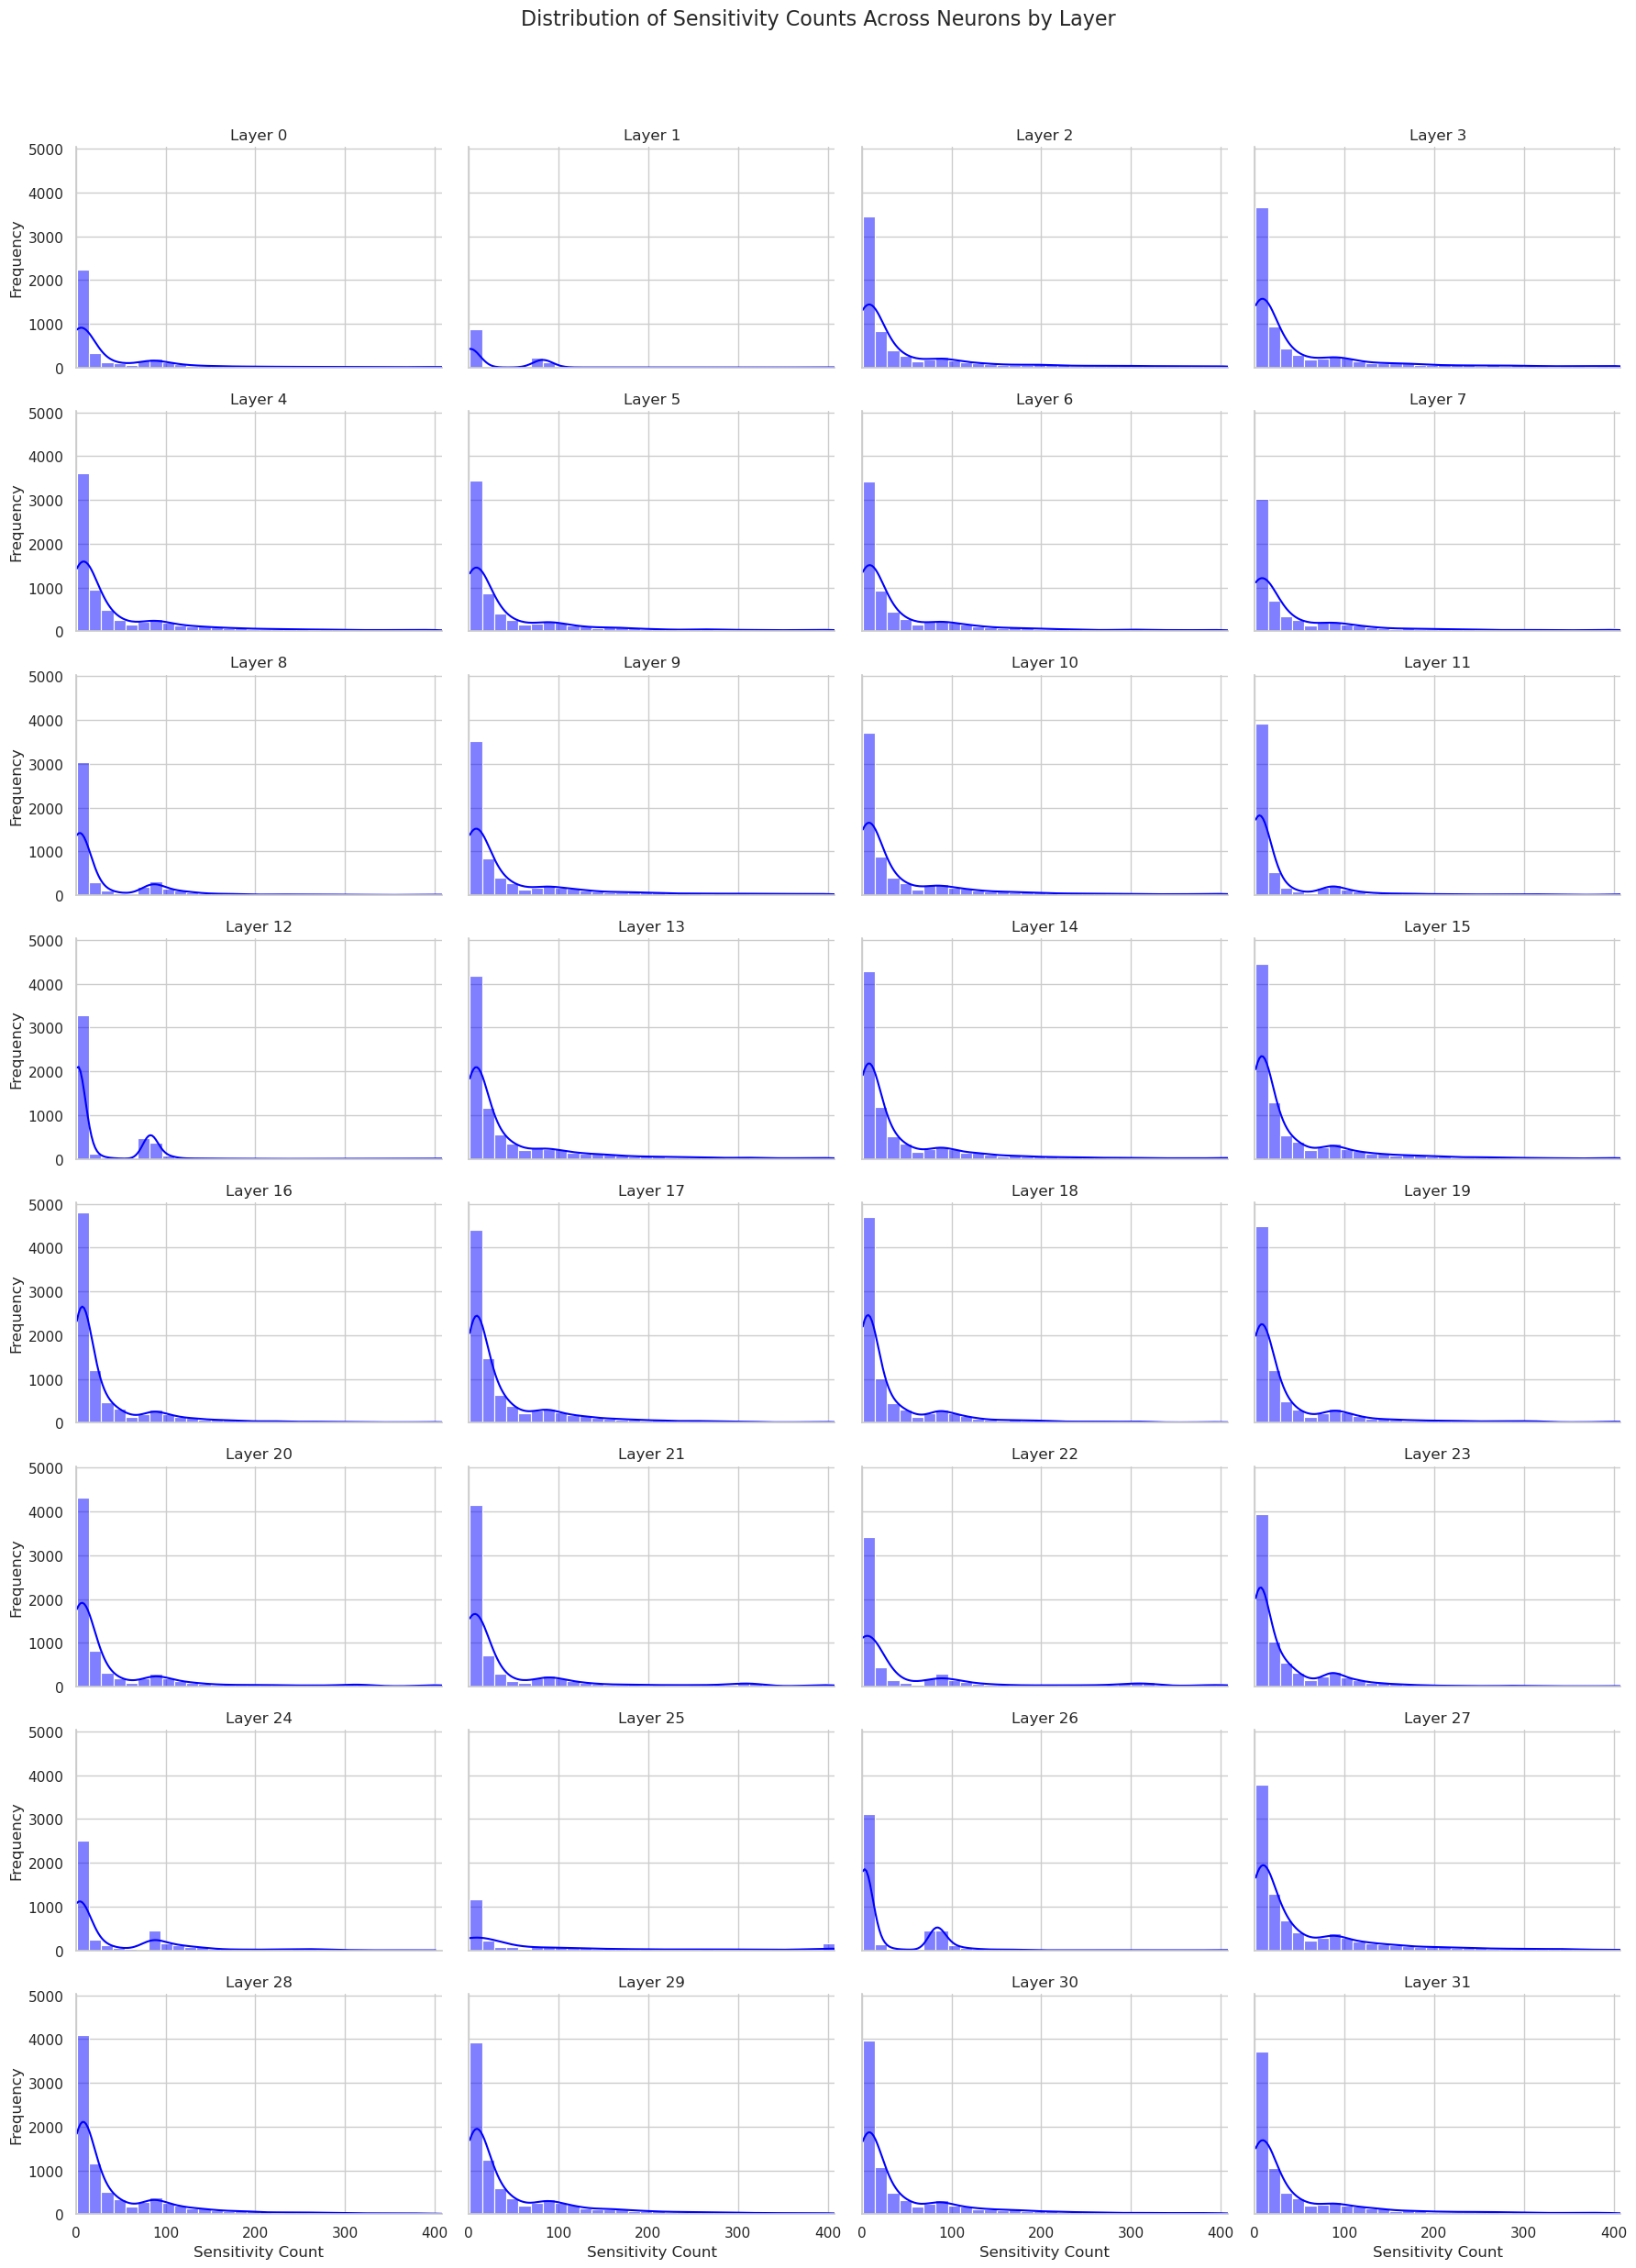

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_list = []

for layer, neurons in neuron_sensitivity_count.items():
    for neuron, count in neurons.items():
        data_list.append({'Layer': layer, 'Sensitivity Count': count})

df = pd.DataFrame(data_list)

print(df.head())
sns.set(style="whitegrid")

g = sns.FacetGrid(df, col='Layer', col_wrap=4, height=3, aspect=1.5)
g.map(sns.histplot, 'Sensitivity Count', bins=30, kde=True, color='blue')

g.fig.suptitle('Distribution of Sensitivity Counts Across Neurons by Layer', size=16, y=1.03)
g.set_titles('Layer {col_name}')
g.set_axis_labels('Sensitivity Count', 'Frequency')
g.set(xlim=(0, df['Sensitivity Count'].max()))

plt.tight_layout()
plt.show()


In [33]:
data_low_noise = data_sample[data_sample['lev_similarity_bins'] == 'Low']
data_medium_noise = data_sample[data_sample['lev_similarity_bins'] == 'Medium']
data_high_noise = data_sample[data_sample['lev_similarity_bins'] == 'High']
data_high_noise

,Unnamed: 0,token_correct,token_ocr,level,pos,lev_similarity,cka_value,lev_similarity_bins
0,0,CHAMBRE,CHAMERE,low,NOUN,0.857143,0.958703,High
1,1,DÉPUTÉS,DÉPOTÉS,low,NOUN,0.857143,0.987959,High
2,2,législature,1égis1ature,low,NOUN,0.818182,0.789599,High
3,3,Session,Se8sion,low,NOUN,0.857143,0.661090,High
4,4,COMPTE,GOMPTE,low,NOUN,0.833333,0.988892,High
...,...,...,...,...,...,...,...,...
1363,1363,sacrifices,8ackifice8,high,NOUN,0.700000,0.930283,High
1366,1366,armements,akmement8,high,NOUN,0.777778,0.891602,High
1369,1369,tentation,tentatiun,high,NOUN,0.888889,0.835895,High
1371,1371,*,*,high,VERB,1.000000,1.000000,High


In [34]:
def generate_activations_for_df(data_df, lm, max_length, column='token_ocr'):
    all_activations = []
    
    for index, row in tqdm(data_df.iterrows(), total=len(data_df)):
        activations = get_neuron_activations(row[column], lm, max_length)
        all_activations.append(activations.flatten())  # Flatten to simplify
    
    return pd.DataFrame(all_activations)


In [ ]:
data_noise_high_activations = generate_activations_for_df(data_high_noise, lm, MAX_LENGTH, 'token_ocr')
data_noise_medium_activations = generate_activations_for_df(data_medium_noise, lm, MAX_LENGTH, 'token_ocr')
data_noise_low_activations = generate_activations_for_df(data_low_noise, lm, MAX_LENGTH, 'token_ocr')


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1137/1137 [24:52<00:00,  1.31s/it]


In [ ]:
data_correct_high_activations = generate_activations_for_df(data_high_noise, lm, MAX_LENGTH, 'token_correct')
data_correct_medium_activations = generate_activations_for_df(data_medium_noise, lm, MAX_LENGTH, 'token_correct')
data_correct_low_activations = generate_activations_for_df(data_low_noise, lm, MAX_LENGTH, 'token_correct')


In [ ]:
import numpy as np

def calculate_sensitivity_correlations(data_correct, data_ocr):
    correlations = {}
    for level in ['high', 'medium', 'low']:
        correct_activations = data_correct[level]
        ocr_activations = data_ocr[level]
        
        neuron_correlations = np.corrcoef(correct_activations.T, ocr_activations.T).diagonal(offset=correct_activations.shape[0])
        correlations[level] = neuron_correlations

    return correlations

neuron_correlations = calculate_sensitivity_correlations(data_correct_activations, data_noise_activations)

def analyze_correlation_differences(correlations):
    results = {}
    levels = list(correlations.keys())
    for i in range(len(levels)):
        for j in range(i + 1, len(levels)):
            level1, level2 = levels[i], levels[j]
            corr_between_levels = np.corrcoef(correlations[level1], correlations[level2])[0, 1]
            results[f'{level1}-{level2}'] = corr_between_levels
    return results

correlation_differences = analyze_correlation_differences(neuron_correlations)


In [ ]:
from scipy.stats import pearsonr

# Function to compute Pearson correlation matrix between two datasets
def compute_correlations(data1, data2):
    num_neurons1, num_neurons2 = data1.shape[0], data2.shape[0]
    correlation_matrix = np.zeros((num_neurons1, num_neurons2))

    for i in range(num_neurons1):
        for j in range(num_neurons2):
            correlation_matrix[i, j], _ = pearsonr(data1.iloc[i], data2.iloc[j])
    
    return correlation_matrix

# Compute correlations
correlations_high_medium = compute_correlations(data_high_noise, data_medium_noise)
correlations_high_low = compute_correlations(data_high_noise, data_low_noise)

# Optional: Convert to DataFrame for better readability
correlations_high_medium_df = pd.DataFrame(correlations_high_medium, 
                                           index=data_high_noise.index, 
                                           columns=data_medium_noise.index)
correlations_high_low_df = pd.DataFrame(correlations_high_low, 
                                         index=data_high_noise.index, 
                                         columns=data_low_noise.index)


In [20]:
import numpy as np
import ecco
import pandas as pd
from tqdm import tqdm
from ecco import analysis

# Define the maximum sequence length
MAX_LENGTH = 64

def initialize_model(model_name):
    lm = ecco.from_pretrained(model_name, activations=True, gpu=False)
    lm.tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    lm.model.resize_token_embeddings(len(lm.tokenizer))
    return lm


def get_neuron_activations(text, lm, max_length=512):
    # Tokenize the input text and ensure it is truncated or padded to max_length
    input_tokenized_info = lm.tokenizer(text, return_tensors="pt", 
                                        max_length=max_length, padding='max_length', truncation=True)
    
    # Generate model output
    output = lm(input_tokenized_info)
    
    # Return the output which includes the activations
    return output.activations['decoder'][0]

def compare_activations(activations_correct, activations_ocr):
    # Assuming activations are numpy arrays with shape (layers, neurons, sequence_length)
    neuron_sensitivity = {}
    for layer in range(activations_correct.shape[0]):
        # Calculate the mean absolute difference between correct and OCR activations for each neuron
        diff = np.mean(np.abs(activations_correct[layer] - activations_ocr[layer]), axis=1)
        # Identify neurons with high sensitivity
        sensitive_neurons = np.where(diff > diff.mean() + diff.std())[0]
        neuron_sensitivity[layer] = sensitive_neurons
    return neuron_sensitivity


def get_universal_neurons(data_sample, lm, max_length=64):
    universal_neurons = {}

    for i in tqdm(range(len(data_sample)), total=len(data_sample)):
        corrected_activations = get_neuron_activations(data_sample['token_correct'].iloc[i], lm, max_length)
        ocr_activations = get_neuron_activations(data_sample['token_ocr'].iloc[i], lm, max_length)
#         print(corrected_activations[0][0])
#         print(ocr_activations[0][0])
        # Find sensitive neurons for this instance
        print(corrected_activations.shape, ocr_activations.shape)
        print(analysis.cka(corrected_activations[0,:,:].T, ocr_activations[0,:,:].T))
        neuron_sensitivity = compare_activations(corrected_activations, ocr_activations)

        # Aggregate results to identify universal neurons across the dataset
        for layer, sensitive_neurons in neuron_sensitivity.items():
            if layer not in universal_neurons:
                universal_neurons[layer] = sensitive_neurons
            else:
                # Update the list of universal neurons by taking the intersection
                universal_neurons[layer] = np.intersect1d(universal_neurons[layer], sensitive_neurons)
#                 print(universal_neurons[layer])
        
        print('--'*20)
    
    return universal_neurons

# List of models to analyze
models = ['gpt2', 'gpt2-medium']

# Dictionary to store universal neurons for each model
all_universal_neurons = {}

for model_name in models:
    print(f"Processing model: {model_name}")
    lm = initialize_model(model_name)
    all_universal_neurons[model_name] = get_universal_neurons(data_sample[data_sample.level == 'high'], lm, MAX_LENGTH)

# Output the universal sensitive neurons for each model
for model_name, universal_neurons in all_universal_neurons.items():
    print(f"Universal neurons sensitive to OCR noise in {model_name}:")
    for layer, neurons in universal_neurons.items():
        print(f"Layer {layer}: {neurons}")


Processing model: gpt2


  0%|▊                                                                                                                                                                            | 2/458 [00:00<00:52,  8.74it/s]

(12, 3072, 64) (12, 3072, 64)
0.8149445632526874
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.950737675361126
----------------------------------------


  1%|█▌                                                                                                                                                                           | 4/458 [00:00<00:49,  9.22it/s]

(12, 3072, 64) (12, 3072, 64)
0.8137744139999339
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.2775944729915881
----------------------------------------


  1%|██▎                                                                                                                                                                          | 6/458 [00:00<00:48,  9.41it/s]

(12, 3072, 64) (12, 3072, 64)
0.8097216065310777
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.9385374765228448
----------------------------------------


  2%|███                                                                                                                                                                          | 8/458 [00:00<00:47,  9.50it/s]

(12, 3072, 64) (12, 3072, 64)
0.9385374765228448
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.729648952053466
----------------------------------------


  2%|███▊                                                                                                                                                                        | 10/458 [00:01<00:47,  9.52it/s]

(12, 3072, 64) (12, 3072, 64)
0.855044799337908
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8398329126573755
----------------------------------------


  3%|████▌                                                                                                                                                                       | 12/458 [00:01<00:46,  9.56it/s]

(12, 3072, 64) (12, 3072, 64)
1.0000000337210229
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7300699737776112
----------------------------------------


  3%|█████▎                                                                                                                                                                      | 14/458 [00:01<00:46,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.8645555309721158
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7549591548400226
----------------------------------------


  3%|██████                                                                                                                                                                      | 16/458 [00:01<00:46,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.8230593761173851
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6675398005329783
----------------------------------------


  4%|██████▊                                                                                                                                                                     | 18/458 [00:01<00:45,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.8017055382127867
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8442442874590854
----------------------------------------


  4%|███████▌                                                                                                                                                                    | 20/458 [00:02<00:45,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.7179655609412269
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7722067363688825
----------------------------------------


  5%|████████▎                                                                                                                                                                   | 22/458 [00:02<00:45,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.27178650572416085
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.9034813172256372
----------------------------------------


  5%|█████████                                                                                                                                                                   | 24/458 [00:02<00:45,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.8230593761173851
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.3198127313500435
----------------------------------------


  6%|█████████▊                                                                                                                                                                  | 26/458 [00:02<00:45,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.8230593761173851
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


  6%|██████████▌                                                                                                                                                                 | 28/458 [00:02<00:44,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
1.0000000217100307
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.9999999742177668
----------------------------------------


  7%|███████████▎                                                                                                                                                                | 30/458 [00:03<00:44,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.8123990274567394
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
1.0000000337210229
----------------------------------------


  7%|████████████                                                                                                                                                                | 32/458 [00:03<00:44,  9.60it/s]

(12, 3072, 64) (12, 3072, 64)
0.7905309978466097
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8528656294373999
----------------------------------------


  7%|████████████▊                                                                                                                                                               | 34/458 [00:03<00:44,  9.60it/s]

(12, 3072, 64) (12, 3072, 64)
0.8128434171282363
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6883240199393279
----------------------------------------


  8%|█████████████▌                                                                                                                                                              | 36/458 [00:03<00:43,  9.60it/s]

(12, 3072, 64) (12, 3072, 64)
0.925582842735475
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7144109512558441
----------------------------------------


  8%|██████████████▎                                                                                                                                                             | 38/458 [00:03<00:43,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.6697817197261275
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.81228235007944
----------------------------------------


  9%|███████████████                                                                                                                                                             | 40/458 [00:04<00:43,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.8804900454239646
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7608646728238753
----------------------------------------


  9%|███████████████▊                                                                                                                                                            | 42/458 [00:04<00:43,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
1.0000000337210229
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8528656294373999
----------------------------------------


 10%|████████████████▌                                                                                                                                                           | 44/458 [00:04<00:43,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.7781867973729831
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.9554802822418152
----------------------------------------


 10%|█████████████████▎                                                                                                                                                          | 46/458 [00:04<00:42,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.8521403524284501
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6675398005329783
----------------------------------------


 10%|██████████████████                                                                                                                                                          | 48/458 [00:05<00:42,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.27178650572416085
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.3198127313500435
----------------------------------------


 11%|██████████████████▊                                                                                                                                                         | 50/458 [00:05<00:42,  9.60it/s]

(12, 3072, 64) (12, 3072, 64)
0.8230593761173851
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 11%|███████████████████▌                                                                                                                                                        | 52/458 [00:05<00:42,  9.60it/s]

(12, 3072, 64) (12, 3072, 64)
1.0000000337210229
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8528656294373999
----------------------------------------


 12%|████████████████████▎                                                                                                                                                       | 54/458 [00:05<00:42,  9.60it/s]

(12, 3072, 64) (12, 3072, 64)
0.8128434171282363
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6883240199393279
----------------------------------------


 12%|█████████████████████                                                                                                                                                       | 56/458 [00:05<00:41,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.925582842735475
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7727062067098216
----------------------------------------


 13%|█████████████████████▊                                                                                                                                                      | 58/458 [00:06<00:41,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.7894663632032459
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8389243149905796
----------------------------------------


 13%|██████████████████████▌                                                                                                                                                     | 60/458 [00:06<00:41,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.8218140734750171
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8528656294373999
----------------------------------------


 14%|███████████████████████▎                                                                                                                                                    | 62/458 [00:06<00:41,  9.60it/s]

(12, 3072, 64) (12, 3072, 64)
0.6632158174351055
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.27178650572416085
----------------------------------------


 14%|████████████████████████                                                                                                                                                    | 64/458 [00:06<00:41,  9.60it/s]

(12, 3072, 64) (12, 3072, 64)
0.8528656294373999
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8387307559251629
----------------------------------------


 14%|████████████████████████▊                                                                                                                                                   | 66/458 [00:06<00:40,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.7703568790421271
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6632158174351055
----------------------------------------


 15%|█████████████████████████▌                                                                                                                                                  | 68/458 [00:07<00:40,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.7440410522969924
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8245756855311548
----------------------------------------


 15%|██████████████████████████▎                                                                                                                                                 | 70/458 [00:07<00:40,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.7645631805942354
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 16%|███████████████████████████                                                                                                                                                 | 72/458 [00:07<00:40,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.6890294402436956
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.898952410742569
----------------------------------------


 16%|███████████████████████████▊                                                                                                                                                | 74/458 [00:07<00:40,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
1.0000000339405575
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 17%|████████████████████████████▌                                                                                                                                               | 76/458 [00:07<00:39,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7645631805942354
----------------------------------------


 17%|█████████████████████████████▎                                                                                                                                              | 78/458 [00:08<00:39,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 17%|██████████████████████████████                                                                                                                                              | 80/458 [00:08<00:39,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.6890294402436956
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 18%|██████████████████████████████▊                                                                                                                                             | 82/458 [00:08<00:39,  9.56it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------


 18%|███████████████████████████████▌                                                                                                                                            | 84/458 [00:08<00:39,  9.56it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 19%|████████████████████████████████▎                                                                                                                                           | 86/458 [00:09<00:38,  9.55it/s]

(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 19%|█████████████████████████████████                                                                                                                                           | 88/458 [00:09<00:38,  9.55it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7645631805942354
----------------------------------------


 20%|█████████████████████████████████▊                                                                                                                                          | 90/458 [00:09<00:38,  9.47it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 20%|██████████████████████████████████▌                                                                                                                                         | 92/458 [00:09<00:38,  9.46it/s]

(12, 3072, 64) (12, 3072, 64)
0.7092897781941223
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 21%|███████████████████████████████████▎                                                                                                                                        | 94/458 [00:09<00:38,  9.46it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7645631805942354
----------------------------------------


 21%|████████████████████████████████████                                                                                                                                        | 96/458 [00:10<00:40,  9.05it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 21%|████████████████████████████████████▊                                                                                                                                       | 98/458 [00:10<00:38,  9.25it/s]

(12, 3072, 64) (12, 3072, 64)
0.7645631805942354
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 22%|█████████████████████████████████████▎                                                                                                                                     | 100/458 [00:10<00:39,  9.01it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7092897781941223
----------------------------------------


 22%|██████████████████████████████████████                                                                                                                                     | 102/458 [00:10<00:38,  9.26it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 23%|██████████████████████████████████████▊                                                                                                                                    | 104/458 [00:10<00:38,  9.13it/s]

(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 23%|███████████████████████████████████████▌                                                                                                                                   | 106/458 [00:11<00:37,  9.33it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7092897781941223
----------------------------------------


 24%|████████████████████████████████████████▎                                                                                                                                  | 108/458 [00:11<00:37,  9.46it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 24%|█████████████████████████████████████████                                                                                                                                  | 110/458 [00:11<00:36,  9.46it/s]

(12, 3072, 64) (12, 3072, 64)
0.6890294402436956
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 24%|█████████████████████████████████████████▊                                                                                                                                 | 112/458 [00:11<00:36,  9.52it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7645631805942354
----------------------------------------


 25%|██████████████████████████████████████████▌                                                                                                                                | 114/458 [00:11<00:35,  9.56it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 25%|███████████████████████████████████████████▎                                                                                                                               | 116/458 [00:12<00:36,  9.44it/s]

(12, 3072, 64) (12, 3072, 64)
0.7092897781941223
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 26%|████████████████████████████████████████████                                                                                                                               | 118/458 [00:12<00:35,  9.51it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7645631805942354
----------------------------------------


 26%|████████████████████████████████████████████▊                                                                                                                              | 120/458 [00:12<00:35,  9.55it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 27%|█████████████████████████████████████████████▌                                                                                                                             | 122/458 [00:12<00:35,  9.38it/s]

(12, 3072, 64) (12, 3072, 64)
0.6890294402436956
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 27%|██████████████████████████████████████████████▎                                                                                                                            | 124/458 [00:13<00:35,  9.47it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6890294402436956
----------------------------------------


 28%|███████████████████████████████████████████████                                                                                                                            | 126/458 [00:13<00:35,  9.29it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 28%|███████████████████████████████████████████████▊                                                                                                                           | 128/458 [00:13<00:35,  9.42it/s]

(12, 3072, 64) (12, 3072, 64)
0.7645631805942354
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 28%|████████████████████████████████████████████████▌                                                                                                                          | 130/458 [00:13<00:34,  9.39it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------


 29%|█████████████████████████████████████████████████▎                                                                                                                         | 132/458 [00:13<00:34,  9.48it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 29%|██████████████████████████████████████████████████                                                                                                                         | 134/458 [00:14<00:33,  9.53it/s]

(12, 3072, 64) (12, 3072, 64)
0.6890294402436956
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 30%|██████████████████████████████████████████████████▊                                                                                                                        | 136/458 [00:14<00:34,  9.47it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7092897781941223
----------------------------------------


 30%|███████████████████████████████████████████████████▌                                                                                                                       | 138/458 [00:14<00:33,  9.53it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 31%|████████████████████████████████████████████████████▎                                                                                                                      | 140/458 [00:14<00:33,  9.56it/s]

(12, 3072, 64) (12, 3072, 64)
0.7092897781941223
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 31%|█████████████████████████████████████████████████████                                                                                                                      | 142/458 [00:14<00:33,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7092897781941223
----------------------------------------


 31%|█████████████████████████████████████████████████████▊                                                                                                                     | 144/458 [00:15<00:32,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 32%|██████████████████████████████████████████████████████▌                                                                                                                    | 146/458 [00:15<00:32,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.7092897781941223
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 32%|███████████████████████████████████████████████████████▎                                                                                                                   | 148/458 [00:15<00:32,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7092897781941223
----------------------------------------


 33%|████████████████████████████████████████████████████████                                                                                                                   | 150/458 [00:15<00:32,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 33%|████████████████████████████████████████████████████████▊                                                                                                                  | 152/458 [00:15<00:31,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 34%|█████████████████████████████████████████████████████████▍                                                                                                                 | 154/458 [00:16<00:31,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7092897781941223
----------------------------------------


 34%|██████████████████████████████████████████████████████████▏                                                                                                                | 156/458 [00:16<00:31,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 34%|██████████████████████████████████████████████████████████▉                                                                                                                | 158/458 [00:16<00:31,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 35%|███████████████████████████████████████████████████████████▋                                                                                                               | 160/458 [00:16<00:31,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7092897781941223
----------------------------------------


 35%|████████████████████████████████████████████████████████████▍                                                                                                              | 162/458 [00:17<00:30,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 36%|█████████████████████████████████████████████████████████████▏                                                                                                             | 164/458 [00:17<00:30,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.7092897781941223
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 36%|█████████████████████████████████████████████████████████████▉                                                                                                             | 166/458 [00:17<00:30,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------


 37%|██████████████████████████████████████████████████████████████▋                                                                                                            | 168/458 [00:17<00:30,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 37%|███████████████████████████████████████████████████████████████▍                                                                                                           | 170/458 [00:17<00:30,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.7645631805942354
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 38%|████████████████████████████████████████████████████████████████▏                                                                                                          | 172/458 [00:18<00:29,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6890294402436956
----------------------------------------


 38%|████████████████████████████████████████████████████████████████▉                                                                                                          | 174/458 [00:18<00:29,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 38%|█████████████████████████████████████████████████████████████████▋                                                                                                         | 176/458 [00:18<00:29,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 39%|██████████████████████████████████████████████████████████████████▍                                                                                                        | 178/458 [00:18<00:29,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6890294402436956
----------------------------------------


 39%|███████████████████████████████████████████████████████████████████▏                                                                                                       | 180/458 [00:18<00:29,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 40%|███████████████████████████████████████████████████████████████████▉                                                                                                       | 182/458 [00:19<00:28,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.6890294402436956
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 40%|████████████████████████████████████████████████████████████████████▋                                                                                                      | 184/458 [00:19<00:28,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7092897781941223
----------------------------------------


 41%|█████████████████████████████████████████████████████████████████████▍                                                                                                     | 186/458 [00:19<00:28,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 41%|██████████████████████████████████████████████████████████████████████▏                                                                                                    | 188/458 [00:19<00:28,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 41%|██████████████████████████████████████████████████████████████████████▉                                                                                                    | 190/458 [00:19<00:27,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------


 42%|███████████████████████████████████████████████████████████████████████▋                                                                                                   | 192/458 [00:20<00:27,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 42%|████████████████████████████████████████████████████████████████████████▍                                                                                                  | 194/458 [00:20<00:27,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.7645631805942354
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 43%|█████████████████████████████████████████████████████████████████████████▏                                                                                                 | 196/458 [00:20<00:27,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6890294402436956
----------------------------------------


 43%|█████████████████████████████████████████████████████████████████████████▉                                                                                                 | 198/458 [00:20<00:27,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 44%|██████████████████████████████████████████████████████████████████████████▋                                                                                                | 200/458 [00:21<00:26,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.7645631805942354
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 44%|███████████████████████████████████████████████████████████████████████████▍                                                                                               | 202/458 [00:21<00:26,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7092897781941223
----------------------------------------


 45%|████████████████████████████████████████████████████████████████████████████▏                                                                                              | 204/458 [00:21<00:26,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 45%|████████████████████████████████████████████████████████████████████████████▉                                                                                              | 206/458 [00:21<00:26,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 45%|█████████████████████████████████████████████████████████████████████████████▋                                                                                             | 208/458 [00:21<00:26,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7092897781941223
----------------------------------------


 46%|██████████████████████████████████████████████████████████████████████████████▍                                                                                            | 210/458 [00:22<00:25,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 46%|███████████████████████████████████████████████████████████████████████████████▏                                                                                           | 212/458 [00:22<00:25,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.7645631805942354
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 47%|███████████████████████████████████████████████████████████████████████████████▉                                                                                           | 214/458 [00:22<00:25,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6890294402436956
----------------------------------------


 47%|████████████████████████████████████████████████████████████████████████████████▋                                                                                          | 216/458 [00:22<00:25,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 48%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                         | 218/458 [00:22<00:25,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 48%|██████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 220/458 [00:23<00:24,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------


 48%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                        | 222/458 [00:23<00:24,  9.60it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 49%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 224/458 [00:23<00:24,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.7645631805942354
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 49%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                      | 226/458 [00:23<00:24,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6890294402436956
----------------------------------------


 50%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 228/458 [00:23<00:24,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 50%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 230/458 [00:24<00:23,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.7092897781941223
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 51%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 232/458 [00:24<00:23,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------


 51%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 234/458 [00:24<00:23,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 52%|████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 236/458 [00:24<00:23,  9.50it/s]

(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 52%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                  | 238/458 [00:24<00:23,  9.54it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6890294402436956
----------------------------------------


 52%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 240/458 [00:25<00:22,  9.55it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 53%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 242/458 [00:25<00:22,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.7645631805942354
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 53%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                | 244/458 [00:25<00:22,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------


 54%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 246/458 [00:25<00:22,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 54%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 248/458 [00:26<00:21,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.7092897781941223
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 55%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 250/458 [00:26<00:21,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------


 55%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 252/458 [00:26<00:21,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 55%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 254/458 [00:26<00:21,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.7092897781941223
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 56%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 256/458 [00:26<00:21,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6890294402436956
----------------------------------------


 56%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 258/458 [00:27<00:20,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 260/458 [00:27<00:20,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.7092897781941223
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 262/458 [00:27<00:20,  9.55it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7092897781941223
----------------------------------------


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 264/458 [00:27<00:20,  9.54it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 266/458 [00:27<00:20,  9.54it/s]

(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 268/458 [00:28<00:19,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 270/458 [00:28<00:19,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 272/458 [00:28<00:19,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.7645631805942354
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 274/458 [00:28<00:19,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 276/458 [00:28<00:18,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.6825225441118654
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.974705282671963
----------------------------------------


 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 278/458 [00:29<00:18,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.7323118527660054
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8643187836424295
----------------------------------------


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 280/458 [00:29<00:18,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.9347387711800685
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.2868952105664557
----------------------------------------


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 282/458 [00:29<00:18,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.7937069142264904
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.38925938700983487
----------------------------------------


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 284/458 [00:29<00:18,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.8436177576188277
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7547104515783016
----------------------------------------


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 286/458 [00:29<00:17,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.903618657345474
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
1.000000112014282
----------------------------------------


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 288/458 [00:30<00:17,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.4375247266079278
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7444826546307097
----------------------------------------


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 290/458 [00:30<00:17,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.4375247266079278
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6521053672177263
----------------------------------------


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 292/458 [00:30<00:17,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.7578109092411135
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7867994987944875
----------------------------------------


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 294/458 [00:30<00:17,  9.60it/s]

(12, 3072, 64) (12, 3072, 64)
1.000000112014282
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.4375247266079278
----------------------------------------


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 296/458 [00:31<00:16,  9.60it/s]

(12, 3072, 64) (12, 3072, 64)
0.9999999633368172
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.4375247266079278
----------------------------------------


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                           | 298/458 [00:31<00:16,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.7444826546307097
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.4375247266079278
----------------------------------------


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 300/458 [00:31<00:16,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.6521053672177263
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7616177933225977
----------------------------------------


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 302/458 [00:31<00:16,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
1.000000112014282
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.4375247266079278
----------------------------------------


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 304/458 [00:31<00:16,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.9317168491709299
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.851886969747432
----------------------------------------


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 306/458 [00:32<00:15,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.8404140979005894
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.834855028903141
----------------------------------------


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 308/458 [00:32<00:15,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.8080738075645885
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.9999999648664234
----------------------------------------


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 310/458 [00:32<00:15,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.7661836940700146
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.88874898050996
----------------------------------------


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 312/458 [00:32<00:15,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.8174457935834559
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.762348807013785
----------------------------------------


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 314/458 [00:32<00:15,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.9666703048472103
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6705265385464136
----------------------------------------


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 316/458 [00:33<00:14,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.9536346765619096
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6236285731413832
----------------------------------------


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 318/458 [00:33<00:14,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.38925938700983487
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8170045358637351
----------------------------------------


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 320/458 [00:33<00:14,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.9368731341745623
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.9156908971629492
----------------------------------------


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 322/458 [00:33<00:14,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.8413325720764282
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.858799811858601
----------------------------------------


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 324/458 [00:33<00:13,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.7121619506400894
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.795282058032336
----------------------------------------


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 326/458 [00:34<00:13,  9.59it/s]

(12, 3072, 64) (12, 3072, 64)
0.8357870623508065
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.2691524639349426
----------------------------------------


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 328/458 [00:34<00:13,  9.54it/s]

(12, 3072, 64) (12, 3072, 64)
0.7090909407402172
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.35689121913398136
----------------------------------------


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 330/458 [00:34<00:13,  9.55it/s]

(12, 3072, 64) (12, 3072, 64)
0.8189911297022742
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.2469799024309923
----------------------------------------


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 332/458 [00:34<00:13,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.7744483219421565
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8681852441660257
----------------------------------------


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 334/458 [00:34<00:12,  9.56it/s]

(12, 3072, 64) (12, 3072, 64)
0.31630688067552887
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.9245137877965738
----------------------------------------


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 336/458 [00:35<00:12,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
1.0000001958118527
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.956062865249923
----------------------------------------


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 338/458 [00:35<00:12,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.8263903092830404
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.814419358143564
----------------------------------------


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 340/458 [00:35<00:12,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.31109138620865323
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8880982560844345
----------------------------------------


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 342/458 [00:35<00:12,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.8212217723844665
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8263903092830404
----------------------------------------


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 344/458 [00:36<00:11,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.8947650039703887
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8019890599826083
----------------------------------------


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 346/458 [00:36<00:11,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.9426210153252076
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7147989562731344
----------------------------------------


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 348/458 [00:36<00:11,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.8873396956336351
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8880982560844345
----------------------------------------


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 350/458 [00:36<00:11,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.9144295132341252
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.9131770067255827
----------------------------------------


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 352/458 [00:36<00:11,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.8810957689549336
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8415706538988371
----------------------------------------


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 354/458 [00:37<00:10,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.821501328544615
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7942114095075499
----------------------------------------


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 356/458 [00:37<00:10,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.8311148232281484
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8696986661885817
----------------------------------------


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 358/458 [00:37<00:10,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.7786989212951756
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7575940219683699
----------------------------------------


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 360/458 [00:37<00:10,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.9243136441180656
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7277072622872947
----------------------------------------


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 362/458 [00:37<00:10,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.7090909407402172
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8873396956336351
----------------------------------------


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 364/458 [00:38<00:09,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.9472130556903834
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8878802976136688
----------------------------------------


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 366/458 [00:38<00:09,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.9642286990366102
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7965736967155908
----------------------------------------


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 368/458 [00:38<00:09,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.9055978583886568
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7139190844423191
----------------------------------------


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 370/458 [00:38<00:09,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.7981547872360941
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.821501328544615
----------------------------------------


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 372/458 [00:38<00:08,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.33687988044440836
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7630344422348266
----------------------------------------


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 374/458 [00:39<00:08,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.9245137877965738
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8733106730087118
----------------------------------------


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 376/458 [00:39<00:08,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.8014125414247247
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8692285568535022
----------------------------------------


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 378/458 [00:39<00:08,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.8733106730087118
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8873849574181218
----------------------------------------


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 380/458 [00:39<00:08,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.6613950123549495
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.757993763297576
----------------------------------------


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 382/458 [00:40<00:07,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.8471716926146962
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.9823930236392574
----------------------------------------


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 384/458 [00:40<00:07,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.9999999633368172
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7340548503044628
----------------------------------------


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 386/458 [00:40<00:07,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.7632021177396143
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8104259822422485
----------------------------------------


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 388/458 [00:40<00:07,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.9446776221827515
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7860983118272836
----------------------------------------


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 390/458 [00:40<00:07,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.9999999691101397
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.3990255587588261
----------------------------------------


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 392/458 [00:41<00:06,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.8666136925975411
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.9672363453231766
----------------------------------------


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 394/458 [00:41<00:06,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.3198127313500435
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.9999999532964745
----------------------------------------


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 396/458 [00:41<00:06,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.7358292567385959
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.3198127313500435
----------------------------------------


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 398/458 [00:41<00:06,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.7444826546307097
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.32335131166428177
----------------------------------------


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 400/458 [00:41<00:06,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.2821124159285584
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.787706381571039
----------------------------------------


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 402/458 [00:42<00:05,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.9250983651831103
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8804900454239646
----------------------------------------


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 404/458 [00:42<00:05,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.6964535643214506
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.9054906153593876
----------------------------------------


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 406/458 [00:42<00:05,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.34447001091260254
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8532676756948528
----------------------------------------


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 408/458 [00:42<00:05,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.9999998727548697
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7757589568042951
----------------------------------------


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 410/458 [00:42<00:05,  9.56it/s]

(12, 3072, 64) (12, 3072, 64)
0.6461323457599804
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6204683569350835
----------------------------------------


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 412/458 [00:43<00:04,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.3198127313500435
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.32335131166428177
----------------------------------------


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 414/458 [00:43<00:04,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.8955781165272853
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.805542070166443
----------------------------------------


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 416/458 [00:43<00:04,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.3198127313500435
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.32335131166428177
----------------------------------------


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 418/458 [00:43<00:04,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.3458017029017065
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
1.0000000254724866
----------------------------------------


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 420/458 [00:43<00:03,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.8689833172498966
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7976331545091195
----------------------------------------


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 422/458 [00:44<00:03,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.8960405497285728
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.9074062150422639
----------------------------------------


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 424/458 [00:44<00:03,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.9517479320036311
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7952979220129591
----------------------------------------


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 426/458 [00:44<00:03,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.7937747175621621
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.9157455565761254
----------------------------------------


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 428/458 [00:44<00:03,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.7608327664601247
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7650946851305538
----------------------------------------


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 430/458 [00:45<00:02,  9.56it/s]

(12, 3072, 64) (12, 3072, 64)
0.32335131166428177
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.6396255976366122
----------------------------------------


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 432/458 [00:45<00:02,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.29197313355670174
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8772787577730576
----------------------------------------


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 434/458 [00:45<00:02,  9.44it/s]

(12, 3072, 64) (12, 3072, 64)
0.32029814741054885
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.9999999539729396
----------------------------------------


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 436/458 [00:45<00:02,  9.51it/s]

(12, 3072, 64) (12, 3072, 64)
0.7274318076320749
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7587568167585196
----------------------------------------


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 438/458 [00:45<00:02,  9.55it/s]

(12, 3072, 64) (12, 3072, 64)
1.0000000146503263
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7444132674864743
----------------------------------------


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 440/458 [00:46<00:01,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.9012662745913337
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8270900912166842
----------------------------------------


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 442/458 [00:46<00:01,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.999999984738159
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.2798292895062868
----------------------------------------


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 444/458 [00:46<00:01,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.7715369711259603
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.680384150762621
----------------------------------------


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 446/458 [00:46<00:01,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.8386975485593087
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8441584451339187
----------------------------------------


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 448/458 [00:46<00:01,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.8014125414247247
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.7162451150815357
----------------------------------------


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 450/458 [00:47<00:00,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.766215245567588
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.9061899453136116
----------------------------------------


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 452/458 [00:47<00:00,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.8290222410788924
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.8227975904747725
----------------------------------------


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 454/458 [00:47<00:00,  9.57it/s]

(12, 3072, 64) (12, 3072, 64)
0.7407028838426795
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.9200929878850564
----------------------------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 456/458 [00:47<00:00,  9.58it/s]

(12, 3072, 64) (12, 3072, 64)
0.380108854597376
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
1.0000000403341276
----------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 458/458 [00:47<00:00,  9.55it/s]

(12, 3072, 64) (12, 3072, 64)
1.0000000403341276
----------------------------------------
(12, 3072, 64) (12, 3072, 64)
0.9099231697134398
----------------------------------------
Processing model: gpt2-medium



  0%|▍                                                                                                                                                                            | 1/458 [00:00<02:13,  3.43it/s]

(24, 4096, 64) (24, 4096, 64)
0.4830613543688086
----------------------------------------


  0%|▊                                                                                                                                                                            | 2/458 [00:00<02:07,  3.58it/s]

(24, 4096, 64) (24, 4096, 64)
0.793128587971426
----------------------------------------


  1%|█▏                                                                                                                                                                           | 3/458 [00:00<02:03,  3.68it/s]

(24, 4096, 64) (24, 4096, 64)
0.6372979425279685
----------------------------------------


  1%|█▌                                                                                                                                                                           | 4/458 [00:01<02:01,  3.73it/s]

(24, 4096, 64) (24, 4096, 64)
0.27580530508884227
----------------------------------------


  1%|█▉                                                                                                                                                                           | 5/458 [00:01<02:00,  3.76it/s]

(24, 4096, 64) (24, 4096, 64)
0.6628498615004953
----------------------------------------


  1%|██▎                                                                                                                                                                          | 6/458 [00:01<02:01,  3.72it/s]

(24, 4096, 64) (24, 4096, 64)
0.7803397421295519
----------------------------------------


  2%|██▋                                                                                                                                                                          | 7/458 [00:01<02:00,  3.75it/s]

(24, 4096, 64) (24, 4096, 64)
0.7803397421295519
----------------------------------------


  2%|███                                                                                                                                                                          | 8/458 [00:02<01:59,  3.77it/s]

(24, 4096, 64) (24, 4096, 64)
0.6442608407538192
----------------------------------------


  2%|███▍                                                                                                                                                                         | 9/458 [00:02<01:58,  3.78it/s]

(24, 4096, 64) (24, 4096, 64)
0.683441601110149
----------------------------------------


  2%|███▊                                                                                                                                                                        | 10/458 [00:02<01:58,  3.79it/s]

(24, 4096, 64) (24, 4096, 64)
0.6560768202747906
----------------------------------------


  2%|████▏                                                                                                                                                                       | 11/458 [00:02<01:57,  3.81it/s]

(24, 4096, 64) (24, 4096, 64)
1.000000028075546
----------------------------------------


  3%|████▌                                                                                                                                                                       | 12/458 [00:03<01:56,  3.82it/s]

(24, 4096, 64) (24, 4096, 64)
0.6061043993879845
----------------------------------------


  3%|████▉                                                                                                                                                                       | 13/458 [00:03<01:56,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.7647686713114694
----------------------------------------


  3%|█████▎                                                                                                                                                                      | 14/458 [00:03<01:55,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.7449299559234379
----------------------------------------


  3%|█████▋                                                                                                                                                                      | 15/458 [00:03<01:55,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.7147319239153216
----------------------------------------


  3%|██████                                                                                                                                                                      | 16/458 [00:04<01:55,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.44529554942555677
----------------------------------------


  4%|██████▍                                                                                                                                                                     | 17/458 [00:04<01:55,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.8658969971746393
----------------------------------------


  4%|██████▊                                                                                                                                                                     | 18/458 [00:04<01:54,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.6582926892212057
----------------------------------------


  4%|███████▏                                                                                                                                                                    | 19/458 [00:05<01:54,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.6335027092369672
----------------------------------------


  4%|███████▌                                                                                                                                                                    | 20/458 [00:05<01:53,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.5534789625598617
----------------------------------------


  5%|███████▉                                                                                                                                                                    | 21/458 [00:05<01:53,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.4524112338646796
----------------------------------------


  5%|████████▎                                                                                                                                                                   | 22/458 [00:05<01:57,  3.72it/s]

(24, 4096, 64) (24, 4096, 64)
0.8068916122788407
----------------------------------------


  5%|████████▋                                                                                                                                                                   | 23/458 [00:06<01:56,  3.75it/s]

(24, 4096, 64) (24, 4096, 64)
0.7147319239153216
----------------------------------------


  5%|█████████                                                                                                                                                                   | 24/458 [00:06<01:55,  3.76it/s]

(24, 4096, 64) (24, 4096, 64)
0.5956081915813211
----------------------------------------


  5%|█████████▍                                                                                                                                                                  | 25/458 [00:06<01:54,  3.78it/s]

(24, 4096, 64) (24, 4096, 64)
0.7147319239153216
----------------------------------------


  6%|█████████▊                                                                                                                                                                  | 26/458 [00:06<01:53,  3.79it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


  6%|██████████▏                                                                                                                                                                 | 27/458 [00:07<01:53,  3.81it/s]

(24, 4096, 64) (24, 4096, 64)
1.0000001628840698
----------------------------------------


  6%|██████████▌                                                                                                                                                                 | 28/458 [00:07<01:52,  3.82it/s]

(24, 4096, 64) (24, 4096, 64)
1.0000000185252496
----------------------------------------


  6%|██████████▉                                                                                                                                                                 | 29/458 [00:07<01:52,  3.82it/s]

(24, 4096, 64) (24, 4096, 64)
0.7569748298836582
----------------------------------------


  7%|███████████▎                                                                                                                                                                | 30/458 [00:07<01:51,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
1.000000028075546
----------------------------------------


  7%|███████████▋                                                                                                                                                                | 31/458 [00:08<01:51,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.644264287304297
----------------------------------------


  7%|████████████                                                                                                                                                                | 32/458 [00:08<01:51,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.7947538263411126
----------------------------------------


  7%|████████████▍                                                                                                                                                               | 33/458 [00:08<01:51,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.42844531407450226
----------------------------------------


  7%|████████████▊                                                                                                                                                               | 34/458 [00:08<01:50,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.5839328975805425
----------------------------------------


  8%|█████████████▏                                                                                                                                                              | 35/458 [00:09<01:50,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.810097539799552
----------------------------------------


  8%|█████████████▌                                                                                                                                                              | 36/458 [00:09<01:50,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.6233926688147808
----------------------------------------


  8%|█████████████▉                                                                                                                                                              | 37/458 [00:09<01:49,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.49904258323624573
----------------------------------------


  8%|██████████████▎                                                                                                                                                             | 38/458 [00:10<01:49,  3.82it/s]

(24, 4096, 64) (24, 4096, 64)
0.6320308790693332
----------------------------------------


  9%|██████████████▋                                                                                                                                                             | 39/458 [00:10<01:49,  3.82it/s]

(24, 4096, 64) (24, 4096, 64)
0.7881631042603513
----------------------------------------


  9%|███████████████                                                                                                                                                             | 40/458 [00:10<01:49,  3.82it/s]

(24, 4096, 64) (24, 4096, 64)
0.6490642420309931
----------------------------------------


  9%|███████████████▍                                                                                                                                                            | 41/458 [00:10<01:48,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
1.000000028075546
----------------------------------------


  9%|███████████████▊                                                                                                                                                            | 42/458 [00:11<01:48,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.7947538263411126
----------------------------------------


  9%|████████████████▏                                                                                                                                                           | 43/458 [00:11<01:48,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.37747885586132085
----------------------------------------


 10%|████████████████▌                                                                                                                                                           | 44/458 [00:11<01:48,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.9238415271930185
----------------------------------------


 10%|████████████████▉                                                                                                                                                           | 45/458 [00:11<01:47,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.5561567474010132
----------------------------------------


 10%|█████████████████▎                                                                                                                                                          | 46/458 [00:12<01:47,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.44529554942555677
----------------------------------------


 10%|█████████████████▋                                                                                                                                                          | 47/458 [00:12<01:47,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.4524112338646796
----------------------------------------


 10%|██████████████████                                                                                                                                                          | 48/458 [00:12<01:47,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.5956081915813211
----------------------------------------


 11%|██████████████████▍                                                                                                                                                         | 49/458 [00:12<01:46,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.7147319239153216
----------------------------------------


 11%|██████████████████▊                                                                                                                                                         | 50/458 [00:13<01:46,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 11%|███████████████████▏                                                                                                                                                        | 51/458 [00:13<01:46,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
1.000000028075546
----------------------------------------


 11%|███████████████████▌                                                                                                                                                        | 52/458 [00:13<01:45,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.7947538263411126
----------------------------------------


 12%|███████████████████▉                                                                                                                                                        | 53/458 [00:13<01:45,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.42844531407450226
----------------------------------------


 12%|████████████████████▎                                                                                                                                                       | 54/458 [00:14<01:45,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.5839328975805425
----------------------------------------


 12%|████████████████████▋                                                                                                                                                       | 55/458 [00:14<01:45,  3.82it/s]

(24, 4096, 64) (24, 4096, 64)
0.810097539799552
----------------------------------------


 12%|█████████████████████                                                                                                                                                       | 56/458 [00:14<01:45,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.6061593098008115
----------------------------------------


 12%|█████████████████████▍                                                                                                                                                      | 57/458 [00:14<01:44,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.4461694187801583
----------------------------------------


 13%|█████████████████████▊                                                                                                                                                      | 58/458 [00:15<01:44,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.6002719226383058
----------------------------------------


 13%|██████████████████████▏                                                                                                                                                     | 59/458 [00:15<01:44,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.4811432040521588
----------------------------------------


 13%|██████████████████████▌                                                                                                                                                     | 60/458 [00:15<01:44,  3.81it/s]

(24, 4096, 64) (24, 4096, 64)
0.7947538263411126
----------------------------------------


 13%|██████████████████████▉                                                                                                                                                     | 61/458 [00:16<01:44,  3.82it/s]

(24, 4096, 64) (24, 4096, 64)
0.3104046925801669
----------------------------------------


 14%|███████████████████████▎                                                                                                                                                    | 62/458 [00:16<01:43,  3.82it/s]

(24, 4096, 64) (24, 4096, 64)
0.4524112338646796
----------------------------------------


 14%|███████████████████████▋                                                                                                                                                    | 63/458 [00:16<01:43,  3.82it/s]

(24, 4096, 64) (24, 4096, 64)
0.7947538263411126
----------------------------------------


 14%|████████████████████████                                                                                                                                                    | 64/458 [00:16<01:42,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.5426494175715209
----------------------------------------


 14%|████████████████████████▍                                                                                                                                                   | 65/458 [00:17<01:42,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.33912417554603463
----------------------------------------


 14%|████████████████████████▊                                                                                                                                                   | 66/458 [00:17<01:42,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.3104046925801669
----------------------------------------


 15%|█████████████████████████▏                                                                                                                                                  | 67/458 [00:17<01:42,  3.82it/s]

(24, 4096, 64) (24, 4096, 64)
0.575263067374917
----------------------------------------


 15%|█████████████████████████▌                                                                                                                                                  | 68/458 [00:17<01:41,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.7820816491466025
----------------------------------------


 15%|█████████████████████████▉                                                                                                                                                  | 69/458 [00:18<01:41,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.5339356368619811
----------------------------------------


 15%|██████████████████████████▎                                                                                                                                                 | 70/458 [00:18<01:41,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 16%|██████████████████████████▋                                                                                                                                                 | 71/458 [00:18<01:40,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.4084447339153172
----------------------------------------


 16%|███████████████████████████                                                                                                                                                 | 72/458 [00:18<01:40,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.7688657440480882
----------------------------------------


 16%|███████████████████████████▍                                                                                                                                                | 73/458 [00:19<01:40,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
1.0000000206612851
----------------------------------------


 16%|███████████████████████████▊                                                                                                                                                | 74/458 [00:19<01:39,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 16%|████████████████████████████▏                                                                                                                                               | 75/458 [00:19<01:39,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 17%|████████████████████████████▌                                                                                                                                               | 76/458 [00:19<01:39,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.5339356368619811
----------------------------------------


 17%|████████████████████████████▉                                                                                                                                               | 77/458 [00:20<01:39,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 17%|█████████████████████████████▎                                                                                                                                              | 78/458 [00:20<01:38,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 17%|█████████████████████████████▋                                                                                                                                              | 79/458 [00:20<01:38,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.4084447339153172
----------------------------------------


 17%|██████████████████████████████                                                                                                                                              | 80/458 [00:20<01:38,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 18%|██████████████████████████████▍                                                                                                                                             | 81/458 [00:21<01:38,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 18%|██████████████████████████████▊                                                                                                                                             | 82/458 [00:21<01:37,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 18%|███████████████████████████████▏                                                                                                                                            | 83/458 [00:21<01:37,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 18%|███████████████████████████████▌                                                                                                                                            | 84/458 [00:22<01:37,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 19%|███████████████████████████████▉                                                                                                                                            | 85/458 [00:22<01:37,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 19%|████████████████████████████████▎                                                                                                                                           | 86/458 [00:22<01:36,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 19%|████████████████████████████████▋                                                                                                                                           | 87/458 [00:22<01:36,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 19%|█████████████████████████████████                                                                                                                                           | 88/458 [00:23<01:36,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.5339356368619811
----------------------------------------


 19%|█████████████████████████████████▍                                                                                                                                          | 89/458 [00:23<01:35,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 20%|█████████████████████████████████▊                                                                                                                                          | 90/458 [00:23<01:35,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 20%|██████████████████████████████████▏                                                                                                                                         | 91/458 [00:23<01:35,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.5067011231427978
----------------------------------------


 20%|██████████████████████████████████▌                                                                                                                                         | 92/458 [00:24<01:35,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 20%|██████████████████████████████████▉                                                                                                                                         | 93/458 [00:24<01:34,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 21%|███████████████████████████████████▎                                                                                                                                        | 94/458 [00:24<01:34,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.5339356368619811
----------------------------------------


 21%|███████████████████████████████████▋                                                                                                                                        | 95/458 [00:24<01:34,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 21%|████████████████████████████████████                                                                                                                                        | 96/458 [00:25<01:34,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 21%|████████████████████████████████████▍                                                                                                                                       | 97/458 [00:25<01:33,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.5339356368619811
----------------------------------------


 21%|████████████████████████████████████▊                                                                                                                                       | 98/458 [00:25<01:33,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 22%|█████████████████████████████████████▏                                                                                                                                      | 99/458 [00:25<01:33,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 22%|█████████████████████████████████████▎                                                                                                                                     | 100/458 [00:26<01:33,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.5067011231427978
----------------------------------------


 22%|█████████████████████████████████████▋                                                                                                                                     | 101/458 [00:26<01:32,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 22%|██████████████████████████████████████                                                                                                                                     | 102/458 [00:26<01:32,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 22%|██████████████████████████████████████▍                                                                                                                                    | 103/458 [00:26<01:32,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 23%|██████████████████████████████████████▊                                                                                                                                    | 104/458 [00:27<01:31,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 23%|███████████████████████████████████████▏                                                                                                                                   | 105/458 [00:27<01:31,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 23%|███████████████████████████████████████▌                                                                                                                                   | 106/458 [00:27<01:31,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.5067011231427978
----------------------------------------


 23%|███████████████████████████████████████▉                                                                                                                                   | 107/458 [00:27<01:31,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 24%|████████████████████████████████████████▎                                                                                                                                  | 108/458 [00:28<01:31,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 24%|████████████████████████████████████████▋                                                                                                                                  | 109/458 [00:28<01:32,  3.79it/s]

(24, 4096, 64) (24, 4096, 64)
0.4084447339153172
----------------------------------------


 24%|█████████████████████████████████████████                                                                                                                                  | 110/458 [00:28<01:31,  3.80it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 24%|█████████████████████████████████████████▍                                                                                                                                 | 111/458 [00:29<01:30,  3.81it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 24%|█████████████████████████████████████████▊                                                                                                                                 | 112/458 [00:29<01:30,  3.82it/s]

(24, 4096, 64) (24, 4096, 64)
0.5339356368619811
----------------------------------------


 25%|██████████████████████████████████████████▏                                                                                                                                | 113/458 [00:29<01:30,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 25%|██████████████████████████████████████████▌                                                                                                                                | 114/458 [00:29<01:29,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 25%|██████████████████████████████████████████▉                                                                                                                                | 115/458 [00:30<01:29,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.5067011231427978
----------------------------------------


 25%|███████████████████████████████████████████▎                                                                                                                               | 116/458 [00:30<01:29,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 26%|███████████████████████████████████████████▋                                                                                                                               | 117/458 [00:30<01:28,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 26%|████████████████████████████████████████████                                                                                                                               | 118/458 [00:30<01:28,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.5339356368619811
----------------------------------------


 26%|████████████████████████████████████████████▍                                                                                                                              | 119/458 [00:31<01:28,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 26%|████████████████████████████████████████████▊                                                                                                                              | 120/458 [00:31<01:27,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 26%|█████████████████████████████████████████████▏                                                                                                                             | 121/458 [00:31<01:27,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.4084447339153172
----------------------------------------


 27%|█████████████████████████████████████████████▌                                                                                                                             | 122/458 [00:31<01:27,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 27%|█████████████████████████████████████████████▉                                                                                                                             | 123/458 [00:32<01:27,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 27%|██████████████████████████████████████████████▎                                                                                                                            | 124/458 [00:32<01:26,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.4084447339153172
----------------------------------------


 27%|██████████████████████████████████████████████▋                                                                                                                            | 125/458 [00:32<01:26,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 28%|███████████████████████████████████████████████                                                                                                                            | 126/458 [00:32<01:26,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 28%|███████████████████████████████████████████████▍                                                                                                                           | 127/458 [00:33<01:25,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.5339356368619811
----------------------------------------


 28%|███████████████████████████████████████████████▊                                                                                                                           | 128/458 [00:33<01:25,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 28%|████████████████████████████████████████████████▏                                                                                                                          | 129/458 [00:33<01:25,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 28%|████████████████████████████████████████████████▌                                                                                                                          | 130/458 [00:33<01:25,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 29%|████████████████████████████████████████████████▉                                                                                                                          | 131/458 [00:34<01:25,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 29%|█████████████████████████████████████████████████▎                                                                                                                         | 132/458 [00:34<01:24,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 29%|█████████████████████████████████████████████████▋                                                                                                                         | 133/458 [00:34<01:24,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.4084447339153172
----------------------------------------


 29%|██████████████████████████████████████████████████                                                                                                                         | 134/458 [00:35<01:24,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 29%|██████████████████████████████████████████████████▍                                                                                                                        | 135/458 [00:35<01:23,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 30%|██████████████████████████████████████████████████▊                                                                                                                        | 136/458 [00:35<01:23,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.5067011231427978
----------------------------------------


 30%|███████████████████████████████████████████████████▏                                                                                                                       | 137/458 [00:35<01:23,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 30%|███████████████████████████████████████████████████▌                                                                                                                       | 138/458 [00:36<01:23,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 30%|███████████████████████████████████████████████████▉                                                                                                                       | 139/458 [00:36<01:23,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.5067011231427978
----------------------------------------


 31%|████████████████████████████████████████████████████▎                                                                                                                      | 140/458 [00:36<01:22,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 31%|████████████████████████████████████████████████████▋                                                                                                                      | 141/458 [00:36<01:22,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 31%|█████████████████████████████████████████████████████                                                                                                                      | 142/458 [00:37<01:22,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.5067011231427978
----------------------------------------


 31%|█████████████████████████████████████████████████████▍                                                                                                                     | 143/458 [00:37<01:21,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 31%|█████████████████████████████████████████████████████▊                                                                                                                     | 144/458 [00:37<01:21,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 32%|██████████████████████████████████████████████████████▏                                                                                                                    | 145/458 [00:37<01:21,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.5067011231427978
----------------------------------------


 32%|██████████████████████████████████████████████████████▌                                                                                                                    | 146/458 [00:38<01:21,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 32%|██████████████████████████████████████████████████████▉                                                                                                                    | 147/458 [00:38<01:22,  3.78it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 32%|███████████████████████████████████████████████████████▎                                                                                                                   | 148/458 [00:38<01:21,  3.79it/s]

(24, 4096, 64) (24, 4096, 64)
0.5067011231427978
----------------------------------------


 33%|███████████████████████████████████████████████████████▋                                                                                                                   | 149/458 [00:38<01:21,  3.80it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 33%|████████████████████████████████████████████████████████                                                                                                                   | 150/458 [00:39<01:20,  3.81it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 33%|████████████████████████████████████████████████████████▍                                                                                                                  | 151/458 [00:39<01:27,  3.52it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 33%|████████████████████████████████████████████████████████▊                                                                                                                  | 152/458 [00:39<01:24,  3.61it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 33%|█████████████████████████████████████████████████████████                                                                                                                  | 153/458 [00:40<01:22,  3.68it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 34%|█████████████████████████████████████████████████████████▍                                                                                                                 | 154/458 [00:40<01:21,  3.72it/s]

(24, 4096, 64) (24, 4096, 64)
0.5067011231427978
----------------------------------------


 34%|█████████████████████████████████████████████████████████▊                                                                                                                 | 155/458 [00:40<01:20,  3.76it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 34%|██████████████████████████████████████████████████████████▏                                                                                                                | 156/458 [00:40<01:19,  3.78it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 34%|██████████████████████████████████████████████████████████▌                                                                                                                | 157/458 [00:41<01:19,  3.80it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 34%|██████████████████████████████████████████████████████████▉                                                                                                                | 158/458 [00:41<01:18,  3.82it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 35%|███████████████████████████████████████████████████████████▎                                                                                                               | 159/458 [00:41<01:18,  3.82it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 35%|███████████████████████████████████████████████████████████▋                                                                                                               | 160/458 [00:41<01:21,  3.67it/s]

(24, 4096, 64) (24, 4096, 64)
0.5067011231427978
----------------------------------------


 35%|████████████████████████████████████████████████████████████                                                                                                               | 161/458 [00:42<01:19,  3.73it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 35%|████████████████████████████████████████████████████████████▍                                                                                                              | 162/458 [00:42<01:18,  3.77it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 36%|████████████████████████████████████████████████████████████▊                                                                                                              | 163/458 [00:42<01:17,  3.80it/s]

(24, 4096, 64) (24, 4096, 64)
0.5067011231427978
----------------------------------------


 36%|█████████████████████████████████████████████████████████████▏                                                                                                             | 164/458 [00:42<01:17,  3.82it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 36%|█████████████████████████████████████████████████████████████▌                                                                                                             | 165/458 [00:43<01:16,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 36%|█████████████████████████████████████████████████████████████▉                                                                                                             | 166/458 [00:43<01:15,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 36%|██████████████████████████████████████████████████████████████▎                                                                                                            | 167/458 [00:43<01:15,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 37%|██████████████████████████████████████████████████████████████▋                                                                                                            | 168/458 [00:43<01:15,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 37%|███████████████████████████████████████████████████████████████                                                                                                            | 169/458 [00:44<01:14,  3.86it/s]

(24, 4096, 64) (24, 4096, 64)
0.5339356368619811
----------------------------------------


 37%|███████████████████████████████████████████████████████████████▍                                                                                                           | 170/458 [00:44<01:14,  3.86it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 37%|███████████████████████████████████████████████████████████████▊                                                                                                           | 171/458 [00:44<01:14,  3.86it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 38%|████████████████████████████████████████████████████████████████▏                                                                                                          | 172/458 [00:45<01:13,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.4084447339153172
----------------------------------------


 38%|████████████████████████████████████████████████████████████████▌                                                                                                          | 173/458 [00:45<01:13,  3.86it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 38%|████████████████████████████████████████████████████████████████▉                                                                                                          | 174/458 [00:45<01:13,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 38%|█████████████████████████████████████████████████████████████████▎                                                                                                         | 175/458 [00:45<01:13,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 38%|█████████████████████████████████████████████████████████████████▋                                                                                                         | 176/458 [00:46<01:13,  3.86it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 39%|██████████████████████████████████████████████████████████████████                                                                                                         | 177/458 [00:46<01:12,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 39%|██████████████████████████████████████████████████████████████████▍                                                                                                        | 178/458 [00:46<01:12,  3.86it/s]

(24, 4096, 64) (24, 4096, 64)
0.4084447339153172
----------------------------------------


 39%|██████████████████████████████████████████████████████████████████▊                                                                                                        | 179/458 [00:46<01:12,  3.86it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 39%|███████████████████████████████████████████████████████████████████▏                                                                                                       | 180/458 [00:47<01:11,  3.86it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 40%|███████████████████████████████████████████████████████████████████▌                                                                                                       | 181/458 [00:47<01:11,  3.86it/s]

(24, 4096, 64) (24, 4096, 64)
0.4084447339153172
----------------------------------------


 40%|███████████████████████████████████████████████████████████████████▉                                                                                                       | 182/458 [00:47<01:11,  3.86it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 40%|████████████████████████████████████████████████████████████████████▎                                                                                                      | 183/458 [00:47<01:11,  3.86it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 40%|████████████████████████████████████████████████████████████████████▋                                                                                                      | 184/458 [00:48<01:11,  3.86it/s]

(24, 4096, 64) (24, 4096, 64)
0.5067011231427978
----------------------------------------


 40%|█████████████████████████████████████████████████████████████████████                                                                                                      | 185/458 [00:48<01:10,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 41%|█████████████████████████████████████████████████████████████████████▍                                                                                                     | 186/458 [00:48<01:10,  3.86it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 41%|█████████████████████████████████████████████████████████████████████▊                                                                                                     | 187/458 [00:48<01:10,  3.86it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 41%|██████████████████████████████████████████████████████████████████████▏                                                                                                    | 188/458 [00:49<01:09,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 41%|██████████████████████████████████████████████████████████████████████▌                                                                                                    | 189/458 [00:49<01:09,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 41%|██████████████████████████████████████████████████████████████████████▉                                                                                                    | 190/458 [00:49<01:09,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 42%|███████████████████████████████████████████████████████████████████████▎                                                                                                   | 191/458 [00:49<01:09,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 42%|███████████████████████████████████████████████████████████████████████▋                                                                                                   | 192/458 [00:50<01:08,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 42%|████████████████████████████████████████████████████████████████████████                                                                                                   | 193/458 [00:50<01:10,  3.78it/s]

(24, 4096, 64) (24, 4096, 64)
0.5339356368619811
----------------------------------------


 42%|████████████████████████████████████████████████████████████████████████▍                                                                                                  | 194/458 [00:50<01:09,  3.80it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 43%|████████████████████████████████████████████████████████████████████████▊                                                                                                  | 195/458 [00:50<01:08,  3.82it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 43%|█████████████████████████████████████████████████████████████████████████▏                                                                                                 | 196/458 [00:51<01:09,  3.80it/s]

(24, 4096, 64) (24, 4096, 64)
0.4084447339153172
----------------------------------------


 43%|█████████████████████████████████████████████████████████████████████████▌                                                                                                 | 197/458 [00:51<01:10,  3.71it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 43%|█████████████████████████████████████████████████████████████████████████▉                                                                                                 | 198/458 [00:51<01:09,  3.75it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 43%|██████████████████████████████████████████████████████████████████████████▎                                                                                                | 199/458 [00:52<01:08,  3.79it/s]

(24, 4096, 64) (24, 4096, 64)
0.5339356368619811
----------------------------------------


 44%|██████████████████████████████████████████████████████████████████████████▋                                                                                                | 200/458 [00:52<01:08,  3.74it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 44%|███████████████████████████████████████████████████████████████████████████                                                                                                | 201/458 [00:52<01:08,  3.76it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 44%|███████████████████████████████████████████████████████████████████████████▍                                                                                               | 202/458 [00:52<01:07,  3.79it/s]

(24, 4096, 64) (24, 4096, 64)
0.5067011231427978
----------------------------------------


 44%|███████████████████████████████████████████████████████████████████████████▊                                                                                               | 203/458 [00:53<01:06,  3.82it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 45%|████████████████████████████████████████████████████████████████████████████▏                                                                                              | 204/458 [00:53<01:10,  3.58it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 45%|████████████████████████████████████████████████████████████████████████████▌                                                                                              | 205/458 [00:53<01:09,  3.66it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 45%|████████████████████████████████████████████████████████████████████████████▉                                                                                              | 206/458 [00:53<01:07,  3.72it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 45%|█████████████████████████████████████████████████████████████████████████████▎                                                                                             | 207/458 [00:54<01:06,  3.77it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 45%|█████████████████████████████████████████████████████████████████████████████▋                                                                                             | 208/458 [00:54<01:08,  3.66it/s]

(24, 4096, 64) (24, 4096, 64)
0.5067011231427978
----------------------------------------


 46%|██████████████████████████████████████████████████████████████████████████████                                                                                             | 209/458 [00:54<01:06,  3.73it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 46%|██████████████████████████████████████████████████████████████████████████████▍                                                                                            | 210/458 [00:55<01:05,  3.77it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 46%|██████████████████████████████████████████████████████████████████████████████▊                                                                                            | 211/458 [00:55<01:04,  3.81it/s]

(24, 4096, 64) (24, 4096, 64)
0.5339356368619811
----------------------------------------


 46%|███████████████████████████████████████████████████████████████████████████████▏                                                                                           | 212/458 [00:55<01:10,  3.47it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 47%|███████████████████████████████████████████████████████████████████████████████▌                                                                                           | 213/458 [00:55<01:08,  3.59it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 47%|███████████████████████████████████████████████████████████████████████████████▉                                                                                           | 214/458 [00:56<01:06,  3.67it/s]

(24, 4096, 64) (24, 4096, 64)
0.4084447339153172
----------------------------------------


 47%|████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 215/458 [00:56<01:04,  3.74it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 47%|████████████████████████████████████████████████████████████████████████████████▋                                                                                          | 216/458 [00:56<01:04,  3.78it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 47%|█████████████████████████████████████████████████████████████████████████████████                                                                                          | 217/458 [00:56<01:03,  3.82it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 48%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                         | 218/458 [00:57<01:02,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 48%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                         | 219/458 [00:57<01:01,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 48%|██████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 220/458 [00:57<01:06,  3.58it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 48%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 221/458 [00:58<01:04,  3.67it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 48%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                        | 222/458 [00:58<01:03,  3.74it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 49%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                       | 223/458 [00:58<01:02,  3.79it/s]

(24, 4096, 64) (24, 4096, 64)
0.5339356368619811
----------------------------------------


 49%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 224/458 [00:58<01:01,  3.80it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 49%|████████████████████████████████████████████████████████████████████████████████████                                                                                       | 225/458 [00:59<01:00,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 49%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                      | 226/458 [00:59<01:00,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.4084447339153172
----------------------------------------


 50%|████████████████████████████████████████████████████████████████████████████████████▊                                                                                      | 227/458 [00:59<01:03,  3.62it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 50%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 228/458 [00:59<01:03,  3.63it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 50%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 229/458 [01:00<01:01,  3.71it/s]

(24, 4096, 64) (24, 4096, 64)
0.5067011231427978
----------------------------------------


 50%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 230/458 [01:00<01:00,  3.77it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 50%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 231/458 [01:00<01:16,  2.99it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 51%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 232/458 [01:01<01:10,  3.22it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 51%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 233/458 [01:01<01:06,  3.40it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 51%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 234/458 [01:01<01:09,  3.24it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 51%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 235/458 [01:01<01:05,  3.41it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 52%|████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 236/458 [01:02<01:02,  3.55it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 52%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 237/458 [01:02<01:01,  3.60it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 52%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                  | 238/458 [01:02<01:00,  3.66it/s]

(24, 4096, 64) (24, 4096, 64)
0.4084447339153172
----------------------------------------


 52%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 239/458 [01:03<00:58,  3.73it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 52%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 240/458 [01:03<00:57,  3.78it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 53%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 241/458 [01:03<01:14,  2.92it/s]

(24, 4096, 64) (24, 4096, 64)
0.5339356368619811
----------------------------------------


 53%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 242/458 [01:04<01:08,  3.16it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 53%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                | 243/458 [01:04<01:04,  3.35it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 53%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                | 244/458 [01:04<01:01,  3.49it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 53%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                               | 245/458 [01:04<00:59,  3.61it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 54%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 246/458 [01:05<00:57,  3.69it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 54%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 247/458 [01:05<00:56,  3.75it/s]

(24, 4096, 64) (24, 4096, 64)
0.5067011231427978
----------------------------------------


 54%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 248/458 [01:05<00:55,  3.79it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 54%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                              | 249/458 [01:05<00:54,  3.82it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 55%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 250/458 [01:06<00:54,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 55%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                             | 251/458 [01:06<00:53,  3.86it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 55%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 252/458 [01:06<00:53,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 55%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 253/458 [01:06<00:52,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.5067011231427978
----------------------------------------


 55%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 254/458 [01:07<00:52,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 56%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                           | 255/458 [01:07<00:52,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 56%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 256/458 [01:07<00:51,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.4084447339153172
----------------------------------------


 56%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 257/458 [01:07<00:51,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 56%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 258/458 [01:08<00:51,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 57%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 259/458 [01:08<00:51,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.5067011231427978
----------------------------------------


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 260/458 [01:08<00:50,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 261/458 [01:08<00:50,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 262/458 [01:09<00:50,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.5067011231427978
----------------------------------------


 57%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 263/458 [01:09<00:49,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 264/458 [01:09<00:49,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                        | 265/458 [01:09<00:49,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 266/458 [01:10<00:49,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 267/458 [01:10<00:48,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 268/458 [01:10<00:48,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 269/458 [01:11<00:48,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 270/458 [01:11<00:48,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 271/458 [01:11<00:47,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.5339356368619811
----------------------------------------


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 272/458 [01:11<00:47,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 273/458 [01:12<00:49,  3.72it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 274/458 [01:12<00:48,  3.77it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 275/458 [01:12<00:48,  3.81it/s]

(24, 4096, 64) (24, 4096, 64)
0.671677933647448
----------------------------------------


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 276/458 [01:12<00:47,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.9035529652352082
----------------------------------------


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 277/458 [01:13<00:46,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.4398798383497871
----------------------------------------


 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 278/458 [01:13<00:46,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.7689339625641054
----------------------------------------


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 279/458 [01:13<00:46,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.8331069051349331
----------------------------------------


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 280/458 [01:13<00:45,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.4411957396172086
----------------------------------------


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 281/458 [01:14<00:45,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.5258901160557165
----------------------------------------


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 282/458 [01:14<00:45,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.6223157591256553
----------------------------------------


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 283/458 [01:14<00:44,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.5936443787098565
----------------------------------------


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 284/458 [01:14<00:44,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.7119570535654647
----------------------------------------


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 285/458 [01:15<00:44,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.6996088655596745
----------------------------------------


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 286/458 [01:15<00:44,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.9999999787879505
----------------------------------------


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 287/458 [01:15<00:43,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.6266842886167471
----------------------------------------


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 288/458 [01:15<00:43,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.4152448412871082
----------------------------------------


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 289/458 [01:16<00:43,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.6266842886167471
----------------------------------------


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 290/458 [01:16<00:43,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.37580355397212084
----------------------------------------


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 291/458 [01:16<00:42,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.7633715440390633
----------------------------------------


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 292/458 [01:16<00:42,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.7001620455260549
----------------------------------------


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 293/458 [01:17<00:42,  3.91it/s]

(24, 4096, 64) (24, 4096, 64)
0.9999999787879505
----------------------------------------


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 294/458 [01:17<00:41,  3.91it/s]

(24, 4096, 64) (24, 4096, 64)
0.6266842886167471
----------------------------------------


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 295/458 [01:17<00:41,  3.91it/s]

(24, 4096, 64) (24, 4096, 64)
1.0000000256038564
----------------------------------------


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 296/458 [01:17<00:41,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.6266842886167471
----------------------------------------


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 297/458 [01:18<00:41,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.4152448412871082
----------------------------------------


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                           | 298/458 [01:18<00:41,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.6266842886167471
----------------------------------------


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 299/458 [01:18<00:40,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.37580355397212084
----------------------------------------


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 300/458 [01:18<00:40,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.7673171961252048
----------------------------------------


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 301/458 [01:19<00:40,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.9999999787879505
----------------------------------------


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 302/458 [01:19<00:40,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.6266842886167471
----------------------------------------


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 303/458 [01:19<00:39,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.8688038364400406
----------------------------------------


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 304/458 [01:20<00:39,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.6992434778302481
----------------------------------------


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 305/458 [01:20<00:39,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.6439002537532392
----------------------------------------


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 306/458 [01:20<00:42,  3.61it/s]

(24, 4096, 64) (24, 4096, 64)
0.5509588221305128
----------------------------------------


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 307/458 [01:20<00:40,  3.70it/s]

(24, 4096, 64) (24, 4096, 64)
0.6391065622500942
----------------------------------------


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 308/458 [01:21<00:39,  3.76it/s]

(24, 4096, 64) (24, 4096, 64)
1.000000146906235
----------------------------------------


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 309/458 [01:21<00:39,  3.80it/s]

(24, 4096, 64) (24, 4096, 64)
0.39898699964795625
----------------------------------------


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 310/458 [01:21<00:38,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.6548519955146085
----------------------------------------


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 311/458 [01:21<00:38,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.5384846113283631
----------------------------------------


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 312/458 [01:22<00:37,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.5229445710565259
----------------------------------------


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 313/458 [01:22<00:37,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.8400989652655932
----------------------------------------


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 314/458 [01:22<00:37,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.5307273028829979
----------------------------------------


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 315/458 [01:22<00:36,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.5863121550803663
----------------------------------------


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 316/458 [01:23<00:36,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.5087746128617924
----------------------------------------


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 317/458 [01:23<00:36,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.6223157591256553
----------------------------------------


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 318/458 [01:23<00:36,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.48017469075819535
----------------------------------------


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 319/458 [01:23<00:35,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.563582122378949
----------------------------------------


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 320/458 [01:24<00:35,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.6842867042528071
----------------------------------------


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 321/458 [01:24<00:35,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.33869651642370524
----------------------------------------


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 322/458 [01:24<00:35,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.7436236069858999
----------------------------------------


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 323/458 [01:24<00:34,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.5939760722152961
----------------------------------------


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 324/458 [01:25<00:34,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.6259472658400519
----------------------------------------


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 325/458 [01:25<00:34,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.7576075158646893
----------------------------------------


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 326/458 [01:25<00:33,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.45556202201945295
----------------------------------------


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 327/458 [01:25<00:33,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.5355150525274273
----------------------------------------


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 328/458 [01:26<00:33,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.5866181580228227
----------------------------------------


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 329/458 [01:26<00:33,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.5184305037203991
----------------------------------------


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 330/458 [01:26<00:32,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.5176626975302783
----------------------------------------


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 331/458 [01:27<00:32,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.5080522277085657
----------------------------------------


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 332/458 [01:27<00:32,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.5180966677717092
----------------------------------------


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 333/458 [01:27<00:32,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.6428906805858157
----------------------------------------


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 334/458 [01:27<00:31,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.85552881487766
----------------------------------------


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 335/458 [01:28<00:31,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.9999999662978397
----------------------------------------


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 336/458 [01:28<00:31,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.8697366932556914
----------------------------------------


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 337/458 [01:28<00:31,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.6778358501486326
----------------------------------------


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 338/458 [01:28<00:32,  3.74it/s]

(24, 4096, 64) (24, 4096, 64)
0.547721887093401
----------------------------------------


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 339/458 [01:29<00:31,  3.79it/s]

(24, 4096, 64) (24, 4096, 64)
0.49617050665970086
----------------------------------------


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 340/458 [01:29<00:30,  3.81it/s]

(24, 4096, 64) (24, 4096, 64)
0.6145805311554486
----------------------------------------


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 341/458 [01:29<00:30,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.560236319256347
----------------------------------------


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 342/458 [01:29<00:30,  3.84it/s]

(24, 4096, 64) (24, 4096, 64)
0.6778358501486326
----------------------------------------


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 343/458 [01:30<00:29,  3.86it/s]

(24, 4096, 64) (24, 4096, 64)
0.8003934911852797
----------------------------------------


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 344/458 [01:30<00:29,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.6079185954784987
----------------------------------------


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 345/458 [01:30<00:29,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.8426439132348554
----------------------------------------


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 346/458 [01:30<00:28,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.6404079677501597
----------------------------------------


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 347/458 [01:31<00:28,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.6161367609841661
----------------------------------------


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 348/458 [01:31<00:28,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.6145805311554486
----------------------------------------


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 349/458 [01:31<00:28,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.7226129863590172
----------------------------------------


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 350/458 [01:31<00:27,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.6862200102128334
----------------------------------------


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 351/458 [01:32<00:27,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.6617532085655562
----------------------------------------


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 352/458 [01:32<00:27,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.6678114633920854
----------------------------------------


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 353/458 [01:32<00:27,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.7215014037705682
----------------------------------------


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 354/458 [01:32<00:26,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.5711778281870902
----------------------------------------


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 355/458 [01:33<00:26,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.6601569863157186
----------------------------------------


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 356/458 [01:33<00:26,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.5172494474844158
----------------------------------------


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 357/458 [01:33<00:25,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.6579152867572807
----------------------------------------


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 358/458 [01:34<00:25,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.6808401905403225
----------------------------------------


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 359/458 [01:34<00:25,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.7906834102968067
----------------------------------------


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 360/458 [01:34<00:25,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.5542535521782315
----------------------------------------


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 361/458 [01:34<00:24,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.5355150525274273
----------------------------------------


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 362/458 [01:35<00:24,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.6161367609841661
----------------------------------------


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 363/458 [01:35<00:24,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.8276710014024702
----------------------------------------


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 364/458 [01:35<00:24,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.5249475582108268
----------------------------------------


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 365/458 [01:35<00:23,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.8529900288449227
----------------------------------------


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 366/458 [01:36<00:23,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.6088722350875075
----------------------------------------


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 367/458 [01:36<00:23,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.8114921620421579
----------------------------------------


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 368/458 [01:36<00:23,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.6387722090031215
----------------------------------------


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 369/458 [01:36<00:22,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.48583805094611676
----------------------------------------


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 370/458 [01:37<00:22,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.7215014037705682
----------------------------------------


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 371/458 [01:37<00:23,  3.63it/s]

(24, 4096, 64) (24, 4096, 64)
0.3548510960126216
----------------------------------------


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 372/458 [01:37<00:23,  3.71it/s]

(24, 4096, 64) (24, 4096, 64)
0.2728334865861317
----------------------------------------


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 373/458 [01:37<00:22,  3.76it/s]

(24, 4096, 64) (24, 4096, 64)
0.85552881487766
----------------------------------------


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 374/458 [01:38<00:22,  3.80it/s]

(24, 4096, 64) (24, 4096, 64)
0.8396940425610596
----------------------------------------


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 375/458 [01:38<00:21,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.6800666080566523
----------------------------------------


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 376/458 [01:38<00:21,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.6107323245103589
----------------------------------------


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 377/458 [01:38<00:20,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.8396940425610596
----------------------------------------


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 378/458 [01:39<00:20,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.7802660870115786
----------------------------------------


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 379/458 [01:39<00:20,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.6911503583265879
----------------------------------------


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 380/458 [01:39<00:20,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.611613085037909
----------------------------------------


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 381/458 [01:39<00:19,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.6035849003615786
----------------------------------------


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 382/458 [01:40<00:19,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.9226663905476206
----------------------------------------


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 383/458 [01:40<00:19,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
1.0000000256038564
----------------------------------------


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 384/458 [01:40<00:19,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.6079936775328995
----------------------------------------


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 385/458 [01:40<00:18,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.6647192683852687
----------------------------------------


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 386/458 [01:41<00:18,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.4490068800937517
----------------------------------------


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 387/458 [01:41<00:18,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.7671369393772757
----------------------------------------


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 388/458 [01:41<00:18,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.6429388918260277
----------------------------------------


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 389/458 [01:42<00:17,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
1.0000000247930971
----------------------------------------


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 390/458 [01:42<00:17,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.5781181831978409
----------------------------------------


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 391/458 [01:42<00:17,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.5460116282874997
----------------------------------------


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 392/458 [01:42<00:17,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.9072995134636829
----------------------------------------


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 393/458 [01:43<00:16,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.5956081915813211
----------------------------------------


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 394/458 [01:43<00:16,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
1.0000000208053885
----------------------------------------


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 395/458 [01:43<00:16,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.5774535538029313
----------------------------------------


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 396/458 [01:43<00:15,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.5956081915813211
----------------------------------------


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 397/458 [01:44<00:15,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.4152448412871082
----------------------------------------


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 398/458 [01:44<00:15,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.7050573527355003
----------------------------------------


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 399/458 [01:44<00:15,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.409461369105169
----------------------------------------


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 400/458 [01:44<00:14,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.7514106779530109
----------------------------------------


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 401/458 [01:45<00:14,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.9224410513941569
----------------------------------------


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 402/458 [01:45<00:14,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.7881631042603513
----------------------------------------


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 403/458 [01:45<00:14,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.6178695643754273
----------------------------------------


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 404/458 [01:45<00:13,  3.86it/s]

(24, 4096, 64) (24, 4096, 64)
0.7473739767423659
----------------------------------------


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 405/458 [01:46<00:13,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.3971244037049843
----------------------------------------


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 406/458 [01:46<00:13,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.5859487464919293
----------------------------------------


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 407/458 [01:46<00:13,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
1.0000000110992482
----------------------------------------


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 408/458 [01:46<00:12,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.5638454071353026
----------------------------------------


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 409/458 [01:47<00:12,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.5814148830747858
----------------------------------------


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 410/458 [01:47<00:12,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.5409876973509391
----------------------------------------


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 411/458 [01:47<00:12,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.5956081915813211
----------------------------------------


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 412/458 [01:47<00:11,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.7050573527355003
----------------------------------------


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 413/458 [01:48<00:11,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.6744194359950418
----------------------------------------


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 414/458 [01:48<00:11,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.8118369125141989
----------------------------------------


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 415/458 [01:48<00:11,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.5956081915813211
----------------------------------------


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 416/458 [01:48<00:10,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.7050573527355003
----------------------------------------


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 417/458 [01:49<00:10,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.39733168470419944
----------------------------------------


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 418/458 [01:49<00:10,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
1.0000000300297802
----------------------------------------


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 419/458 [01:49<00:10,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.6680377862349401
----------------------------------------


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 420/458 [01:50<00:09,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.5563850511504366
----------------------------------------


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 421/458 [01:50<00:09,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.760958758879576
----------------------------------------


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 422/458 [01:50<00:09,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.7819487671423611
----------------------------------------


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 423/458 [01:50<00:08,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.9128731892716483
----------------------------------------


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 424/458 [01:51<00:08,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.5756173120917469
----------------------------------------


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 425/458 [01:51<00:08,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.597570853353665
----------------------------------------


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 426/458 [01:51<00:08,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.7901498597973508
----------------------------------------


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 427/458 [01:51<00:07,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.6276896842422445
----------------------------------------


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 428/458 [01:52<00:07,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.6497570012144
----------------------------------------


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 429/458 [01:52<00:07,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.7050573527355003
----------------------------------------


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 430/458 [01:52<00:07,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.3824573680502675
----------------------------------------


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 431/458 [01:52<00:06,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.6773093219944298
----------------------------------------


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 432/458 [01:53<00:06,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.6576792458133793
----------------------------------------


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 433/458 [01:53<00:06,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.5984354396693725
----------------------------------------


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 434/458 [01:53<00:06,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.9999999023947697
----------------------------------------


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 435/458 [01:53<00:05,  3.90it/s]

(24, 4096, 64) (24, 4096, 64)
0.6901565679946398
----------------------------------------


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 436/458 [01:54<00:05,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.6457557722531815
----------------------------------------


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 437/458 [01:54<00:05,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
0.9999999998322513
----------------------------------------


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 438/458 [01:54<00:05,  3.86it/s]

(24, 4096, 64) (24, 4096, 64)
0.6471438867980117
----------------------------------------


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 439/458 [01:54<00:04,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.9243747389264113
----------------------------------------


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 440/458 [01:55<00:04,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
0.5156326064713909
----------------------------------------


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 441/458 [01:55<00:04,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
1.0000000215284968
----------------------------------------


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 442/458 [01:55<00:04,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.5417719787499886
----------------------------------------


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 443/458 [01:55<00:03,  3.88it/s]

(24, 4096, 64) (24, 4096, 64)
0.6985969000525182
----------------------------------------


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 444/458 [01:56<00:03,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.6006584502075429
----------------------------------------


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 445/458 [01:56<00:03,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.7562946359722177
----------------------------------------


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 446/458 [01:56<00:03,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.7372669489946285
----------------------------------------


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 447/458 [01:56<00:02,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.6800666080566523
----------------------------------------


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 448/458 [01:57<00:02,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.39738645779251863
----------------------------------------


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 449/458 [01:57<00:02,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.5928523841628117
----------------------------------------


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 450/458 [01:57<00:02,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.7632351802255122
----------------------------------------


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 451/458 [01:57<00:01,  3.89it/s]

(24, 4096, 64) (24, 4096, 64)
0.6465212761205102
----------------------------------------


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 452/458 [01:58<00:01,  3.72it/s]

(24, 4096, 64) (24, 4096, 64)
0.4270870299122412
----------------------------------------


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 453/458 [01:58<00:01,  3.77it/s]

(24, 4096, 64) (24, 4096, 64)
0.6285982111990291
----------------------------------------


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 454/458 [01:58<00:01,  3.81it/s]

(24, 4096, 64) (24, 4096, 64)
0.6393179288339216
----------------------------------------


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 455/458 [01:59<00:00,  3.83it/s]

(24, 4096, 64) (24, 4096, 64)
0.6122815236537172
----------------------------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 456/458 [01:59<00:00,  3.85it/s]

(24, 4096, 64) (24, 4096, 64)
1.0000000292787201
----------------------------------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 457/458 [01:59<00:00,  3.87it/s]

(24, 4096, 64) (24, 4096, 64)
1.0000000292787201
----------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 458/458 [01:59<00:00,  3.82it/s]

(24, 4096, 64) (24, 4096, 64)
0.7597590760789558
----------------------------------------
Universal neurons sensitive to OCR noise in gpt2:
Layer 0: []
Layer 1: []
Layer 2: []
Layer 3: []
Layer 4: []
Layer 5: []
Layer 6: []
Layer 7: []
Layer 8: []
Layer 9: []
Layer 10: []
Layer 11: []
Universal neurons sensitive to OCR noise in gpt2-medium:
Layer 0: []
Layer 1: []
Layer 2: []
Layer 3: []
Layer 4: []
Layer 5: []
Layer 6: []
Layer 7: []
Layer 8: []
Layer 9: []
Layer 10: []
Layer 11: []
Layer 12: []
Layer 13: []
Layer 14: []
Layer 15: []
Layer 16: []
Layer 17: []
Layer 18: []
Layer 19: []
Layer 20: []
Layer 21: []
Layer 22: []
Layer 23: []


In [8]:
all_universal_neurons

{'gpt2': {0: array([], dtype=int64),
  1: array([], dtype=int64),
  2: array([], dtype=int64),
  3: array([], dtype=int64),
  4: array([], dtype=int64),
  5: array([], dtype=int64),
  6: array([], dtype=int64),
  7: array([], dtype=int64),
  8: array([], dtype=int64),
  9: array([], dtype=int64),
  10: array([], dtype=int64),
  11: array([], dtype=int64)},
 'gpt2-medium': {0: array([], dtype=int64),
  1: array([], dtype=int64),
  2: array([], dtype=int64),
  3: array([], dtype=int64),
  4: array([], dtype=int64),
  5: array([], dtype=int64),
  6: array([], dtype=int64),
  7: array([], dtype=int64),
  8: array([], dtype=int64),
  9: array([], dtype=int64),
  10: array([], dtype=int64),
  11: array([], dtype=int64),
  12: array([], dtype=int64),
  13: array([], dtype=int64),
  14: array([], dtype=int64),
  15: array([], dtype=int64),
  16: array([], dtype=int64),
  17: array([], dtype=int64),
  18: array([], dtype=int64),
  19: array([], dtype=int64),
  20: array([], dtype=int64),
  21: 

In [178]:
activations_correct.shape

(12, 3072, 20)

In [211]:
activations_correct.shape

(12, 3072, 20)

In [215]:
# Assuming activations_correct and activations_ocr are the activation tensors
# for the correct and OCR texts respectively, and are of the shape (1, layers, neurons, sequence_length)
from ecco import analysis

layer_to_compare = 0
activations_correct_layer = activations_correct[layer_to_compare]#.squeeze()
activations_ocr_layer = activations_ocr[layer_to_compare]#.squeeze()

cka_score = analysis.cka(activations_correct_layer, activations_ocr_layer)

print(f"CKA Score: {cka_score}")


CKA Score: 0.8125525260781032


In [199]:

# Find the intersection of sensitive neurons across models for each layer
universal_neurons = {}
for layer in range(activations_correct.shape[0]):
    # Start with the sensitive neurons from the first model
    common_neurons = sensitive_neurons_by_model[model_names[0]].get(layer, set())
    for model_name in model_names[1:]:
        common_neurons &= sensitive_neurons_by_model[model_name].get(layer, set())
    if common_neurons:
        universal_neurons[layer] = common_neurons

# Output the universal sensitive neurons
print("Universal neurons sensitive to OCR noise across models:")
for layer, neurons in universal_neurons.items():
    print(f"Layer {layer}: {len(neurons)}")

Universal neurons sensitive to OCR noise across models:
Layer 0: 63
Layer 1: 63
Layer 2: 63
Layer 3: 63
Layer 4: 63
Layer 5: 63
Layer 6: 63
Layer 7: 63
Layer 8: 63
Layer 9: 63
Layer 10: 63
Layer 11: 63


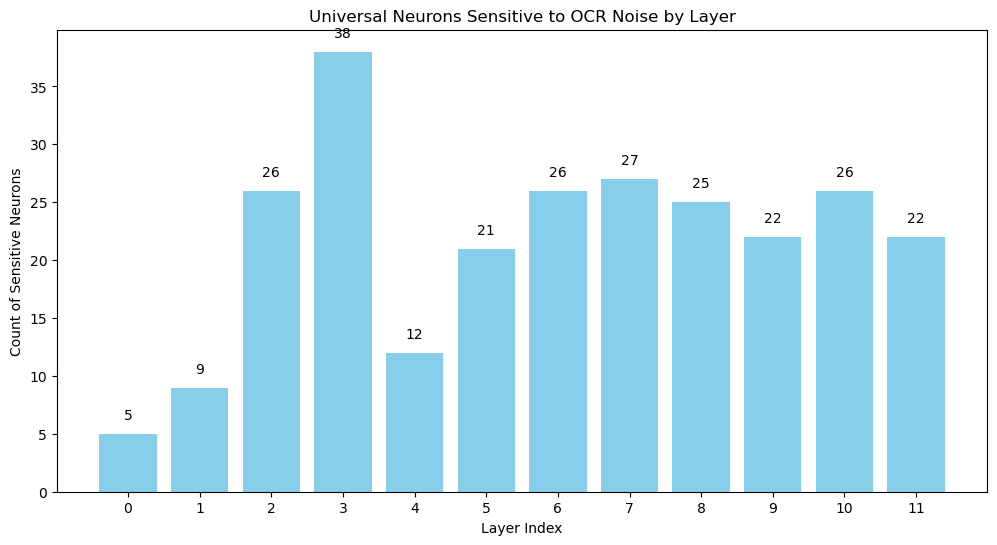

In [9]:
import matplotlib.pyplot as plt

# Function to plot universal sensitive neurons by layer
def plot_universal_neurons(universal_neurons):
    # Prepare the data for plotting
    layers = list(universal_neurons.keys())
    counts = [len(neurons) for neurons in universal_neurons.values()]

    # Create the bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(layers, counts, color='skyblue')

    # Annotate each bar with the count of sensitive neurons
    for i, count in enumerate(counts):
        plt.text(i, count + 1, str(count), ha='center', va='bottom')

    # Set the labels and title
    plt.xlabel('Layer Index')
    plt.ylabel('Count of Sensitive Neurons')
    plt.title('Universal Neurons Sensitive to OCR Noise by Layer')
    plt.xticks(layers)  # Ensure only layers with data are ticked
    plt.show()

# Assuming universal_neurons is populated with data
# Call the function to plot universal sensitive neurons
plot_universal_neurons(universal_neurons)


In [218]:
import matplotlib.pyplot as plt
from ecco import output, lm, analysis
import numpy as np

# Assuming initialize_model, get_neuron_activations are already defined
models = {name: initialize_model(name) for name in ['gpt2', 'gpt2-medium']}
model_cka_scores = {model_name: [] for model_name in models}

# Loop through each model and calculate CKA for each layer
for model_name, lm in models.items():
    print(model_name)
    for i in tqdm(range(len(data_sample)), total=len(data_sample)):  # Assuming data_sample is accessible and has correct and OCR text
        corrected_activations = get_neuron_activations(data_sample['corrected_text'].iloc[i], lm, MAX_LENGTH)
        ocr_activations = get_neuron_activations(data_sample['text'].iloc[i], lm, MAX_LENGTH)

        # Calculate CKA score for each layer and average across samples
        layer_cka_scores = []
        for layer in range(corrected_activations.shape[0]):
            cka_score = analysis.cka(corrected_activations[layer], ocr_activations[layer])
            layer_cka_scores.append(cka_score)

        # Aggregate scores across data samples (average or median could be used)
        if not model_cka_scores[model_name]:
            model_cka_scores[model_name] = layer_cka_scores
        else:
            model_cka_scores[model_name] = [np.mean(scores) for scores in zip(model_cka_scores[model_name], layer_cka_scores)]

# Normalize scores if needed or convert to percentage
# model_cka_scores = {k: [s * 100 for s in v] for k, v in model_cka_scores.items()}


gpt2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:21<00:00,  1.42s/it]


gpt2-medium


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [10:42<00:00,  6.42s/it]


In [219]:
model_cka_scores

{'gpt2': [0.598017763069367,
  0.6880154756988434,
  0.45865769113528043,
  0.4158897156036693,
  0.9970794158275793,
  0.6768350143446984,
  0.6972489918159684,
  0.6283583947016294,
  0.630637269241567,
  0.6059489083545493,
  0.5368525562991846,
  0.4973584918667865],
 'gpt2-medium': [0.6686298877020446,
  0.5633814019089904,
  0.6760289505169497,
  0.6460654759988789,
  0.6400120109184699,
  0.651182121046593,
  0.6197148049866994,
  0.589360288476517,
  0.6031832979603253,
  0.5619101524184921,
  0.5175745509704828,
  0.501955535949475,
  0.5887636659017554,
  0.4959173763630904,
  0.48797960885478314,
  0.5099247978890741,
  0.42394616075918024,
  0.9984849298485532,
  0.6870965872468671,
  0.678518889855167,
  0.6838234408072741,
  0.6907940536137325,
  0.705777304465341,
  0.6992438542250066]}

In [ ]:
from ecco.lm_plots import plot_activations

plot_activations()

In [228]:
from ecco import analysis
import numpy as np
import pandas as pd
from tqdm import tqdm

def initialize_model(model_name):
    lm = ecco.from_pretrained(model_name, activations=True, gpu=False)
    lm.tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    lm.model.resize_token_embeddings(len(lm.tokenizer))
    return lm

# def get_activations(text, model, tokenizer, max_length=512):
#     # Process text through the model and return activations
#     inputs = tokenizer(text, return_tensors="pt", padding='max_length', truncation=True, max_length=max_length)
#     outputs = model(**inputs)
#     # Assume activations are the last hidden states
#     return outputs.last_hidden_state.detach().numpy()

def get_neuron_activations(text, lm, max_length=512):
    # Tokenize the input text and ensure it is truncated or padded to max_length
    input_tokenized_info = lm.tokenizer(text, return_tensors="pt", 
                                        max_length=max_length, padding='max_length', truncation=True)
    # Generate model output
    output = lm(input_tokenized_info)
    
    # Return the output which includes the activations
    return output.activations['decoder'][0]

# Initialize models
models = {
    'gpt2': initialize_model('gpt2'),
    'gpt2-medium': initialize_model('gpt2-medium')
}


In [236]:
len(cca_results['gpt2'])

100

In [237]:
cca_results['gpt2']

[{0: 0.5842178519056613,
  1: 0.7096732748785216,
  2: 0.4264460924755573,
  3: 0.2899532520725031,
  4: 0.998252413941937,
  5: 0.6981608499078144,
  6: 0.6979500148054162,
  7: 0.6455499475953621,
  8: 0.5931608720396114,
  9: 0.5996168252546795,
  10: 0.5699516140355825,
  11: 0.4976798122432798},
 {0: 0.511654592062115,
  1: 0.6392212646975032,
  2: 0.38945976054647596,
  3: 0.39199798801220626,
  4: 0.9969752418021388,
  5: 0.5643223010570194,
  6: 0.6138064328982971,
  7: 0.5652603885381879,
  8: 0.5599479774581564,
  9: 0.5422306706745493,
  10: 0.5126389526116114,
  11: 0.43464192957340303},
 {0: 0.5058337475614274,
  1: 0.7403253809386955,
  2: 0.4575510228026003,
  3: 0.31338689837178635,
  4: 0.9978854209585434,
  5: 0.6600498849309354,
  6: 0.6733722199792269,
  7: 0.6516388105679514,
  8: 0.6014142011162968,
  9: 0.6195987621923583,
  10: 0.5438589449349679,
  11: 0.48646504604276686},
 {0: 0.6160493933422391,
  1: 0.730612328619489,
  2: 0.505187358278013,
  3: 0.48930300

In [233]:
# Assuming you have a way to determine sensitivity, e.g., a CCA score threshold
threshold = 0.5
sensitive_neurons = {model_name: set() for model_name in models}
for model_name in models:
    for scores in cca_results[model_name]:
        for layer, score in scores.items():
            if score < threshold:
                sensitive_neurons[model_name].add(layer)

# Find common sensitive neurons across models
common_sensitive_neurons = sensitive_neurons['gpt2'].intersection(sensitive_neurons['gpt2-medium'])

# Output common sensitive neurons
print("Universal OCR-sensitive neurons across models:", common_sensitive_neurons)


Universal OCR-sensitive neurons across models: {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11}


In [242]:
cca_results

{'gpt2': [{0: 0.5842178519056613,
   1: 0.7096732748785216,
   2: 0.4264460924755573,
   3: 0.2899532520725031,
   4: 0.998252413941937,
   5: 0.6981608499078144,
   6: 0.6979500148054162,
   7: 0.6455499475953621,
   8: 0.5931608720396114,
   9: 0.5996168252546795,
   10: 0.5699516140355825,
   11: 0.4976798122432798},
  {0: 0.511654592062115,
   1: 0.6392212646975032,
   2: 0.38945976054647596,
   3: 0.39199798801220626,
   4: 0.9969752418021388,
   5: 0.5643223010570194,
   6: 0.6138064328982971,
   7: 0.5652603885381879,
   8: 0.5599479774581564,
   9: 0.5422306706745493,
   10: 0.5126389526116114,
   11: 0.43464192957340303},
  {0: 0.5058337475614274,
   1: 0.7403253809386955,
   2: 0.4575510228026003,
   3: 0.31338689837178635,
   4: 0.9978854209585434,
   5: 0.6600498849309354,
   6: 0.6733722199792269,
   7: 0.6516388105679514,
   8: 0.6014142011162968,
   9: 0.6195987621923583,
   10: 0.5438589449349679,
   11: 0.48646504604276686},
  {0: 0.6160493933422391,
   1: 0.7306123286

In [245]:
# Find universal neurons across models
universal_neurons = {}
for layer_idx in range(11):
    all_scores = np.array([x[layer_idx] for x in cca_results[model_name]])
    mean_scores = np.mean(all_scores, axis=0)
    print(mean_scores)
    sensitive_neurons = np.where(mean_scores < 0.5)[0]  # Threshold of sensitivity
    universal_neurons[layer_idx] = sensitive_neurons

# Output the results
print("Universal OCR-sensitive neurons across models:")
for layer, neurons in universal_neurons.items():
    print(f"Layer {layer}: {neurons}")

0.6252930213235087
0.5605052537868623
0.6587806508803996
0.6449168215846729
0.6405169810112054
0.6497661904981699
0.6354846219380501
0.6091029887234728
0.6109604961782897
0.5783613672337014
0.5575692669901027
Universal OCR-sensitive neurons across models:
Layer 0: []
Layer 1: []
Layer 2: []
Layer 3: []
Layer 4: []
Layer 5: []
Layer 6: []
Layer 7: []
Layer 8: []
Layer 9: []
Layer 10: []


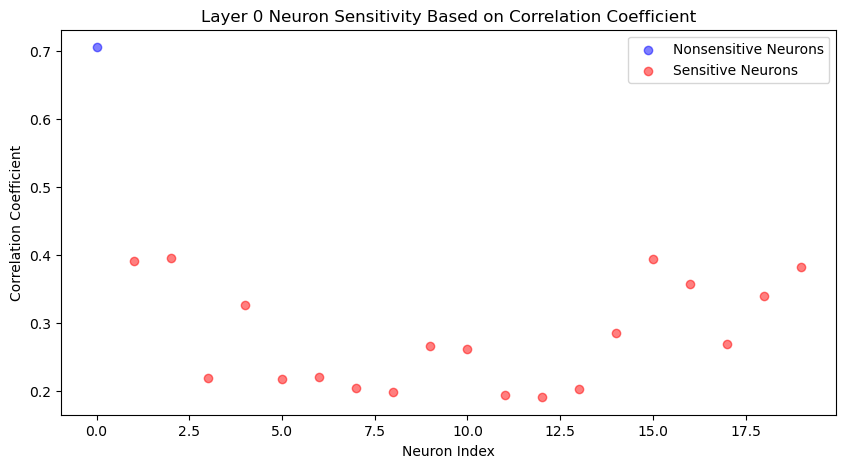

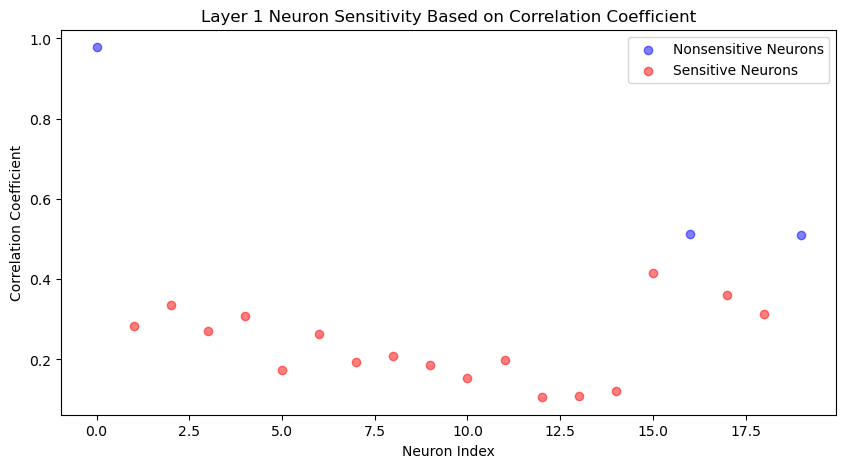

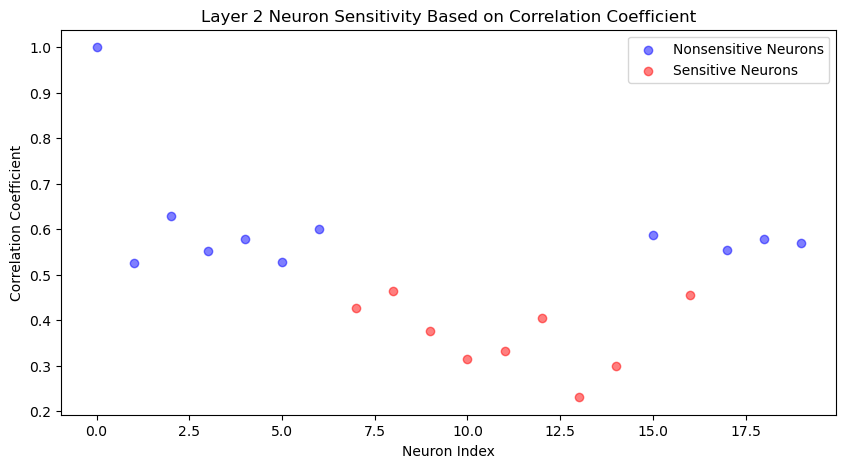

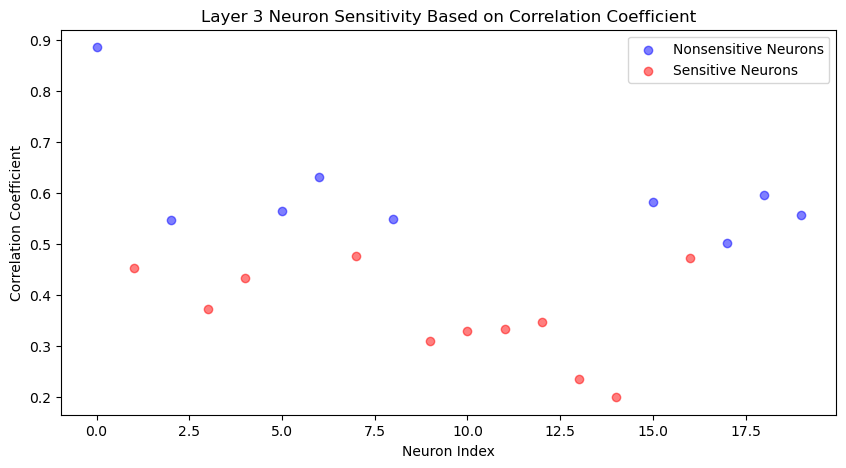

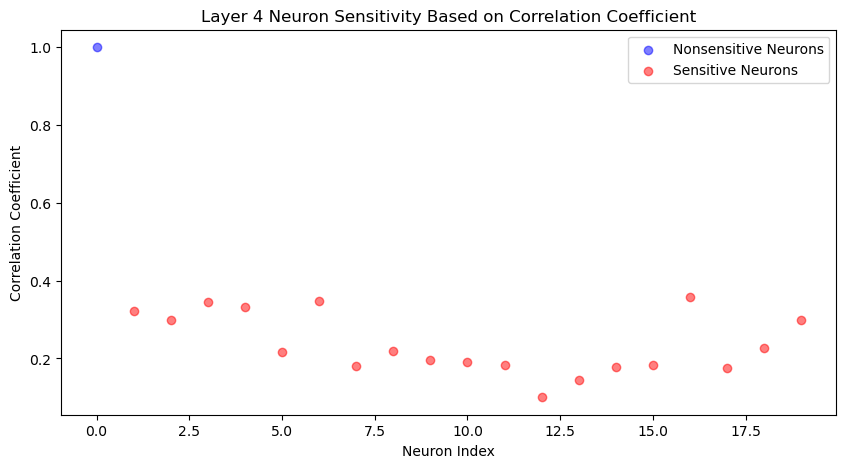

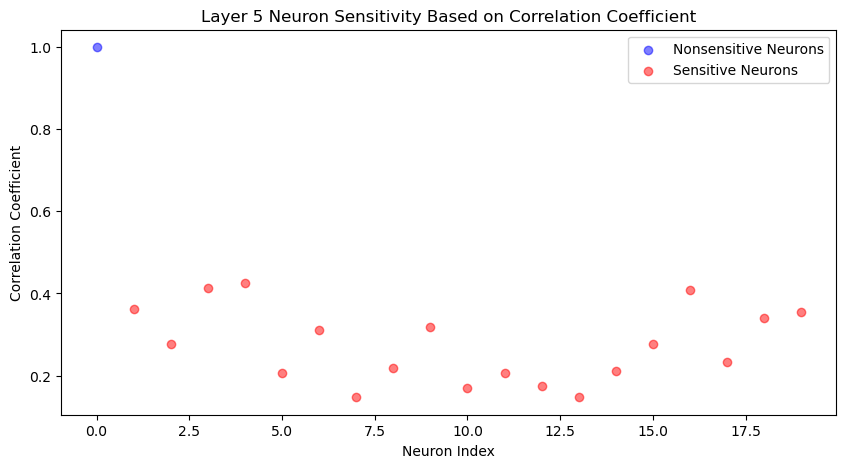

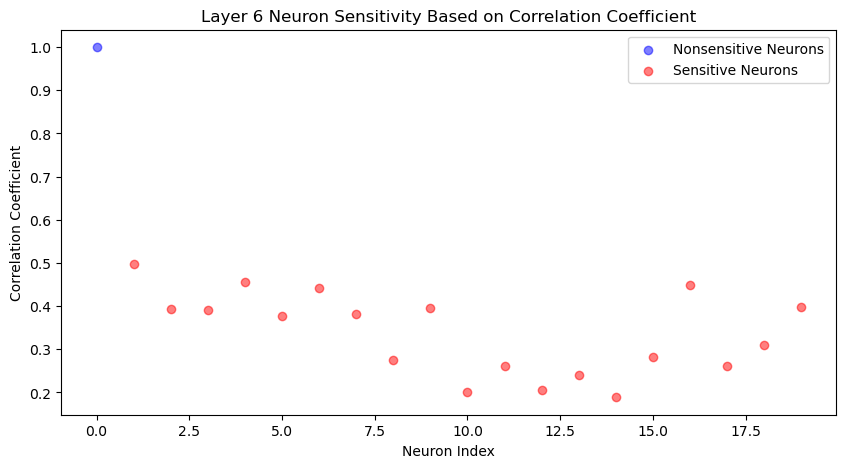

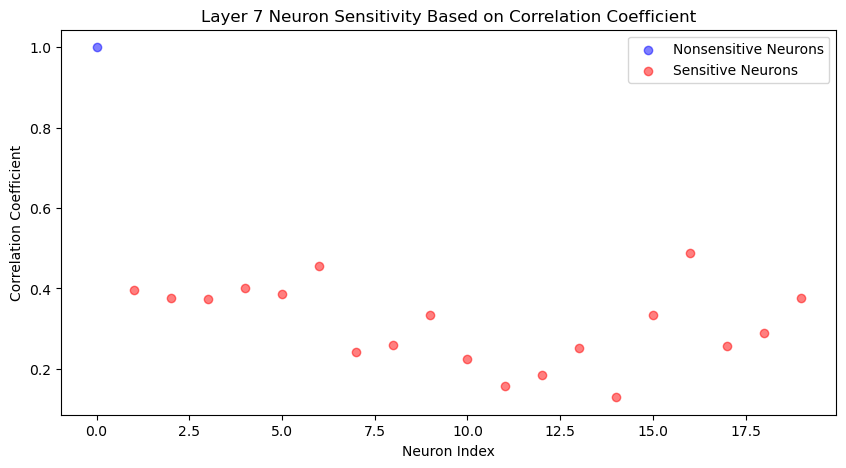

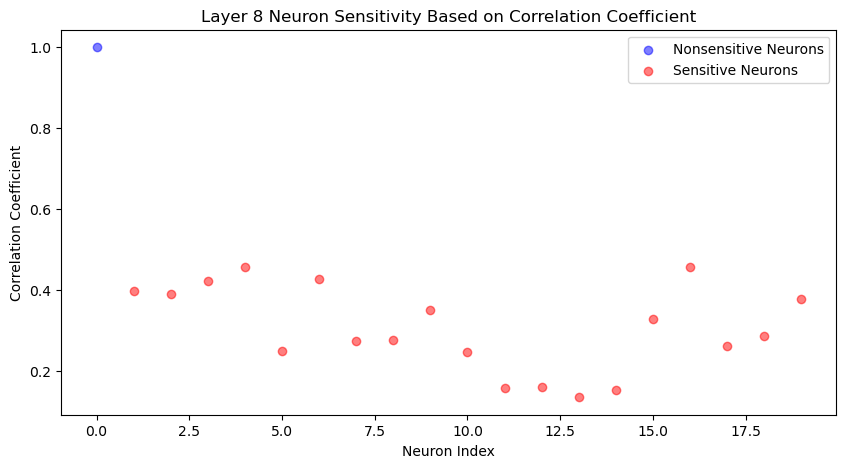

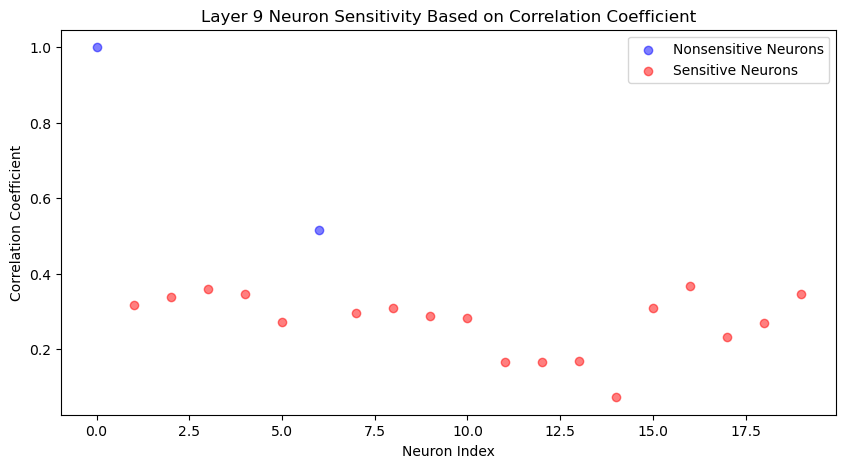

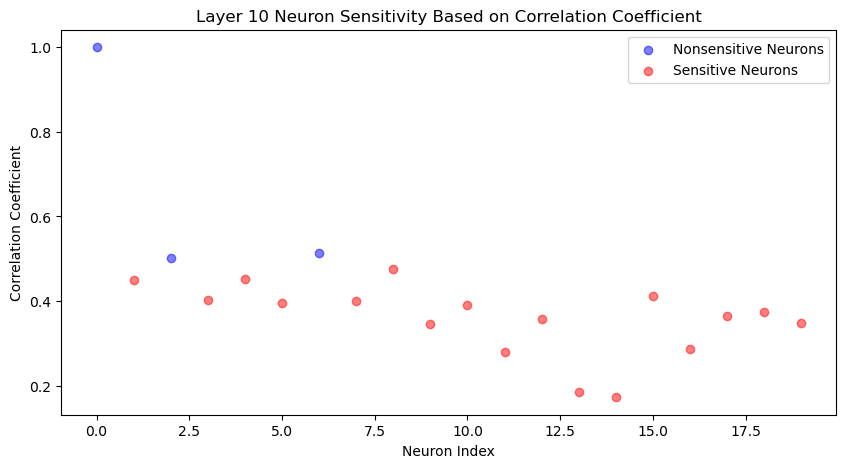

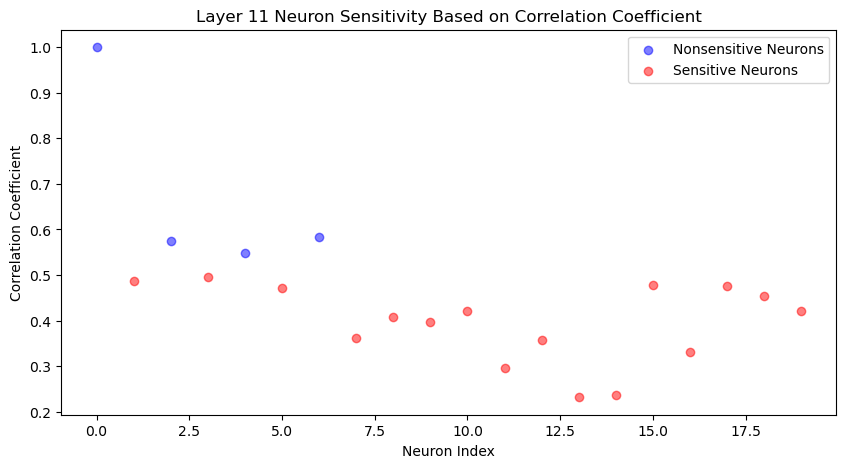

In [152]:
import matplotlib.pyplot as plt
import numpy as np

def plot_correlations(correlations_by_layer, neuron_sensitivity_by_layer):
    # Define colors
    sensitive_color = 'red'
    nonsensitive_color = 'blue'

    # Determine the number of plots needed based on the number of layers
    num_layers = len(correlations_by_layer)
    
    # Create a separate plot for each layer
    for i in range(num_layers):
        plt.figure(figsize=(10, 5))  # Adjust the figure size as needed for each layer
        
        # Obtain the correlations for the current layer
        correlations = correlations_by_layer[i]
        
        # Obtain indices for sensitive and nonsensitive neurons
        sensitive_neurons = neuron_sensitivity_by_layer[i]
        nonsensitive_neurons = np.setdiff1d(np.arange(len(correlations)), sensitive_neurons)
        
        # Plot nonsensitive neurons for the current layer
        plt.scatter(nonsensitive_neurons, correlations[nonsensitive_neurons], color=nonsensitive_color, label='Nonsensitive Neurons', alpha=0.5)
        
        # Plot sensitive neurons for the current layer
        plt.scatter(sensitive_neurons, correlations[sensitive_neurons], color=sensitive_color, label='Sensitive Neurons', alpha=0.5)
        
        plt.xlabel('Neuron Index')
        plt.ylabel('Correlation Coefficient')
        plt.title(f'Layer {i} Neuron Sensitivity Based on Correlation Coefficient')
        plt.legend()
        plt.show()

# Assuming correlations_by_layer and neuron_sensitivity_by_layer are defined as before
# Call the function to plot correlations for each layer
plot_correlations(correlations_by_layer, neuron_sensitivity_by_layer)


In [90]:
import numpy as np
import pandas as pd
import os

def analyze_neuron_sensitivity(activations_correct, activations_ocr):
    # Assuming each dictionary's key corresponds to a layer, and values are arrays of neuron activations
    results = []
    for layer in range(activations_correct.shape[0]):
        for neuron_idx in range(activations_correct[layer].shape[1]):
            
            corr_correct = np.corrcoef(activations_correct[layer][:, neuron_idx])
            corr_ocr = np.corrcoef(activations_ocr[layer][:, neuron_idx])
            
            results.append({
                'layer': layer,
                'neuron_idx': neuron_idx,
                'mean_corr': corr_ocr,
                'mean_baseline': corr_correct,
                'excess_corr': corr_ocr - corr_correct
            })
    
    neuron_df = pd.DataFrame(results)
    return neuron_df

neuron_df = analyze_neuron_sensitivity(activations_correct['decoder'][0], activations_ocr['decoder'][0])

# # Save neurons with interesting excess correlation
# save_path = 'your_directory'
# neuron_df.query("excess_corr > 0.5").to_csv(
#     os.path.join(save_path, "sensitive_neurons.csv"), index=False
# )


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [88]:
neuron_df

,layer,neuron_idx,mean_corr,mean_baseline,excess_corr
0,0,0,1.0,1.0,0.0
1,0,1,1.0,1.0,0.0
2,0,2,1.0,1.0,0.0
3,0,3,1.0,1.0,0.0
4,0,4,1.0,1.0,0.0
...,...,...,...,...,...
4795,11,395,1.0,1.0,0.0
4796,11,396,1.0,1.0,0.0
4797,11,397,1.0,1.0,0.0
4798,11,398,1.0,1.0,0.0


In [89]:
neuron_df.mean()

layer              5.5
neuron_idx       199.5
mean_corr          1.0
mean_baseline      1.0
excess_corr        0.0
dtype: float64

In [88]:

for text, corrected_text in zip(data['text'], data['corrected_text']):

    output_correct = get_neuron_activations(corrected_text[:400])
    output_ocr = get_neuron_activations(text[:400])

    activations_correct = output_correct.activations
    activations_ocr = output_ocr.activations
    
    neuron_df = analyze_neuron_sensitivity(activations_correct['decoder'][0], activations_ocr['decoder'][0])

    print(neuron_df.mean())

layer            15.5
neuron_idx       86.0
mean_corr         1.0
mean_baseline     1.0
excess_corr       0.0
dtype: float64
layer            15.5
neuron_idx       94.5
mean_corr         1.0
mean_baseline     1.0
excess_corr       0.0
dtype: float64
layer            15.5
neuron_idx       76.0
mean_corr         1.0
mean_baseline     1.0
excess_corr       0.0
dtype: float64
layer            15.5
neuron_idx       88.0
mean_corr         1.0
mean_baseline     1.0
excess_corr       0.0
dtype: float64
layer            15.5
neuron_idx       73.0
mean_corr         1.0
mean_baseline     1.0
excess_corr       0.0
dtype: float64


KeyboardInterrupt: 